# Load required modules

In [1]:
# External libraries
import numpy as np
import pandas as pd
from scipy.stats import zscore
import math
import IPython
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import importlib
import svgutils
from svgutils.compose import *
import os.path
from cmcrameri import cm #colormaps
#import svgwrite

# Custom code
from fx_RNAseq import *
def findgene(genename):
    dPath = "~/Documents/eelMolec/zfRNAseq/20190827/20190827_DESeq2/" #directory path
#     fPath = "00_rodsVcones/rodVCones_raw.csv" #file path
    fPath = "00_rodsVcones/rodVCones_fpkm.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep -w ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def findgenelist(genename):
    dPath = "~/Documents/eelMolec/zfRNAseq/20190827/20190827_DESeq2/" #directory path
#     fPath = "00_rodsVcones/rodVCones_raw.csv" #file path
    fPath = "00_rodsVcones/rodVCones_fpkm.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

# def findgene(genename):
#     !head -1 ~/Dropbox/LiLab/RNAseq/20190827_DESeq2/00_rodsVcones/rodVCones_raw.csv > ~/Dropbox/LiLab/RNAseq/20190827_DESeq2/temp.txt
#     # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
#     !grep -w ^$genename ~/Dropbox/LiLab/RNAseq/20190827_DESeq2/00_rodsVcones/rodVCones_raw.csv >> ~/Dropbox/LiLab/RNAseq/20190827_DESeq2/temp.txt
#     gdf = pd.read_csv("~/Dropbox/LiLab/RNAseq/20190827_DESeq2/temp.txt")
    
#     return gdf

# def findgenelist(genename):
#     !head -1 ~/Dropbox/LiLab/RNAseq/20190827_DESeq2/00_rodsVcones/rodVCones_raw.csv > ~/Dropbox/LiLab/RNAseq/20190827_DESeq2/temp.txt
#     # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
#     !grep ^$genename ~/Dropbox/LiLab/RNAseq/20190827_DESeq2/00_rodsVcones/rodVCones_raw.csv >> ~/Dropbox/LiLab/RNAseq/20190827_DESeq2/temp.txt
#     gdf = pd.read_csv("~/Dropbox/LiLab/RNAseq/20190827_DESeq2/temp.txt")
#     return gdf

def plotNReads():
    rdf = pd.read_csv("~/Documents/eelMolec/zfRNAseq/20190827/20190827_DESeq2/nMappedReads.csv")
    h = rdf.iloc[:,1]
    h = h / 1e6
    n = np.arange(1,7) # Rods
    n = np.append(n, 6.5 + np.arange(1,6)) # UV
    n = np.append(n, 12 + np.arange(1,7)) # S
    n = np.append(n, 18.5 + np.arange(1,8)) # M
    n = np.append(n, 26 + np.arange(1,7)) # L
    return n, h

def plotBars(genename):
    gdf = findgene(genename)
    n = np.arange(1,7) # Rods
    n = np.append(n, 6.5 + np.arange(1,6)) # UV
    n = np.append(n, 12 + np.arange(1,7)) # S
    n = np.append(n, 18.5 + np.arange(1,8)) # M
    n = np.append(n, 26 + np.arange(1,7)) # L
    h_start = 7
    h_end = 37
    h = gdf.iloc[0,h_start:h_end]
    return n, h

def plotBars_list(genelist):
    n=[]
    h=[]
    for i,gene in enumerate(genelist, start=0):
        tempn, temph = plotBars(gene)
        n = np.append(n,tempn+(30*i))
        h = np.append(h,temph)
    return n, h

def svgreload():
    !osascript -e 'tell application "Google Chrome" to tell the active tab of second window to reload'

#photoreceptor Colors
pC = {
    'r' : '#747474',
    'u' : '#B540B7',
    's' : '#4669F2',
    'm' : '#04CD22',
    'l' : '#CC2C2A',
    'plt' : '',
}

# 'r' : '#747474',
# 'lr' : '#474747'
# 'u' : '#B540B7',

# 's' : '#4669F2',
# 'esls' : '#8f9bcc',

# 'm' : '#04CD22',
# 'lslm' : '#18e236',
# 'mslm' : '#57cb69',
# 'eslm' : '#80bc89',


# 'l' : '#CC2C2A',
# 'lsll' : '#ce4340',
# 'msll' : '#c67271',
# 'esl' : '#d69f9e',

# 'pr' : "#E6B800"
# 'lslpr' : "#cca819"
# 'mslpr' : "#cfb54f"
# 'eslpr' : "#dacd9a"

pC['plt']=[
    pC['r'],pC['r'],pC['r'],pC['r'],pC['r'],pC['r'],
    pC['u'],pC['u'],pC['u'],pC['u'],pC['u'],
    pC['s'],pC['s'],pC['s'],pC['s'],pC['s'],pC['s'],
    pC['m'],pC['m'],pC['m'],pC['m'],pC['m'],pC['m'],pC['m'],
    pC['l'],pC['l'],pC['l'],pC['l'],pC['l'],pC['l']
]

def findgene_glia(genename):
    dPath = "~/Documents/eelMolec/otherRNAseq/zfMullerGlia_2018Charlton/" #directory path
#     fPath = "glia_23615_sup-0006-tables2.csv" #file path
    fPath = "glia8dpf_DEGcounts.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep -w ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def findgenelist_glia(genename):
    dPath = "~/Documents/eelMolec/otherRNAseq/zfMullerGlia_2018Charlton/" #directory path
#     fPath = "glia_23615_sup-0006-tables2.csv" #file path
    fPath = "glia8dpf_DEGcounts.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def plotBars_glia(genename):
    gdf = findgene_glia(genename)
    n = np.arange(1,19) # GFP+
    n = np.append(n, 19.5 + np.arange(1,19)) # GFP-
    h_start = 5
    h_end = 41
#     h = np.power(2,(gdf.iloc[0,h_start:h_end]))
    h = gdf.iloc[0,h_start:h_end]
    return n, h

#glia Colors
gC = {
    'm48' : '#c7ffec',
    'm60' : '#94ffdb',
    'm72' : '#57ffc7',
    'm96' : '#2effb9',
    'm120': '#05ffac',
    'm192': '#00d68f',
    
    'c48' : '#e3e3e3',
    'c60' : '#c9c9c9',
    'c72' : '#ababab',
    'c96' : '#969696',
    'c120': '#828282',
    'c192': '#6b6b6b',
    
    'plt' : '',
}

gC['plt']=[
    gC['m48'],gC['m48'],gC['m48'],
    gC['m60'],gC['m60'],gC['m60'],
    gC['m72'],gC['m72'],gC['m72'],
    gC['m96'],gC['m96'],gC['m96'],
    gC['m120'],gC['m120'],gC['m120'],
    gC['m192'],gC['m192'],gC['m192'],
    gC['c48'],gC['c48'],gC['c48'],
    gC['c60'],gC['c60'],gC['c60'],
    gC['c72'],gC['c72'],gC['c72'],
    gC['c96'],gC['c96'],gC['c96'],
    gC['c120'],gC['c120'],gC['c120'],
    gC['c192'],gC['c192'],gC['c192'],
]

def findgene_rods(genename):
    dPath = "~/Documents/eelMolec/otherRNAseq/zfRods_Sun2018/" #directory path
#     fPath = "glia_23615_sup-0006-tables2.csv" #file path
    fPath = "zfRods.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep -w ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def findgenelist_rods(genename):
    dPath = "~/Documents/eelMolec/otherRNAseq/zfRods_Sun2018/" #directory path
#     fPath = "glia_23615_sup-0006-tables2.csv" #file path
    fPath = "zfRods.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def plotBars_rods(genename):
    gdf = findgene_rods(genename)
    n = np.arange(1,5) # GFP+
    n = np.append(n, 4.5 + np.arange(1,5)) # GFP-
    h_start = 7
    h_end = 15
#     h = np.power(2,(gdf.iloc[0,h_start:h_end]))
    h = gdf.iloc[0,h_start:h_end].values
    return n, h

#rod Colors
rC = {
    'r' : '#747474',
    'c': '#dac910',
    'plt' : '',
}

rC['plt']=[
    rC['r'],rC['r'],rC['r'],rC['r'],
    rC['c'],rC['c'],rC['c'],rC['c'],
]

def findgene_sqcones(genename):
    dPath = "~/Documents/eelMolec/otherRNAseq/sqCones_Kunze/" #directory path
    fPath = "sqConesAwHib_Adult.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep -w ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def findgenelist_sqcones(genename):
    dPath = "~/Documents/eelMolec/otherRNAseq/sqCones_Kunze/" #directory path
    fPath = "sqConesAwHib_Adult.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def plotBars_sqcones(genename):
    gdf = findgene_sqcones(genename)
    n = np.arange(1,8) # GFP+
    n = np.append(n, 7.5 + np.arange(1,7)) # GFP-
    h_start = 8
    h_end = 21
#     h = np.power(2,(gdf.iloc[0,h_start:h_end]))
    h = gdf.iloc[0,h_start:h_end].values
    return n, h

#squirrel Colors
sqC = {
    's' : '#4669F2',
    'sHib' : '#548ced',
    'm' : '#04CD22',
    'mHib' : '#53e477',
    'plt' : '',
}

sqC['plt']=[
    sqC['s'],sqC['s'],sqC['s'],sqC['s'],sqC['s'],
    sqC['sHib'],sqC['sHib'],
    sqC['m'],sqC['m'],sqC['m'],
    sqC['mHib'],sqC['mHib'],sqC['mHib'],
]


def findgene_haircell(genename):
    dPath = "~/Documents/eelMolec/otherRNAseq/zfHairCells_Mattern2018/" #directory path
    fPath = "zfHairCells_rpkm.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep -w ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def findgenelist_haircell(genename):
    dPath = "~/Documents/eelMolec/otherRNAseq/zfHairCells_Mattern2018/" #directory path
    fPath = "zfHairCells_rpkm.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def plotBars_haircell(genename):
    gdf = findgene_sqcones(genename)
    n = np.arange(1,4) # riboTagged
    n = np.append(n, 3.5 + np.arange(1,4)) # Whatever this is
    h_start = 2
    h_end = 8
#     h = np.power(2,(gdf.iloc[0,h_start:h_end]))
    h = gdf.iloc[0,h_start:h_end].values
    return n, h

#hairCell Colors
hcC = {
    'h' : '#e147c0',
    'c' : '#dac910',
    'plt' : '',
}

hcC['plt']=[
    hcC['h'],hcC['h'],hcC['h'],
    hcC['c'],hcC['c'],hcC['c'],
]



# Hoang, 2020 loaders after re-analysis and re-clustering
def findgene_zfHoang2020(genename):
    dPath = "~/Documents/eelMolec/otherRNAseq/zfRet_HoangBlackshaw2020/" #directory path
    fPath = "conesDev_Hoang.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep -w ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def findgenelist_zfHoang2020(genename):
    dPath = "~/Documents/eelMolec/otherRNAseq/zfRet_HoangBlackshaw2020/" #directory path
    fPath = "conesDev_Hoang.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def plotBars_zfHoang2020(genename): #percentExpression
    gdf = findgene_zfHoang2020(genename)
    n = np.arange(1,12) # pct
#     n = np.append(n, 5.5 + np.arange(1,5)) # avg
    h_start = 2
    h_end = 13
    h = gdf.iloc[0,h_start:h_end].values
    return n, h

#Hoang Colors
zfHC = {
    'PRP' : "#dfdac8",
    'eslPR' : '#dacd9a',
    'mslPR' : '#dcc360',
    'lslPR' : '#cca819',
    'adPR' : '#ffd429',
    'lslR' : '#a3a3a3',
    'r' : '#7d7d7d',
    'u' : '#B540B7',
    's' : '#4669F2',
    'm' : '#04CD22',
    'l' : '#CC2C2A',
    'plt' : '',
}

zfHC['plt']=[
    zfHC['PRP'],
    zfHC['eslPR'],zfHC['mslPR'],
    zfHC['lslPR'],zfHC['adPR'],
    zfHC['lslR'],
    zfHC['r'],zfHC['u'],zfHC['s'],
    zfHC['m'],zfHC['l']
]

# Xu, 2020 loaders after re-analysis and re-clustering
def findgene_zfXu2020(genename):
    dPath = "~/Documents/eelMolec/otherRNAseq/zfRetDev10x_Xu2020/ret72hpf/" #directory path
    fPath = "conesXu.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep -w ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def findgenelist_zfXu2020(genename):
    dPath = "~/Documents/eelMolec/otherRNAseq/zfRetDev10x_Xu2020/ret72hpf/" #directory path
    fPath = "conesXu.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def plotBars_zfXu2020(genename): #percentExpression
    gdf = findgene_zfXu2020(genename)
    n = np.arange(1,7) # avg
#     n = np.append(n, 5.5 + np.arange(1,5)) # pct
    h_start = 2
    h_end = 8
    h = gdf.iloc[0,h_start:h_end].values
    return n, h

#Xu Colors
zfXC = {
    'r' : '#7d7d7d',
    'u' : '#B540B7',
    's' : '#4669F2',
    'm' : '#04CD22',
    'l' : '#CC2C2A',
    'mslPR' : '#dcc360',
    'plt' : '',
}

zfXC['plt']=[
    zfXC['r'],zfXC['u'],zfXC['s'],
    zfXC['m'],zfXC['l'],zfXC['mslPR'],
]

def findgene_zfOgawa2021(genename):
    dPath = "~/Documents/eelMolec/otherRNAseq/zfRet_Ogawa2021/" #directory path
    fPath = "photoreceptors_Ogawa.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep -w ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def findgenelist_zfOgawa2021(genename):
    dPath = "~/Documents/eelMolec/otherRNAseq/zfRet_Ogawa2021/" #directory path
    fPath = "photoreceptors_Ogawa.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def plotBars_zfOgawa2021(genename): #averageExpression
    gdf = findgene_zfOgawa2021(genename)
    n = np.arange(1,9) # 
    h_start = 2
    h_end = 10
#     h_end = 13
    h = gdf.iloc[0,h_start:h_end].values
    return n, h

def plotBars2_zfOgawa2021(genename): #percentExpression
    gdf = findgene_zfOgawa2021(genename)
    n = np.arange(1,9) # pct
#     n = np.append(n, 5.5 + np.arange(1,5)) # avg
    h_start = 2+9
    h_end = 9+9
#     h_end = 13
    h = gdf.iloc[0,h_start:h_end].values
    return n, h


#Hoang Colors
zfO = {
    'r' : '#7d7d7d',
    'u' : '#B540B7',
    's' : '#4669F2',
    'm' : '#04CD22',
    'l' : '#CC2C2A',
    'm4': '#cdcd04',
    'onBC': '#ccf2ff',
    'offBC': '#663d00',
    'plt' : '',
}

zfO['plt']=[
    zfO['r'],zfO['u'],zfO['s'],
    zfO['m'],zfO['l'],zfO['m4'],
    zfO['onBC'],zfO['offBC']
]

print('LOADED')

LOADED


In [2]:
# %cd ~/Dropbox/Presentations/RevealReboot/resources/20191002_RNAseq/
%cd ~/Documents/eelMolec/zfRNAseq/20190827/20190827_DESeq2/genePlots/fpkm/
# %cd /Users/angueyraaristjm/Desktop/ForHailey/
# %cd ~//Documents/LiLab/Manuscripts/2021_zfConeRNAseq/resources/
# %cd ~/Documents/LiLab/Presentations/revealjs/resources/20210608_UTH/

/Users/angueyraaristjm/Documents/eelMolec/zfRNAseq/20190827/20190827_DESeq2/genePlots/fpkm


In [3]:
# dark background
plt.style.use('dark_background')
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w",
         "axes.linewidth" : 3,
         "xtick.major.width" : 3,
         "ytick.major.width" : 3,
         "xtick.major.size" : 8,
         "ytick.major.size" : 8,
         "text.color" : "w"}
plt.rcParams.update(params)
baseColor = '#ffffff' #white
font_prop = font_manager.FontProperties(fname='/System/Library/Fonts/Avenir.ttc')

In [122]:
# white background
plt.style.use('default')
params = {"ytick.color" : "k",
          "xtick.color" : "k",
          "axes.labelcolor" : "k",
          "axes.edgecolor" : "k",
         "axes.linewidth" : 1,
         "xtick.major.width" : 1,
         "ytick.major.width" : 1,
         "xtick.major.size" : 8,
         "ytick.major.size" : 8,
         "text.color" : "k"}
plt.rcParams.update(params)
baseColor = '#000000' #black
font_prop = font_manager.FontProperties(fname='/System/Library/Fonts/Avenir.ttc')

***
# Index <a id='Index'>∮</a>
***
- [Plot Total Number of Reads](#nReads)
- [PCA Plots](#pcaPlots)
- [BarPlot: Opsins](#barOpsins)
- [BarPlot: Custom](#barCustom)
- [BarPlot: Many Genes](#barMany)
- [BarPlot_subPlotsAutomatic: Custom](#barManyAuto)
- [Heatmap: Opsins](#heatOpsins)
- [Heatmap: Custom](#heatCustom)
- [Heatmap: Other Data Sets](#heatOther)
- [Sparkline plots](#sparkline)
- [PCA](#pca)
- [GO clustering](https://go.princeton.edu/) 
- [Quantification](#quant)
- [Phototransduction genes](#Phototrans)
- [Transcription factors](#TFs)
- [Known TFs](#knownTFs)
***

***
## Total number of reads<a id='nReads'>∮</a>
***
[Back to Index](#Index)

### pygal version (does not import well into Intaglio)
> hist = pygal.Histogram(x_title='',y_title='million of mapped reads',show_x_labels=False,title='',style=custom_style,legend_at_bottom=True,legend_at_bottom_columns=4,show_legend=False)  
> hist.add('Rod',[(11.27,0.2,0.8),(11.77,1.2,1.8),(9.4,2.2,2.8),(14.99,3.2,3.8),(9.75,4.2,4.8),(9.08,5.2,5.8),])  
> hist.add('UV',[(9.42,6.2,6.8),(6.52,7.2,7.8),(10.45,8.2,8.8),(9.46,9.2,9.8),(11.02,10.2,10.8)])  
> hist.add('S',[(9.23,11.2,11.8),(9.33,12.2,12.8),(9.37,13.2,13.8),(14.95,14.2,14.8),(12.85,15.2,15.8),(10.96,16.2,16.8)])  
> hist.add('M',[(10.40,18.2,18.8),(8.634,19.2,19.8),(7.36,20.2,20.8),(10.32,21.2,21.8),(8.33,22.2,22.8),(9.53,23.2,23.8),(9.526,17.2,17.8)])  
> hist.add('L',[(8.99,24.2,24.8),(10.50,25.2,25.8),(10.03,26.2,26.8),(11.08,27.2,27.8),(10.44,28.2,28.8),(10.72,29.2,29.8)])  
> hist.render_to_file('test.svg')

In [ ]:
#pyplot version (Sep_2019)
plotname = ''
n,h = plotNReads()
fH, ax = plt.subplots()
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None, color=pC['plt'])
formatFigure_nReads(plotname, fH, ax, pH)
plt.tight_layout()
# plt.savefig("{0}.svg".format('nReads'), transparent=True, format="svg")

In [ ]:
np.mean(h)

In [ ]:
np.std(h)

***
## pcaPlots<a id='pcaPlots'>∮</a>
***
[Back to Index](#Index)

In [ ]:
def formatFigure_pca(plotname, figH, axH, plotH):
    font_path = '/System/Library/Fonts/Avenir.ttc'
    fontTicks = font_manager.FontProperties(fname=font_path, size=18)
    fontLabels = font_manager.FontProperties(fname=font_path, size=22)
    fontTitle = font_manager.FontProperties(fname=font_path, size=28)
    
    axH.ticklabel_format(style='sci',axis='y',scilimits=(0,4))
    axH.ticklabel_format(style='sci',axis='x',scilimits=(0,4))
    axH.set_title(plotname, fontproperties=fontTitle)
    axH.spines['top'].set_visible(False)
    axH.spines['right'].set_visible(False)
    
    for label in (axH.get_xticklabels() + axH.get_yticklabels()):
        label.set_fontproperties(fontTicks)
    axH.tick_params(axis = 'both', which = 'major', labelsize = 18)
    axH.xaxis.offsetText.set_fontsize(18)
    axH.yaxis.offsetText.set_fontsize(18)

In [ ]:
#pyplot version (Sep_2019)
plotname = 'PCA_RodsCones'
pc_df = pd.read_csv("~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/00_rodsVcones/pcaData.csv")
pc1 = pc_df.iloc[:,0]
pc2 = pc_df.iloc[:,1]
fH, ax = plt.subplots(figsize=[5,5])
pH = plt.scatter(pc1, pc2, color=pC['plt'])
formatFigure_pca(plotname, fH, ax, pH)
ax.set_xlabel('PC1 (var = 21%)', fontproperties=font_manager.FontProperties(fname='/System/Library/Fonts/Avenir.ttc', size=22))
ax.set_ylabel('PC2 (var = 9%)', fontproperties=font_manager.FontProperties(fname='/System/Library/Fonts/Avenir.ttc', size=22))
plt.xlim(-100,50)
plt.ylim(-60,60)
plt.tight_layout()
# plt.savefig("{0}.svg".format(plotname), transparent=True, format="svg")

In [ ]:
#pyplot version (Sep_2019)
plotname = 'PCA_UVS_ML'
pc_df = pd.read_csv("~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/00_USvsLM/pcaData.csv")
pc1 = pc_df.iloc[:,0]
pc2 = pc_df.iloc[:,1]
fH, ax = plt.subplots(figsize=[5,5])
pH = plt.scatter(pc1, pc2, color=[
    pC['u'],pC['u'],pC['u'],pC['u'],pC['u'],
    pC['s'],pC['s'],pC['s'],pC['s'],pC['s'],pC['s'],
    pC['m'],pC['m'],pC['m'],pC['m'],pC['m'],pC['m'],pC['m'],
    pC['l'],pC['l'],pC['l'],pC['l'],pC['l'],pC['l']
])
formatFigure_pca(plotname, fH, ax, pH)
ax.set_xlabel('PC1 (var = 13%)', fontproperties=font_manager.FontProperties(fname='/System/Library/Fonts/Avenir.ttc', size=22))
ax.set_ylabel('PC2 (var = 10%)', fontproperties=font_manager.FontProperties(fname='/System/Library/Fonts/Avenir.ttc', size=22))
plt.xlim(-80,80)
plt.ylim(-60,60)
plt.tight_layout()
plt.savefig("{0}.svg".format(plotname), transparent=True, format="svg")

In [ ]:
#pyplot version (Sep_2019)
plotname = 'PCA_ML'
pc_df = pd.read_csv("~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/00_LvsM/pcaData.csv")
pc1 = pc_df.iloc[:,0]
pc2 = pc_df.iloc[:,1]
fH, ax = plt.subplots(figsize=[5,5])
pH = plt.scatter(pc1, pc2, color=[
    pC['m'],pC['m'],pC['m'],pC['m'],pC['m'],pC['m'],pC['m'],
    pC['l'],pC['l'],pC['l'],pC['l'],pC['l'],pC['l']
])
formatFigure_pca(plotname, fH, ax, pH)
ax.set_xlabel('PC1 (var = 23%)', fontproperties=font_manager.FontProperties(fname='/System/Library/Fonts/Avenir.ttc', size=22))
ax.set_ylabel('PC2 (var = 10%)', fontproperties=font_manager.FontProperties(fname='/System/Library/Fonts/Avenir.ttc', size=22))
plt.xlim(-80,80)
plt.ylim(-80,80)
plt.tight_layout()
plt.savefig("{0}.svg".format(plotname), transparent=True, format="svg")

In [ ]:
#pyplot version (Sep_2019)
plotname = 'PCA_U_S'
pc_df = pd.read_csv("~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/00_UvsS/pcaData.csv")
pc1 = pc_df.iloc[:,0]
pc2 = pc_df.iloc[:,1]
fH, ax = plt.subplots(figsize=[5,5])
pH = plt.scatter(pc1, pc2, color=[
    pC['u'],pC['u'],pC['u'],pC['u'],pC['u'],
    pC['s'],pC['s'],pC['s'],pC['s'],pC['s'],pC['s'],
])
formatFigure_pca(plotname, fH, ax, pH)
ax.set_xlabel('PC1 (var = 13%)', fontproperties=font_manager.FontProperties(fname='/System/Library/Fonts/Avenir.ttc', size=22))
ax.set_ylabel('PC2 (var = 10%)', fontproperties=font_manager.FontProperties(fname='/System/Library/Fonts/Avenir.ttc', size=22))
plt.xlim(-100,100)
plt.ylim(-80,80)
plt.tight_layout()
# plt.savefig("{0}.svg".format(plotname), transparent=True, format="svg")

In [ ]:
# US vs LM: PC1 = 13% and PC2 = 10%
# M vs L: PC1 = 23% and PC2 = 10%
# UV vs S: PC1 = 15% and PC2 = 13%

In [ ]:
%cd ~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/00_bySubtype/
#pyplot version (Sep_2019)
plotname = 'TF_RvC_PCA'
pc_df = pd.read_csv("~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/00_bySubtype/TFs_pcaData_RvC.csv")
pc1 = pc_df.iloc[:,0]
pc2 = pc_df.iloc[:,1]
fH, ax = plt.subplots(figsize=[7,7])
pH = plt.scatter(pc1, pc2, color=pC['plt'])
formatFigure_pca(plotname, fH, ax, pH)
ax.set_xlabel('PC1 (var = 11%)', fontproperties=font_manager.FontProperties(fname='/System/Library/Fonts/Avenir.ttc', size=22))
ax.set_ylabel('PC2 (var = 7%)', fontproperties=font_manager.FontProperties(fname='/System/Library/Fonts/Avenir.ttc', size=22))
plt.xlim(-60,80)
plt.ylim(-60,60)
plt.tight_layout()
plt.savefig("./tempTFfigs/{0}.svg".format(plotname), transparent=True, format="svg")

In [ ]:
%cd ~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/00_bySubtype/
#pyplot version (Sep_2019)
plotname = 'TF_C_PCA'
pc_df = pd.read_csv("~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/00_bySubtype/TFs_pcaData_C.csv")
pc1 = pc_df.iloc[:,0]
pc2 = pc_df.iloc[:,1]
fH, ax = plt.subplots(figsize=[7,7])
pH = plt.scatter(pc1, pc2, color=[
    pC['u'],pC['u'],pC['u'],pC['u'],pC['u'],
    pC['s'],pC['s'],pC['s'],pC['s'],pC['s'],pC['s'],
    pC['m'],pC['m'],pC['m'],pC['m'],pC['m'],pC['m'],pC['m'],
    pC['l'],pC['l'],pC['l'],pC['l'],pC['l'],pC['l']
])
formatFigure_pca(plotname, fH, ax, pH)
ax.set_xlabel('PC1 (var = 9%)', fontproperties=font_manager.FontProperties(fname='/System/Library/Fonts/Avenir.ttc', size=22))
ax.set_ylabel('PC2 (var = 7%)', fontproperties=font_manager.FontProperties(fname='/System/Library/Fonts/Avenir.ttc', size=22))
plt.xlim(-50,50)
plt.ylim(-50,50)
plt.tight_layout()
plt.savefig("./tempTFfigs/{0}.svg".format(plotname), transparent=True, format="svg")

### tSNE plot

In [ ]:
#pyplot version (Sep_2019)
plotname = 'tSNE'
pc_df = pd.read_csv("~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/tSNEData.csv")
pc1 = pc_df.iloc[:,0]
pc2 = pc_df.iloc[:,1]
fH, ax = plt.subplots(figsize=[6,6])
pH = plt.scatter(pc1, pc2, color=pC['plt'])
formatFigure_pca(plotname, fH, ax, pH)
ax.set_xlabel('tSNE1', fontproperties=font_manager.FontProperties(fname='/System/Library/Fonts/Avenir.ttc', size=22))
ax.set_ylabel('tSNE2', fontproperties=font_manager.FontProperties(fname='/System/Library/Fonts/Avenir.ttc', size=22))
ax.set_xticks([-1000,-500,0,500,1000])
ax.set_yticks([-1000,-500,0,500,1000])
plt.xlim(-1000,1000)
plt.ylim(-1000,1000)
plt.tight_layout()
plt.savefig("{0}.svg".format(plotname), transparent=True, format="svg")

***
## barPlot: Opsins<a id='barOpsins'>∮</a>
***
[Back to Index](#Index)

In [ ]:
# from fx_RNAseq import *

In [ ]:
genename = 'opn1lw1'
n,h = plotBars(genename)
h = h
fH, ax = plt.subplots()
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None, color=pC['plt'])
formatFigure_Opsins(genename, fH, ax, pH)
plt.savefig("{0}.svg".format(genename), transparent=True, format="svg")

In [ ]:
findgene('rho')

***
## barPlot: Custom Gene<a id='barCustom'>∮</a>
***
[Back to Index](#Index)

> Genes to pay attention to but still haven't given interesting results
> cdh (cadherins)
> protocadherins
> semaphorins
> plexins (plx)
> laminins (lamb) and integrins (itg)
> dystroglycan (dag), dystrophin (dmd), pikachurin
> neurexins
> cadm
> dscam and sidekicks (sdk)
> pappaa


In [ ]:
gdf = findgenelist('rx')
gdf

In [ ]:

genename = 'foxq2'
# genename = 'ncdn'
# genename = 'chn2'
# genename = 'grin1b'
# genename = 'cdhr1a'
# genename = 'lrit1a'
n,h = plotBars(genename)
fH, ax = plt.subplots(figsize= [12,8])
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None, color=pC['plt'])
formatFigure(genename, fH, ax, pH)
# plt.savefig("{0}.png".format(genename), transparent=True, format="svg")

### Bar plots for opsins (manuscript)

In [ ]:
genename = 'rho'
n,h = plotBars(genename)
fH, ax = plt.subplots()
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None, color=pC['plt'])
formatFigure(genename, fH, ax, pH)
plt.ylim(0,2.0e5) # keep scaling consistent
changeTitle('Rhodopsin', ax, pC['r'])
# plt.savefig("{0}.svg".format(genename), transparent=True, format="svg")


genename = 'opn1sw1'
n,h = plotBars(genename)
fH, ax = plt.subplots()
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None, color=pC['plt'])
formatFigure(genename, fH, ax, pH)
plt.ylim(0,2.0e5) # keep scaling consistent
changeTitle('UV opsin', ax, pC['u'])
# plt.savefig("{0}.svg".format(genename), transparent=True, format="svg")

genename = 'opn1sw2'
n,h = plotBars(genename)
fH, ax = plt.subplots()
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None, color=pC['plt'])
formatFigure(genename, fH, ax, pH)
plt.ylim(0,2.0e5) # keep scaling consistent
changeTitle('S opsin', ax, pC['s'])
# plt.savefig("{0}.svg".format(genename), transparent=True, format="svg")

# Summing mws and lws genes for figure
genename = 'opn1mw1'
n,h1 = plotBars('opn1mw1')
n,h2 = plotBars('opn1mw2')
n,h3 = plotBars('opn1mw3')
n,h4 = plotBars('opn1mw4')
h = h1+h2+h3+h4
fH, ax = plt.subplots()
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None, color=pC['plt'])
formatFigure(genename, fH, ax, pH)
plt.ylim(0,2.0e5) # keep scaling consistent
changeTitle('M opsins (1-4)', ax, pC['m'])
# plt.savefig("{0}.svg".format(genename), transparent=True, format="svg")


genename = 'opn1lw1'
n,h1 = plotBars('opn1lw1')
n,h2 = plotBars('opn1lw2')
h = h1+h2
fH, ax = plt.subplots()
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None, color=pC['plt'])
formatFigure(genename, fH, ax, pH)
plt.ylim(0,2.0e5) # keep scaling consistent
changeTitle('L opsins (1-2)', ax, pC['l'])
# plt.savefig("{0}.svg".format(genename), transparent=True, format="svg")

***
## barPlot: Many Genes Layout<a id='barMany'>∮</a>
***
[Back to Index](#Index)

In [ ]:
cd '~/Dropbox/LiLab/RNAseq/genePlots/combos'

In [ ]:
genelist = ['gnat1','gnat2']
n, h = plotBars_list(genelist)
fH, ax = plt.subplots()
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None, color=pC['plt'])
formatFigure_list(genelist, fH, ax, pH)
# plt.savefig("{0}.svg".format('gnat'), transparent=True, format="svg")

In [ ]:
genelist = ['rho','opn1sw1','opn1sw2','opn1mw1','opn1mw2','opn1mw3','opn1mw4','opn1lw1','opn1lw2']
n, h = plotBars_list(genelist)
fH, ax = plt.subplots(figsize=[6*len(genelist),4])
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None, color=pC['plt'])
formatFigure_list(genelist, fH, ax, pH)
plt.xlim(0,len(genelist)*10)
# plt.savefig("{0}.svg".format('opn1'), transparent=True, format="svg")

***
## barPlot: Many Genes Layout Using Subplots (proper way)<a id='barManySubPlots'>∮</a>
***
[Back to Index](#Index)

In [ ]:
shrink = 1#2/3

In [ ]:
genelist = ['gnat1','gnat2']
fH, axes = plt.subplots(1,len(genelist),sharey=True,figsize=[6*shrink*len(genelist),4*shrink])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i]) 
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=pC['plt'])
    if  i == 0:
        formatFigure(g, fH, axes[i], pH)
    else:
        formatFigure_right(g, fH, axes[i], pH)
plt.savefig("{0}.svg".format('gnat'), transparent=True, format="svg")

In [ ]:
genelist = ['rho','rhol']


fH, axes = plt.subplots(1,len(genelist),sharey=True,figsize=[6*shrink*len(genelist),4*shrink])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i])
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=pC['plt'])
    if  i == 0:
        formatFigure(g, fH, axes[i], pH)
#         plt.ylim(0,3.5e6)
#         axes[0].set_yticks(np.arange(0, 4.0e6, step=0.5e6))
    else:
        formatFigure_right(g, fH, axes[i], pH)
plt.savefig("{0}.svg".format('rho'), transparent=True, format="svg")

In [ ]:
genelist = ['opn1sw1','opn1sw2']

fH, axes = plt.subplots(1,len(genelist),sharey=True,figsize=[6*shrink*len(genelist),4*shrink])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i])
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=pC['plt'])
    if  i == 0:
        formatFigure(g, fH, axes[i], pH)
#         plt.ylim(0,2e6)
#         axes[0].set_yticks(np.arange(0, 2.5e6, step=0.5e6))
    else:
        formatFigure_right(g, fH, axes[i], pH)
plt.savefig("{0}.svg".format('opn1sw'), transparent=True, format="svg")

In [ ]:
genelist = ['opn1mw1','opn1mw2']

fH, axes = plt.subplots(1,len(genelist),sharey=True,figsize=[6*shrink*len(genelist),4*shrink])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i])
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=pC['plt'])
    if  i == 0:
        formatFigure(g, fH, axes[i], pH)
    else:
        formatFigure_right(g, fH, axes[i], pH)
plt.savefig("{0}.svg".format('opn1mwA'), transparent=True, format="svg")

In [ ]:
genelist = ['opn1mw3','opn1mw4']

fH, axes = plt.subplots(1,len(genelist),sharey=True,figsize=[6*shrink*len(genelist),4*shrink])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i])
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=pC['plt'])
    if  i == 0:
        formatFigure(g, fH, axes[i], pH)
        plt.ylim(0,1.0e5)
        axes[0].set_yticks(np.arange(0, 1.5e5, step=0.5e5))
    else:
        formatFigure_right(g, fH, axes[i], pH)


plt.savefig("{0}.svg".format('opn1mwB'), transparent=True, format="svg")

In [ ]:
genelist = ['opn1lw1','opn1lw2']

fH, axes = plt.subplots(1,len(genelist),sharey=True,figsize=[6*shrink*len(genelist),4*shrink])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i])
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=pC['plt'])
    if  i == 0:
        formatFigure(g, fH, axes[i], pH)
        plt.ylim(0,1.0e5)
        axes[0].set_yticks(np.arange(0, 1.5e5, step=0.5e5))
    else:
        formatFigure_right(g, fH, axes[i], pH)
#         axes[i].set_yticks(np.arange(0, 2.0e6, step=0.5e6))

plt.savefig("{0}.svg".format('opn1lw'), transparent=True, format="svg")

In [ ]:
# Using svgutils to automatically tile these figures the right way
Figure("2400", "2000",
       SVG("rho.svg").move(0, 290*0),
       SVG("opn1sw.svg").move(0, 290*1),
       SVG("opn1mwA.svg").move(0, 290*2),
       SVG("opn1mwB.svg").move(0, 290*3),
       SVG("opn1lw.svg").move(0, 290*4)
        ).save("OpsinsAll.svg")
svgreload()

### Phototransduction

In [ ]:
gdf = findgenelist('gngt')
gdf = gdf.sort_values(by=['symbol'])
gdf

In [ ]:
# genelist = ['saga','sagb','arr3a','arr3b']
# plotName = 'arrestins'

# genelist = ['gnat1','gnat2']
# plotName = 'gnat'

# genelist = ['gngt1','gngt2a','gngt2b']
# plotName = 'gngt'

# genelist = ['gnb1a','gnb1b','gnb3a','gnb3b','gnb4b','gnb5a','gnb5b']
# plotName = 'gnb'

# genelist = ['pde6a','pde6b','pde6c','pde6d','pde6ga','pde6gb','pde6c','pde6ha']
# plotName = 'pde'

# genelist = ['gucy1a1','gucy1b1','gucy1b2','gucy2c','gucy2d','gucy2f','gucy2g']
# plotName = 'GC'

# genelist = ['gucy2d','gucy2f']
# plotName = 'GC_retinaSpecific'

# genelist = ['guca1a','guca1b','guca1c','guca1d','guca1e','guca1g']
# plotName = 'GCAP'

# genelist = ['cnga1a','cnga1b','cnga3a','cnga3b','cnga4','cnga2a','cnga2b']
# plotName = 'CNGalpha'

# genelist = ['cnga1a','cnga1b','cnga3a','cnga3b']
# plotName = 'CNGalpha_retinaSpecific'

# genelist = ['cngb1a','cngb3.1','cngb3.2']
# plotName = 'CNGbeta'


# genelist = ['rgs9a','rgs9b','rgs9bp',
#             'rgs3a','rgs6',
#             'rgs11','rgs12a','rgs16','rgs20']
# plotName = 'RGS'

# genelist = ['grk1a','grk1b',
#             'grk3',
#             'grk4','grk5','grk5l',
#             'grk6',
#             'grk7a','grk7b']
# plotName = 'GRK'

# genelist = ['rcvrna','rcvrnb','rcvrn2','rcvrn3','ncalda','ncaldb']
# plotName = 'rcvrn'



fH, axes = plt.subplots(1,len(genelist),sharey=True,figsize=[6*len(genelist),4])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i])
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=pC['plt'])
    if  i == 0:
        formatFigure(g, fH, axes[i], pH)
    else:
        formatFigure_right(g, fH, axes[i], pH)
plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")

### Others

In [ ]:
gdf = findgenelist('cacn')
gdf = gdf.sort_values(by=['symbol'])
gdf

In [ ]:
genelist = ['ctbp1','ctbp2a']
plotName = 'ctbp'

genelist = ['cadm1a','cadm1b','cadm2a','cadm2b','cadm3','cadm4']
plotName = 'cadm'

genelist = ['tjp1a','tjp1b','tjp2a','tjp2b','tjp3']
plotName = 'tjp'

genelist = ['nrxn1a','nrxn1b','nrxn2a','nrxn2b','nrxn3a','nrxn3b',]
plotName = 'nrxn'

genelist = ['eml1','eml2','eml3']
plotName = 'eml'

genelist = ['elfn1b','elfn2a']
plotName = 'elfn'

genelist = ['cpne1','cpne2','cpne3','cpne4a','cpne4b','cpne5a','cpne5b','cpne7','cpne8','cpne9']
plotName = 'cpne'

# genelist = ['tbx2a','tbx2b','tbxas1','tbx21']
genelist = ['tbx2a','tbx2b']
plotName = 'tbx2'

genelist = ['chn1','chn2']
plotName = 'chn'

genelist = ['ncdn','ncdn']
plotName = 'ncdn'

genelist = ['sema7a','sema6a','sema6d','sema4ab','sema4ba','sema3fa','sema3fb']
plotName = 'sema'

genelist = ['cacna1aa','cacna1ab',
            'cacna1da','cacna1db',
            'cacna1fa','cacna1fb',
            'cacna2d1a','cacna2d2a',
            'cacna2d4a','cacna2d4b',
            'cacna1sb',
           ]
plotName = 'CaV'

# genelist = ['stxbp1b','stxbp4','stxbp2','stxbp5a','stxbp5b','stxbp5l','stxbp3']
genelist = ['stxbp1a','stxbp1b',
            'stxbp2','stxbp3','stxbp4',
            'stxbp5a','stxbp5b','stxbp5l',
            'stxbp6','stxbp6l']
plotName = 'stxBP'

genelist = ['stx1a','stx1b','stx2a','stx2b','stx3a',
            'stx4','stx5a','stx5al','stx6','stx7l',
            'stx8','stx10','stx11a','stx11b.1','stx11b.2',
            'stx12','stx12l','stx16','stx17','stx18']
plotName = 'stx'

genelist = ['prickle1a','prickle1b','prickle2a','prickle2b','prickle3',]
plotName = 'prickle'

genelist = ['pcdh15a','pcdh15b','pcdh8','pcdh11','pcdh10a']
plotName = 'pdch'

genelist = ['chn1','chn2']
plotName = 'chn'


genelist = ['lrit1a','lrit1b','lrit2','lrit3a','lrit3b']
plotName = 'lrit'

genelist = ['pou4f1','pou4f2','pou4f3','rbpms','grm6a','grm6b','vsx2','gfap','prkca','syt2a','rpe65a', 'opn4']
plotName = 'controls'

genelist = ['tbx2a','tbx2b','six7','opn1lw2']
plotName = 'tbx2'


# genelist = ['gpx1a','gpx1b','gpx4a','gpx4b']
# genelist = ['rgs9bp','RGS9BP']
# genelist = ['chchd1','chchd10']
# genelist = ['yipf6','yipf1']
# genelist = ['sema3fb','sema3fa','sema6d']
# genelist = ['esama','esamb']

# genelist = ['pcdh1gc6','tex264a']
# plotName = 'test'

            
fH, axes = plt.subplots(1,len(genelist),sharey=False,figsize=[6*len(genelist),4])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i])
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=pC['plt'])
    if  i == 0:
        formatFigure(g, fH, axes[i], pH)
    else:
        formatFigure_right(g, fH, axes[i], pH)
# plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")

In [ ]:
gdf = findgenelist('opn1')
# gdf = gdf.sort_values(by=['symbol'])
# gdf = gdf.sort_values(by=['baseMean'], ascending=False)
# gdf['symbol']
gdf

### According to Neuhauss recoverin1a in enriched in rods and UV-cones

***
## heatMap: Opsins<a id='barManySubPlots'>∮</a>
***
[Back to Index](#Index)

Not sure this is helpful.  
Maybe use this to show differential expression by normalizing by mean expression in correct type

In [ ]:
gdf = findgenelist('opn1')
gdf2 = findgene('rho')
gdf2
gdf = gdf.append(gdf2)
gdf.index = range(len(gdf))
gdf

Opsins = ["Rhodopsin (rho)","UV-opsin (opn1sw1)", "S-opsin (opn1sw2)","M-opsin (opn1mw1)","M-opsin (opn1mw2)","M-opsin (opn1mw3)","M-opsin (opn1mw4)","L-opsin (opn1lw1)","L-opsin (opn1lw2)"]
Samples = ["","","R","","","",
           "","","U","","",
           "","","S","","","",
           "","","","M","","","",
           "","","L","","","",
          ]
Samples = [
          ]

data = gdf.iloc[0:9,7:37]
data = data.reindex([8,4,5,7,0,2,6,1,3])
data.index = range(len(data))
# np.around(np.divide(data.values,1e6),2)
# opsinData = np.divide(data.values,1e6)
opsinData = np.divide(data.values,1)

# # log2 representation does not work well
# log2matrix = np.vectorize(log2)
# opsinData = log2matrix(opsinData)

params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w",
         "axes.linewidth" : 2,
         "xtick.major.width" : 2,
         "ytick.major.width" : 2,
         "xtick.major.size" : 0,
         "ytick.major.size" : 0}
plt.rcParams.update(params)

plotName = "heatMap_opsins"
fig, ax = plt.subplots()

im, cbar = heatmap(opsinData, Opsins, Samples, ax=ax,
                   cmap="inferno", cbarlabel="fpkm")


# texts = annotate_heatmap(im, valfmt="{x:.1f} t")

# fig.tight_layout()
plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")

***
## heatMap: Custom<a id='heatCustom'>∮</a>
***
[Back to Index](#Index)

In [90]:
plotName = "test"

# gdf = findgene('rho')
# gdf2 = findgenelist('opn1sw')
# gdf = gdf.append(gdf2)
# gdf2 = findgenelist('opn1mw')
# gdf2 = gdf2.sort_values(by=["symbol"])
# gdf = gdf.append(gdf2)
# gdf2 = findgenelist('opn1lw')
# gdf2 = gdf2.sort_values(by=["symbol"])
# gdf = gdf.append(gdf2)

# gdf.index = range(len(gdf))
# plotName = "heatMap_opsins"

# gdf = findgenelist('slc24') -> NCKX transporter; slc25a5 is mitochondrial but known to express in eye
# plotName = "slc24"

# gdf = findgenelist('sema')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_sema"

# gdf = findgenelist('cdh')
# gdf = gdf.sort_values(by=["baseMean"],ascending=False)
# plotName = "heatMap_cdh"

# gdf = findgenelist('eph')
# gdf = gdf.drop([1,14,15,16]) #not ephrin receptors
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_eph"


# gdf = findgenelist('efn')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_efn"

# gdf = findgenelist('pdgf')
# gdf = findgenelist('rgr')
# gdf = findgenelist('lmo')
# gdf.index = range(len(gdf))
# gdf.sort_values(by=["log2FoldChange"])


## genes in 2019 Papal, Swaroop: # igsf11, epha10, tuft1, prtg, lrfn2, vasn

# gdf = findgenelist('igsf')
# gdf = findgenelist('tuft')
# gdf = findgenelist('prtg')
# gdf = findgenelist('lrfn')
# gdf = findgenelist('vasn')

# gdf = findgenelist('rdh')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "rdhHeatMap"

# gdf = findgenelist('cyp2')
# gdf = findgenelist('cyb')

# gdf = findgenelist('sag')
# plotName = "heatMap_sag"

# gdf = findgenelist('dio')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_dio"

# gdf = findgenelist('lrrn')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_lrrn"

# gdf = findgenelist('dnmt')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_dnmt"

# gdf = findgenelist('tet')

# gdf = findgenelist('isl')
# gdf = gdf.drop([1])

# gdf = findgenelist('gj')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_gj"

# gdf = findgenelist('fgf')
# gdf = findgenelist('bmp')
# gdf = findgenelist('fzd')
# gdf = findgenelist('edar')
# gdf = findgenelist('axin')

# gdf = findgenelist('cadm') # cadm2a in S-Cones probably(?) and cadm3 in all photoreceptors (Hunter, JCN, 2011)
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_cadm"

# gdf = findgenelist('lrit') # lrit1b for rods and cones; lrit2 for cones; lrit3 for rods
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_lrit"

# gdf = findgenelist('elfn') # not detected
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_elfn"

# gdf = findgenelist('tenm') # for RGCs in zebrafish (Antinucci, Cell Reports, 2013)

# gdf = findgenelist('foxo')

# gdf = findgenelist('sdk')

# gdf = findgenelist('crmp')



# Even More
# gdf = findgenelist('thr')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_thr"

# gdf = findgenelist('lingo')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_lingo"

# gdf = findgenelist('mitf')

# gdf = findgenelist('prickle')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_prickle"

# gdf = findgenelist('rdh')
# gdf = findgenelist('sdh')
# lingo, rx, mitf

# gdf = findgenelist('dag')
# can't find pikachurin: # gdf = findgenelist('egflam') gdf = findgenelist('si:dkeyp-100d11.2-001')

# gdf = findgenelist('kcn')
# gdf = gdf.sort_values(by=["baseMean"], ascending=False)
# gdf = gdf.drop(np.arange(20,109))
# gdf

# gdf = findgenelist('kcnj')
# gdf = gdf.sort_values(by=["baseMean"], ascending=False)
# gdf

# gdf = findgenelist('slc')
# gdf = gdf.sort_values(by=["baseMean"], ascending=False)
# gdf = gdf.drop(np.arange(40,410))

# gdf = findgenelist('rcv')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_recoverin"

# gdf = findgenelist('sag')
# gdf = gdf.append(findgenelist('arrb'))
# gdf = gdf.append(findgenelist('arr3'))
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_arr"


# gdf = findgenelist('cng')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_cng"

# gdf = findgenelist('cnga')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_cnga"

# gdf = findgenelist('cngb')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_cngb"

# gdf = findgenelist('myo')
# gdf = gdf.sort_values(by=["symbol"])

# gdf = findgenelist('crx')
# gdf = gdf.sort_values(by=["baseMean"], ascending=False)
# plotName = "heatMap_crx"


# gdf = findgenelist('neurod')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_neurod"

# gdf = findgenelist('ror')
# gdf = gdf.drop([5,6])
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_ror"


# gdf = findgenelist('nr')
# gdf = gdf.sort_values(by=["baseMean"], ascending=False)
# gdf = gdf.drop(np.arange(5,76))
# plotName = "heatMap_nrl"


# gdf = findgenelist('pcdh')
# gdf = gdf.drop([1]) #highest ones that obscure others.
# # gdf = gdf.drop([1,15]) #highest ones that obscure others.
# gdf = gdf[gdf.baseMean > .45]
# gdf = gdf.sort_values(by=["baseMean"], ascending=False)
# plotName = "heatMap_pcdh_partial"

# gdf = findgenelist('hcn')
# gdf = gdf.sort_values(by=["symbol"])

# gdf = findgenelist('gabr')
# gdf = gdf.drop([0,2]) #highest ones that obscure others.
# gdf = gdf.sort_values(by=["symbol"])

# gdf = findgenelist('opn4')
# gdf = gdf.drop([1,2]) #highest ones that obscure others.
# gdf = gdf.sort_values(by=["baseMean"], ascending=False)
# gdf = gdf.drop(np.arange(5,76))
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_opn4"

# CSNB causes: Nyx, cacna1f, GPR179 (Kamermans, 2019)
# gdf = findgenelist('nyx') # bipolar cell -> not expressed in photoreceptors
# gdf = findgenelist('gpr1') # bipolar cell -> not expressed in photoreceptors
# gdf = findgenelist('cacna') # bipolar cell -> not expressed in photoreceptors


# For Karen Carleton

# gdf = findgenelist('rx')
# gdf = gdf.drop([2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19])
# gdf = gdf.sort_values(by=["symbol"])
# # gdf = gdf.drop([1])
# plotName = "heatMap_rx"

# gdf = findgenelist('tbx')
# gdf = gdf.drop([3,17])
# plotName = "heatMap_tbx"
# gdf = gdf.drop([1,2])

# gdf = findgenelist('tbx2')
# gdf = gdf.drop([0,3,4])
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_tbx2"

# gdf = findgenelist('six')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_six"

# gdf = findgenelist('lin')
# gdf = gdf.drop([1,3,4,5,10,11,13,16])
# plotName = "heatMap_lin"


# gdf = findgenelist('sall') #sall4 mutations cause Duane syndrome; sall4 seems to be related to sall1 in zebrafish
# plotName = "heatMap_sall"

# For Mark Hankins
# gdf = findgenelist('opn')
# gdf = gdf.sort_values(by=["symbol"])
# gdf = gdf.drop([1,4,24,0,3,23,5,11,2])

# gdf = findgenelist('rgr')
# gdf = findgenelist('lrit')

# gdf = findgenelist('ndrg') #potential target of tbx2

# from YiRong Peng's talk: ON SACs: slit2 and fezf1; OFF SACs: tenm3 and rnd1?; contactins; Foveal cones: vtn and cacna1f
# gdf = findgenelist('cacna2d2b')
# gdf = gdf.drop([0])
# gdf = gdf.sort_values(by=["symbol"])

# gdf = findgenelist('nrxn')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_nrxn"


# gdf = findgenelist('frmpd')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_frmpd"

# gdf = findgenelist('ntng')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_netrins"

# gdf = findgenelist('dscam')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatmap_dscams"


# gdf = findgenelist('dag')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatmap_dag"

# gdf = findgenelist('syne') #involved in photoreceptor migration to ONL
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatmap_syne"
# gdf = findgenelist('rasgrf') #also involved in phtoreceptor migration

# gdf = findgenelist('syt')
# plotName = "heatmap_syt"

# gdf = findgenelist('rfx')
# plotName = "heatmap_rfx"

# gdf = findgenelist('anks') #anks3-/- causes RP
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatmap_anks"

# gdf = findgenelist('spock') #https://zfin.org/action/image/view/ZDB-IMAGE-050208-655 -> GCL enriched?
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatmap_anks"

# gdf = findgenelist('hcls') # Laura Campello: downstream of nrl and crx in mouse

# gdf = findgenelist('slc32')  #from GO analysis: slc32a1 = L-cone specific + synaptic vesicle transporter.
# gdf = findgenelist('slc') 
# gdf = gdf.sort_values(by=["baseMean"],ascending=False)
# gdf = gdf[gdf.baseMean > 100]

# gdf = findgenelist('frmpd') #frmpd2 interacts with lrit1 in cones 

# from sqRNAseq + antibodies: rab32,ell2, ankrd33, pex5l, egr1, lamb1, chst3? or 7?, flna, cdh20, synj1
# gdf = findgenelist('ell') # ell2 in sqRNAseql seems cone specific
# gdf = findgenelist('ankrd33') #it's there, 33aa cone enriched; 33ba rods and 33bb cones.
# gdf = findgenelist('pex5') #pek5l in sqRNAseq; pex5 in rods
# gdf = findgenelist('egr') # egr1 looks interesting



# gdf = findgenelist('gnat')
# gdf2 = findgenelist('gnb')
# gdf = gdf.append(gdf2)
# gdf2 = findgenelist('gng')
# gdf = gdf.append(gdf2)
# gdf.index = range(len(gdf))
# plotName = "heatMap_transducin"

# gdf = findgenelist('aldh1')
# gdf = findgenelist('foxq2')
# gdf = findgenelist('prdm1b')
# gdf = findgenelist('pbx1a')

# gdf = findgene('cdhr1a');
# gdf2 = findgene('pcdh2ab9'); gdf = gdf.append(gdf2)
# gdf2 = findgene('pcdh15b'); gdf = gdf.append(gdf2)
# gdf2 = findgene('lrit1b'); gdf = gdf.append(gdf2)
# gdf2 = findgene('dscamb'); gdf = gdf.append(gdf2)
# gdf2 = findgene('pcdh2g28'); gdf = gdf.append(gdf2)
# gdf2 = findgene('cadm3'); gdf = gdf.append(gdf2)
# gdf2 = findgene('sema3fa'); gdf = gdf.append(gdf2)
# gdf2 = findgene('lrit2'); gdf = gdf.append(gdf2)
# gdf2 = findgene('sema7a'); gdf = gdf.append(gdf2)
# gdf2 = findgene('sema6d'); gdf = gdf.append(gdf2)
# gdf2 = findgene('pcdh15a'); gdf = gdf.append(gdf2)
# gdf2 = findgene('pcdh10a'); gdf = gdf.append(gdf2)
# gdf2 = findgene('sema3fb'); gdf = gdf.append(gdf2)
# gdf2 = findgene('efna1b'); gdf = gdf.append(gdf2)
# gdf2 = findgene('pcdh11'); gdf = gdf.append(gdf2)

# plotName = "hmOpsins"
# gdf = findgene('rho');
# gdf2 = findgene('rhol'); gdf = gdf.append(gdf2)
# gdf2 = findgene('opn1sw1'); gdf = gdf.append(gdf2)
# gdf2 = findgene('opn1sw2'); gdf = gdf.append(gdf2)
# gdf2 = findgene('opn1mw1'); gdf = gdf.append(gdf2)
# gdf2 = findgene('opn1mw2'); gdf = gdf.append(gdf2)
# gdf2 = findgene('opn1mw3'); gdf = gdf.append(gdf2)
# gdf2 = findgene('opn1mw4'); gdf = gdf.append(gdf2)
# gdf2 = findgene('opn1lw1'); gdf = gdf.append(gdf2)
# gdf2 = findgene('opn1lw2'); gdf = gdf.append(gdf2)

# plotName = "hmRecoverin"
# gdf = findgenelist('rcvrn');
# gdf=gdf.loc[[2,3,0,1],:]


# plotName = "hmGRK"
# gdf = findgenelist('grk1');
# gdf2 = findgenelist('grk7'); gdf = gdf.append(gdf2)


# plotName = "hmArrestins"
# gdf = findgenelist('sag');
# gdf2 = findgenelist('arr3'); gdf = gdf.append(gdf2)

# plotName = "hmTransducin"
# gdf = findgene('gnat1');
# gdf2 = findgene('gnat2'); gdf = gdf.append(gdf2)

# plotName = "hmGb"
# gdf = findgenelist('gnb1');
# gdf2 = findgenelist('gnb3'); gdf = gdf.append(gdf2)

# plotName = "hmGg"
# gdf = findgenelist('gngt1');
# gdf2 = findgenelist('gngt2'); gdf = gdf.append(gdf2)

# plotName = "hmRGS9"
# gdf = findgenelist('rgs9');
# gdf.iloc[1,7:37]=gdf.iloc[1,7:37]+gdf.iloc[3,7:37]
# gdf = gdf.drop([3])
# gdf=gdf.loc[[0,2,1],:]

# plotName = "hmPDE6abc"
# gdf = findgene('pde6a');
# gdf2 = findgene('pde6b'); gdf = gdf.append(gdf2)
# gdf2 = findgene('pde6c'); gdf = gdf.append(gdf2)


# plotName = "hmPDE6g"
# gdf = findgenelist('pde6g');
# gdf = gdf.sort_values(by=["symbol"])

# plotName = "hmPDE6h"
# gdf = findgene('pde6ha');
# gdf = gdf.append({'symbol': 'pde6hb'}, ignore_index=True)
# gdf.iloc[1,7:37]=0
# gdf = gdf.sort_values(by=["symbol"])

# plotName = "hmGUCY"
# gdf = findgene('gucy2d');
# gdf2 = findgene('gucy2f'); gdf = gdf.append(gdf2)

# plotName = "hmGV"
# gdf = findgene('gc2');

# plotName = "hmGUCA"
# gdf = findgenelist('guca');
# gdf = gdf.sort_values(by=["symbol"])

# plotName = "hmCNG"
# gdf = findgenelist('cnga1');
# gdf2 = findgenelist('cnga3'); gdf = gdf.append(gdf2)
# gdf2 = findgenelist('cngb1'); gdf = gdf.append(gdf2)
# gdf2 = findgenelist('cngb3'); gdf = gdf.append(gdf2)
# gdf = gdf.sort_values(by=["symbol"])

plotName = "hmSLC24"
gdf = findgene('slc24a1');
gdf2 = findgene('slc24a2'); gdf = gdf.append(gdf2)
gdf2 = findgene('slc24a4a'); gdf = gdf.append(gdf2)
gdf2 = findgene('slc24a4b'); gdf = gdf.append(gdf2)

# gdf = gdf.sort_values(by=["symbol"])

# gdf = gdf.sort_values(by=["baseMean"],ascending=False)
# gdf = findgenelist('gnat')
# gdf = gdf[gdf.baseMean > 0]
# gdf = gdf.drop(np.arange(20,93))
# gdf = gdf.drop([0])
# gdf = gdf.sort_values(by=["symbol"])
# gdf = gdf.sort_values(by=["padj"])

gdf

,symbol,genename,baseMean,log2FoldChange,lfcSE,pvalue,padj,R1,R2,R3,...,M4,M5,M6,S7,L1,L2,L3,L4,L5,L6
0,slc24a1,solute carrier family 24 member 1,6.741290,4.198360e+00,1.799609,3.257389e-03,2.373644e-02,2.012825,51.985900,10.645202,...,0.000000,0.000000,0.00000,0.000000,0.000000,4.576721,0.000000,0.000000,0.000000,0.047629
0,slc24a2,solute carrier family 24 member 2,147.039570,1.859331e-05,0.001443,3.129426e-08,5.976342e-07,0.013544,0.059309,0.000000,...,236.934003,177.872738,151.55913,307.859538,167.555295,190.289271,285.566614,146.364194,185.845383,233.058276
0,slc24a4a,solute carrier family 24 member 4a,5.163472,6.945896e-07,0.001443,6.853404e-02,2.507300e-01,45.595608,38.456232,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,slc24a4b,solute carrier family 24 member 4b,0.114719,5.719931e-07,0.001443,NaN,NaN,0.000000,3.441564,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


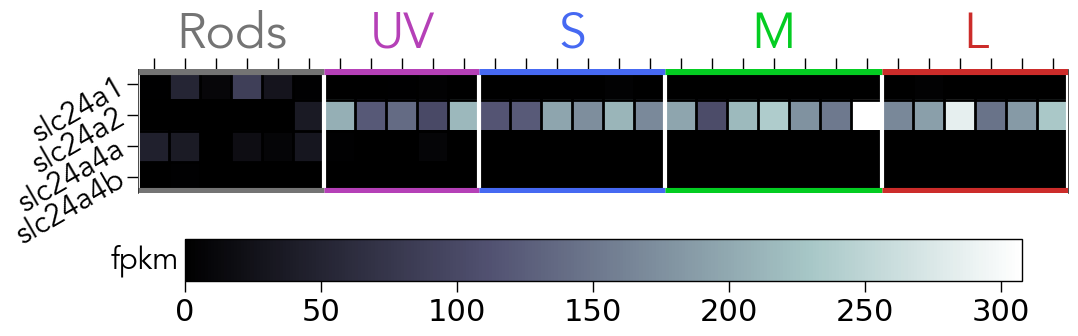

In [91]:
genenames = gdf['symbol'].values
samplenames = [] #skipping names to replace in intaglio
data = gdf.iloc[0:,7:37].values
# OR
# data = gdf.iloc[0:,7:37].apply(lambda x: x/x.max(), axis=1).values #normalizing by max
# OR
# data = zscore(data,axis=1, nan_policy='omit') # calculate z-score
data[np.isnan(data)] = np.nanmin(data) # make NaN black

# log2matrix = np.vectorize(log2)
# data = log2matrix(gdf.iloc[0:,7:37].values)


fig, ax = plt.subplots(figsize=[12,12])
im, cbar = heatmap(data, genenames, samplenames, ax=ax,
                   cmap="inferno", cbarlabel="fpkm")
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")

dPath = "/Users/angueyraaristjm/Desktop/temp/"
plt.savefig("{0}.svg".format(dPath + plotName), transparent=True, format="svg")
# plt.savefig("/Users/angueyraaristjm/Figures/zf/20210225_UTHApplication/resources/{0}.svg".format('sema'), transparent=True, format="svg")
plt.show()

In [ ]:
gdf.symbol

In [ ]:
plotName = 'test'

# foxq2 = S specific;

# genelist = ['wrb','get4'] # disrupts photoreceptors synapses (Danielle, 2016)
# genelist = ['pappaa','igf2bp2b'] # In Miller, 2018 model pappaa cleaves igf-bp to increase igf1 availability. unfortunately, this is supposed to bind mRNA not IGF itself
# genelist = ['gpx1a','gpx1b','gpx4a','gpx4b']
# genelist = ['rgs9bp','RGS9BP']
# genelist = ['chchd1','chchd10']
# genelist = ['yipf6','yipf1','meis1b','pbx1a']
# genelist = ['sema3fb','sema3fa','sema6d']
# genelist = ['esama','esamb']
# genelist = ['il34','il7r']
# genelist = ['cxxc4','cxxc1a']
# genelist = ['mbd3b','mbd3a']
# genelist = ['cdr2a','cdr2l']
# genelist = ['coro6','coro2a','coro1ca']
# genelist = ['auts2a','auts2b']
# genelist = ['plxnb1a','plxna2']
# genelist = ['cux1a','cux1b','cux2b']
# genelist = ['arih1','arih2','arih1l']
# genelist = ['crhbp','crhr2','crhr1']
# genelist = ['chn1','chn2']
# genelist = ['robo1','robo2','robo3','robo4'] #nothing here
# genelist = ['ntng1a','ntng2a','ntng2b'] #low counts but interesting. Netrins are important for RGC axons going towards optic disc. ntng2b in mouse mediates rod-hc recognition!
# genelist = ['fat1a','fat1b','yap1','scrib','cc2d2a'] #fat1 important for renal development along yap1/hippo and scribble; cc2d2a involved in cilium development
# genelist = ['c1qbp','c1qa','c1qb'] #keep this in mind. Beth Stevens work shows that microglia engulf synapses through activation by c1q; maybe c1qbp is produced in healthy cells (inside mitochondria) to keep c1q bound and gets released upon damage.
# genelist = ['cc2d2a','rab8'] #Bahcman 2011: cc2d2a-/- causes Joubert syndrom. Important for cilium development by association with rab8. Not expressed in adults?
# genelist = ['per2','per3']
# genelist = ['gpsm2','gpsm1b','gpr107','gpr108'] #
# genelist = ['tbx2a','tbx2b','gdf6a','cnbpa','egr1', 'ndrg1a','ndrg1b'] # fate genes

#Hensley, 2011 smarca4
# genelist = ['smarca4a','guk1a','guk1b','dtnbp1a','elovl4b','id2b','ckmt2a','ckmt2b','aanat2','pbx1a'] #smarca4 regulated genes: follow up elovl4b, ckmt2a/b, pbx1a
# genelist = ['nme2a','nme3',''] #smarca4 regulated genes: follow up elovl4b, ckmt2a/b, pbx1a

# genelist = ['adgrl3.1','ntng2a','ntng2b'] #low counts but interesting. 
# genelist = ['cplx4a','cplx4b','cplx4c'] #low counts but interesting. 

# genelist = ['frmpd2', 'lrit3a'] #low counts but interesting. 
# genelist = ['si:busm1-57f23.1 ', 'mhc1uba','serinc2'] # 

# genelist = ['ccdc28a','ccdc25','ccdc173','sox6','prdm9','prdm1b']

# genelist = ['per2','bhlhe40','nr1d2b','tefa','aanat2','aanat1'] #circadian genes. Correlate with collection time?

# genelist = ['elovl4b','elovl8a'] #a cone specific gene. 
# genelist = ['pbx1a','egr1','egr3','egr4'] # fishing for new targets
# genelist = ['foxg1b','foxq2','foxo3b','lmo4b','nfia'] # fishing for new targets
# genelist = ['anxa13','prdx5','mpp5b','mpp6a','serpina10a'] # fishing for new targets
# genelist = ['rbp4l','rbp3','impg1a','impg2b','ntm'] # fishing for new targets
# genelist = ['tapt1b','tapt1a','frmpd2','wdr37','fabp7a','tle3a'] # fishing for new targets
# genelist = ['ankrd33aa','ankrd33ab','dhx32a','dhx32b','wdr17']


# genelist = ['slc1a8a','slc1a8b','slc1a4','slc1a7a'] # EAATs (glutamate uptake)
# genelist = ['pmela','slc6a6b','naa35','ush2a'] # sex-associated rod genes in Sun, 2018 (all enriched in females, except pmela)

# genelist = ['pcloa','pclob']
# genelist = ['mtdha','mtdhb']
# genelist = ['igsf9b','igsf21a','igsf21b']
# genelist = ['rx3','lin9','igsf21b','foxq2','foxo3b','foxg1b','rxrga','smad5']
# genelist = ['sall1a','sall1b','sall2','sall4']
# genelist = ['rbm8a','rbm39a','rbm39b','rbmx','rbm22','rbm5']
# genelist = ['rbm5','rbm4.1','rbm4.2']
# genelist = ['kif5ba','kif1aa','kif1ab','kif1bp'] #kif5-/- : Charcot-MarieTooth; Campbell 2013: kif5s in all retinal layers, but only kif5ba and bb are in ONL
# genelist = ['kif3a','kif3b','kif16ba','kif19','kif25'] #
# genelist = ['robo2','slit1a','nbeaa','prdm1b'] #


# genelist = ['pcdh2ab9','pcdh2g28','pcdh15a','pcdh15b','pcdh11','pcdh10a'] #interesting ones
# plotName = 'pcdhs'

# genelist = ['sema7a','sema6d','sema3fb','sema3fa','sema4ab','sema4ba'] #the good ones
# genelist = ['sema6a','sema3aa','sema6e','sema5bb','sema4c','sema6bb','sema6dl','sema5ba'] # the inconsistent ones
# genelist = ['sema6ba','sema5a','sema3c','sema3b','sema3e','sema3d','sema3h','sema3ab','sema4e','sema4aa','sema3gb','sema3ga','sema4bb','sema3bl','sema4ga','sema4gb'] # the negative ones

# genelist = ['ncdn','flrt3'] 
# genelist = ['odf2a','odf2b']
# genelist = ['syne1a','syne1b','syne2b','syne3']
# genelist = ['rasgrf2a','rasgrf2b']
# genelist = ['rasgrf2a','rasgrf2b','nmnat2','rbx1','nrf1','unc119.2','unc119b'] # involved in migration

# genelist = ['syt5a','syt5b','syt1a','syt1b','syt14a']


# genelist = ['myo19','myo16','myo7bb','myo5b','myo1cb','myo5aa','myo7aa','myo6a','myo6b']
# genelist = ['fgfr1op','fgfr1op2','fgf1b','fgf13a','fgf11b']
# genelist = ['prdm1b','fgfr1op2']
# genelist = ['frmpd1a','gpsm2'] # Ulisse + Pahlberg: these proteins interact with rod transducin 

# genelist = ['epha7','frmpd2','pkp4','chd7','hook1']
# genelist = ['thrb','samd7','samd1a','samd11','dscaml1'] #samd11:https://www.ncbi.nlm.nih.gov/pubmed/27734943
# genelist = ['thrb','nrl']
# genelist = ['opn3','opn4.1','opn4a','opn4b','opn5','opn6a','opn9'] #

# genelist = ['foxq2','prdm1b','nr2f6b','pbx1a','samd7','samd1a','samd11'] # 
v

***
## heatMap: photoreceptors, rods, Müller Glia, microglia<a id='heatOther'>∮</a>
***
[Back to Index](#Index)  
[Go to Exploring TFs](#TFs)  
[Go to Known TFs](#knownTFs)  

In [6]:
# geneTag = 'cry[0-9]' # this is how you can select numbers
geneTag = 'prdm'
# geneTag = 'zgc:73359' #supposed to be pde6hb (Ogawa, Corbo, 2021)
# geneTag = 'si:dkey-44k' # supposed to be cng1b (Ogawa, Corbo, 2021)
gdf = findgenelist(geneTag)
# gdf = gdf.sort_values(by=["baseMean"],ascending=False)
# gdf = gdf[gdf.baseMean > 0]
# gdf = gdf.drop(np.arange(20,93))
# gdf = gdf.drop([17,3,8,7])
gdf = gdf.sort_values(by=["symbol"])
# gdf = gdf.sort_values(by=["padj"])


odf = findgenelist_zfOgawa2021(geneTag)
odf = odf.sort_values(by=["symbol"])

rdf = findgenelist_rods(geneTag)
rdf = rdf.sort_values(by=["symbol"])
# rdf = rdf[rdf.baseMean > 0]

mdf = findgenelist_glia(geneTag)
mdf = mdf.sort_values(by=["symbol"])
# mdf = mdf[mdf.baseMean > 0]

sqdf = findgenelist_sqcones(geneTag)
sqdf = sqdf.sort_values(by=["symbol"])
# sqdf = sqdf[sqdf.baseMean > 0]

hcdf = findgenelist_haircell(geneTag)
hcdf = hcdf.sort_values(by=["symbol"])
# hcdf = hcdf[hcdf.baseMean > 0]

# zflhdf = findgenelist_zfLarvalHoang2020(geneTag)
# zflhdf = zflhdf.sort_values(by=["symbol"])
# zfahdf = findgenelist_zfAdultHoang2020(geneTag)
# zfahdf = zfahdf.sort_values(by=["symbol"])
zfhdf = findgenelist_zfHoang2020(geneTag)
zfhdf = zfhdf.sort_values(by=["symbol"])

zfxdf = findgenelist_zfXu2020(geneTag)
zfxdf = zfxdf.sort_values(by=["symbol"])

gdf

,symbol,genename,baseMean,log2FoldChange,lfcSE,pvalue,padj,R1,R2,R3,...,M4,M5,M6,S7,L1,L2,L3,L4,L5,L6
5,prdm10,PR domain containing 10,0.207835,2.199344e-07,0.001443,0.661226,0.841588,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.402379,0.000000,0.000000,0.330593,0.000000,0.000000,0.300803
4,prdm11,PR domain containing 11,0.473536,-2.450281e-07,0.001443,0.339738,0.621315,0.000000,0.000000,0.000000,...,5.890760,0.000000,0.000000,0.000000,0.063704,0.041323,0.000000,0.898073,0.000000,0.000000
8,prdm12b,PR domain containing 12b,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,prdm13,PR domain containing 13,3.811210,9.051462e-07,0.001443,NaN,NaN,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.610975,0.000000,0.000000,0.000000
9,prdm14,PR domain containing 14,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,prdm15,NaN,0.020378,1.491107e-07,0.001443,0.442429,NaN,0.000000,0.000000,0.225570,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.385762,0.000000,0.000000
11,prdm1a,PR domain containing 1a with ZNF domain,0.396484,5.398574e-07,0.001443,NaN,NaN,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,prdm1b,PR domain containing 1b with ZNF domain,3.046991,-1.664623e-06,0.001443,0.080307,0.277901,0.105513,0.000000,0.000000,...,5.158865,0.000000,0.000000,0.366444,8.135900,7.562116,15.035171,8.120441,7.966819,7.702142
0,prdm2a,PR domain containing 2 with ZNF domain a,0.566315,-1.962700e-06,0.001443,0.069050,0.252126,0.000000,0.200809,0.000000,...,2.531807,0.617086,0.428826,3.910633,0.381357,0.000000,0.572913,0.000000,0.000000,0.738423
3,prdm2b,PR domain containing 2 with ZNF domain b,1.542871,-4.734574e-07,0.001443,0.262779,0.549508,0.000000,0.000000,2.169688,...,12.027150,0.118192,0.801795,0.000000,0.569575,3.465577,2.631344,0.000000,0.504284,3.201654


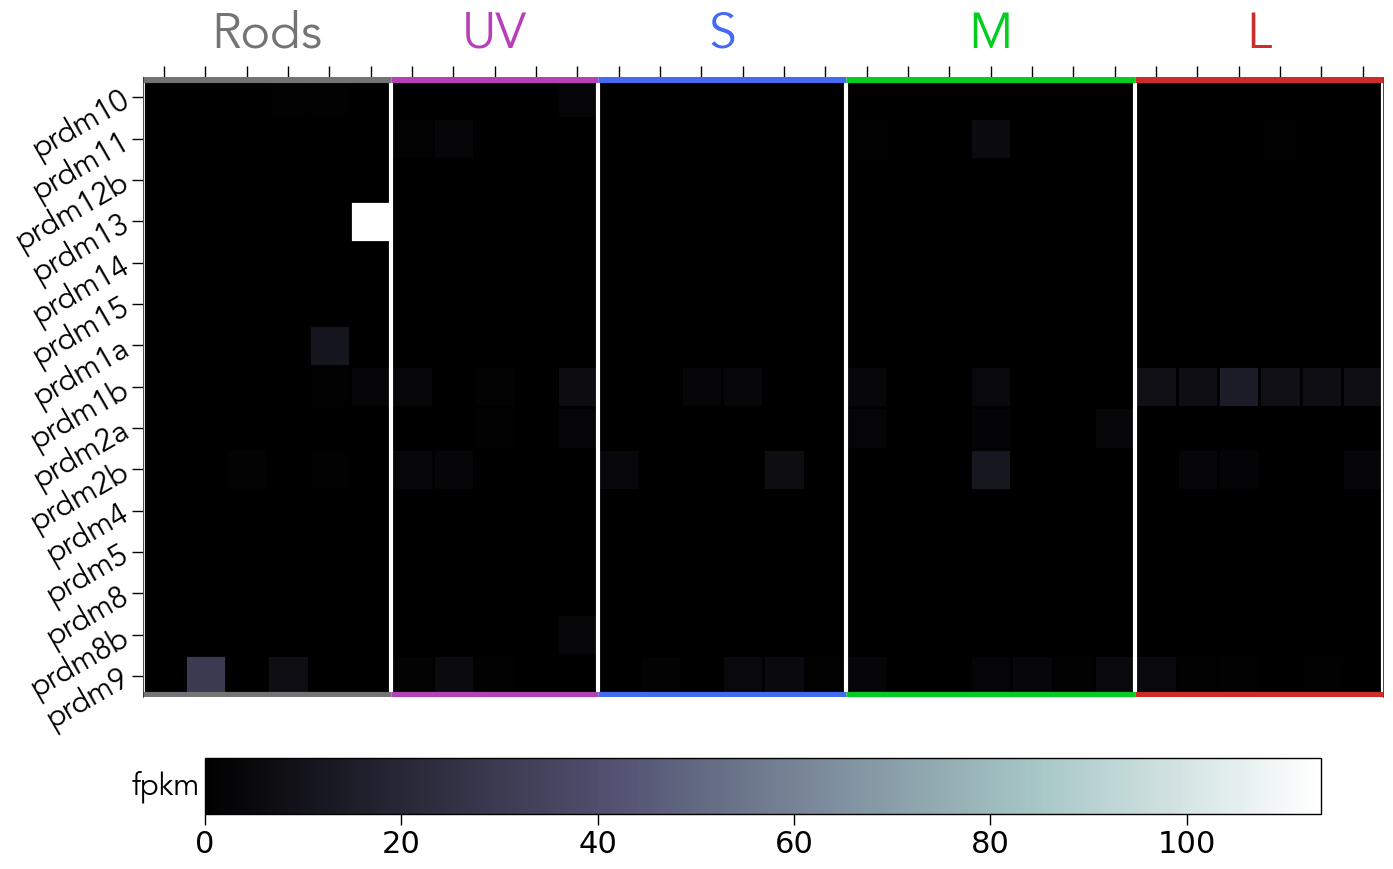

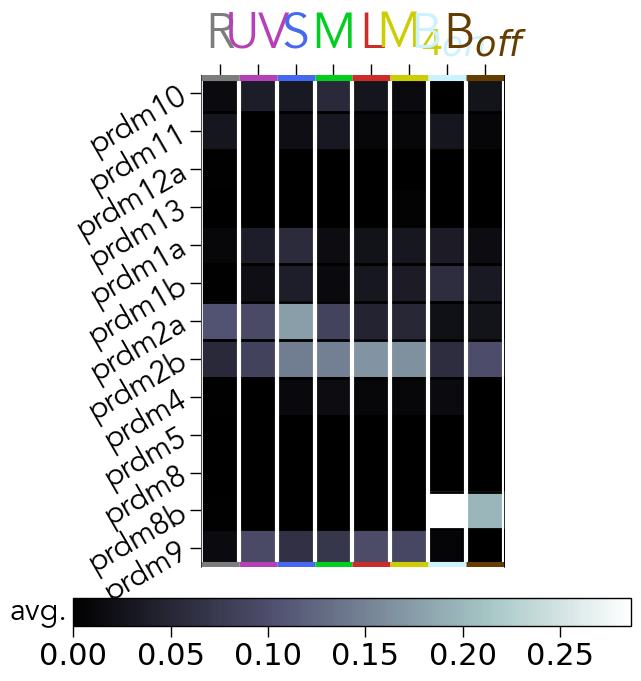

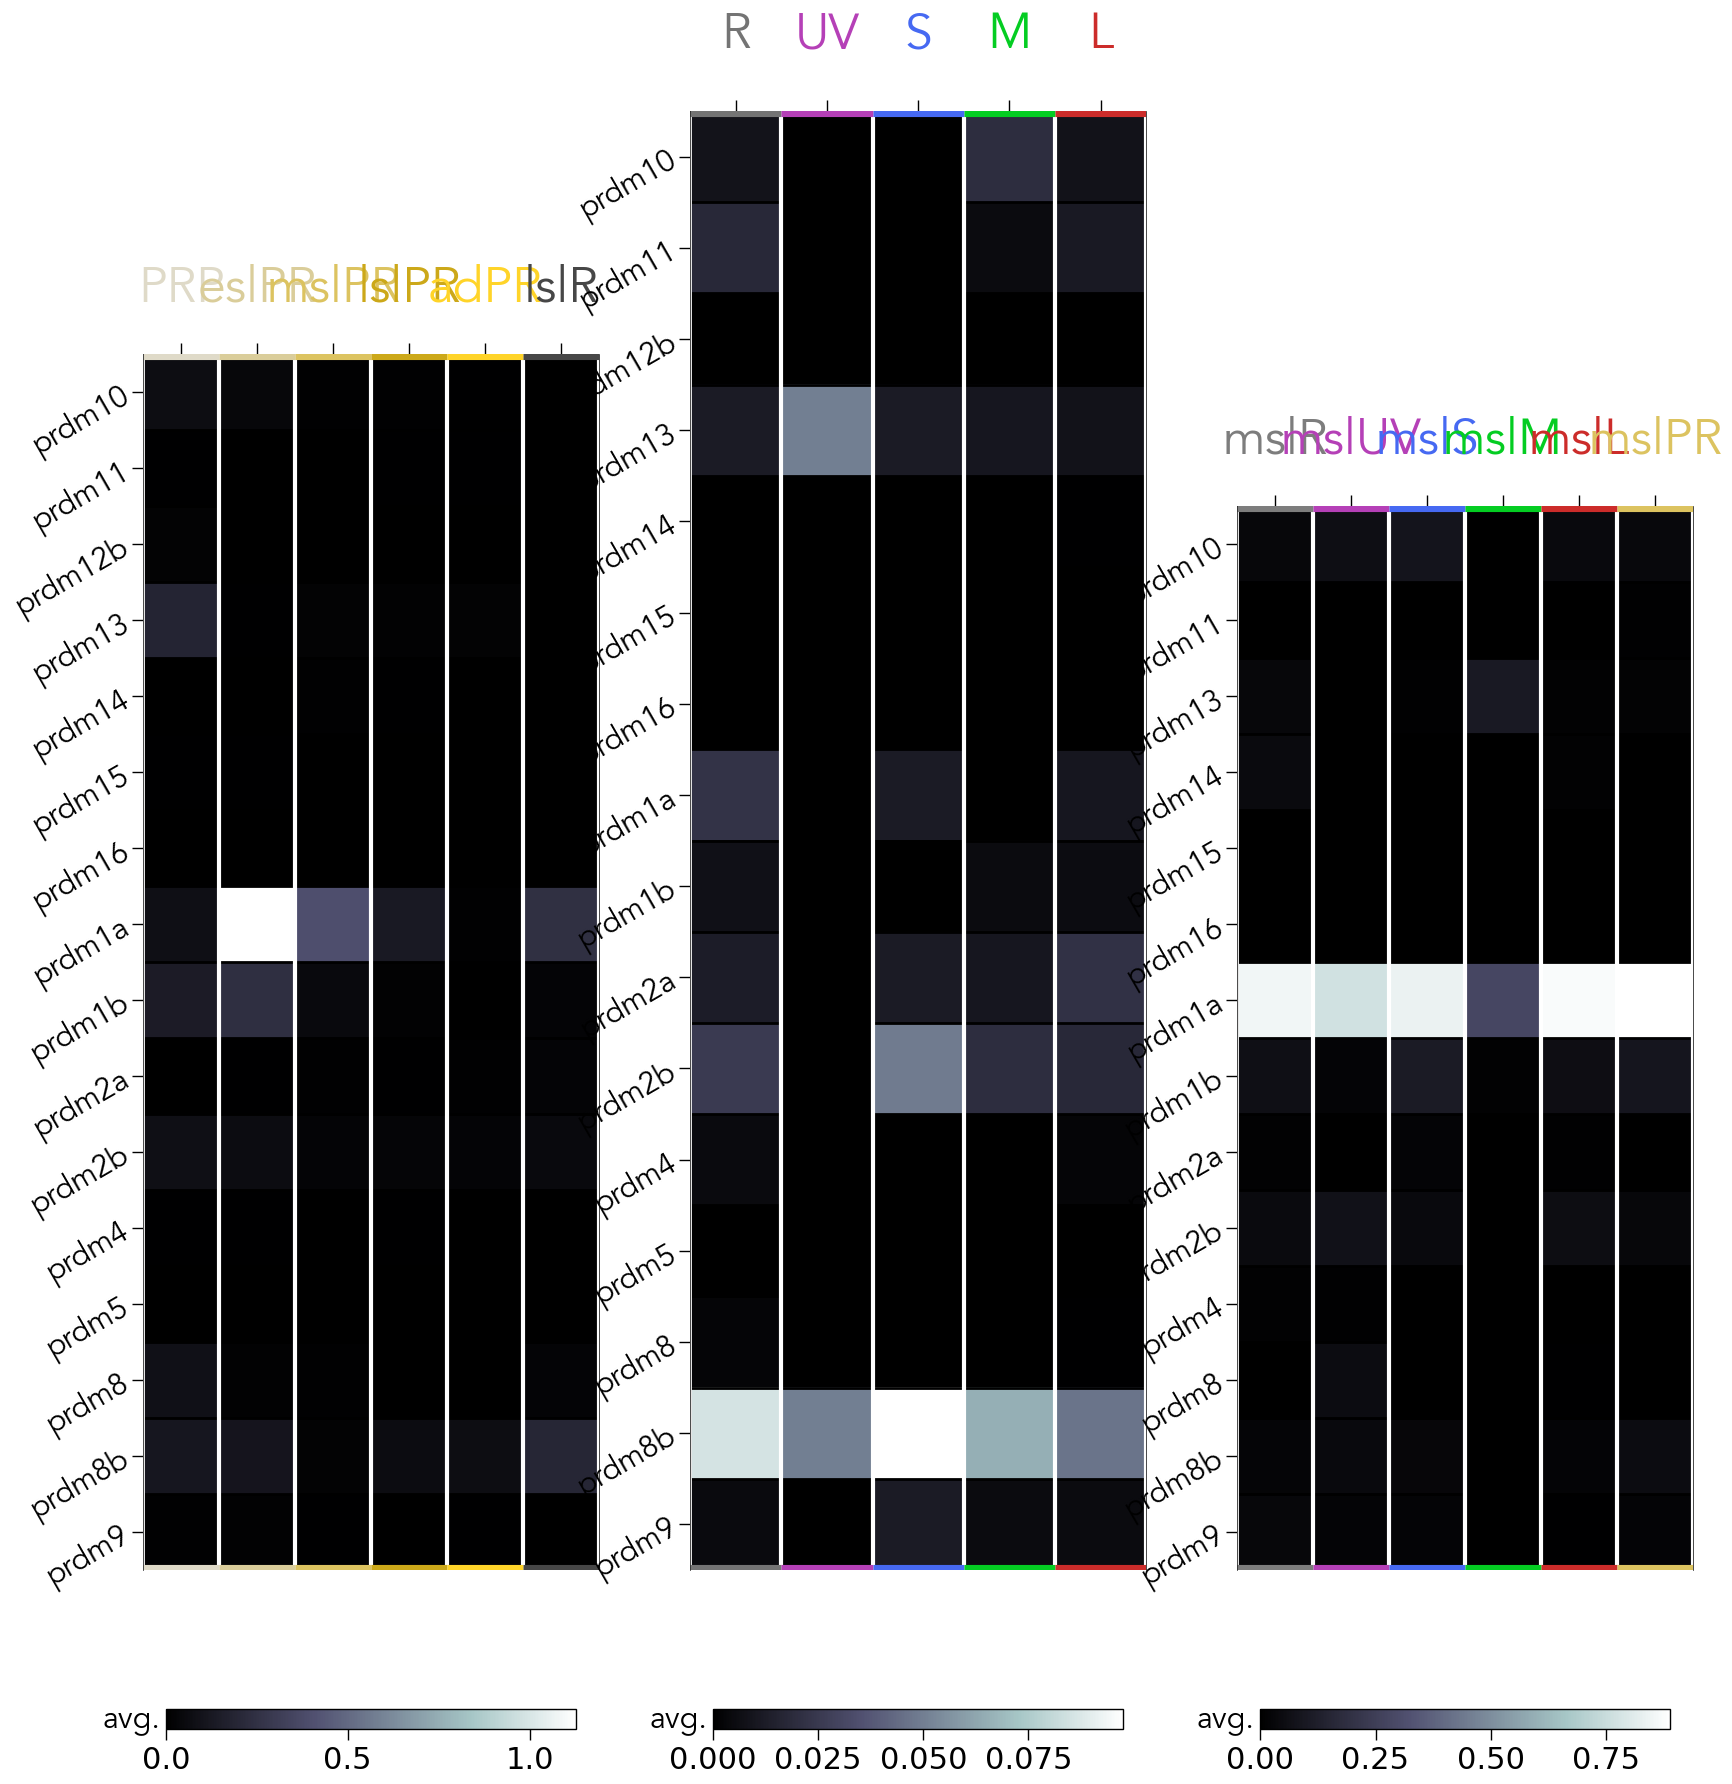

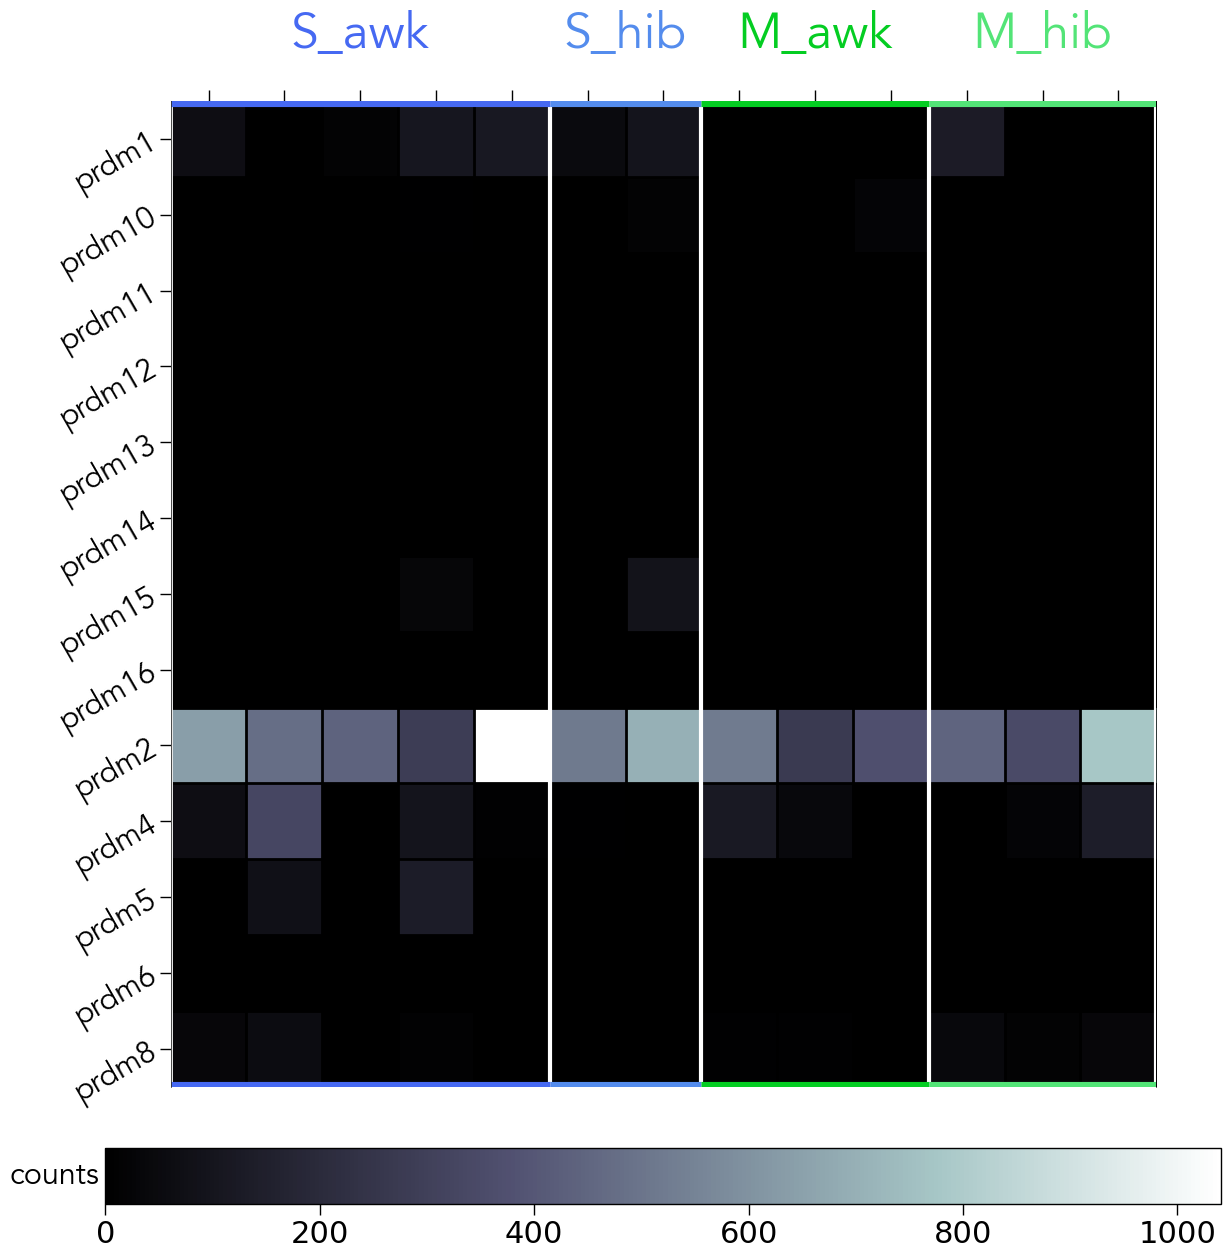

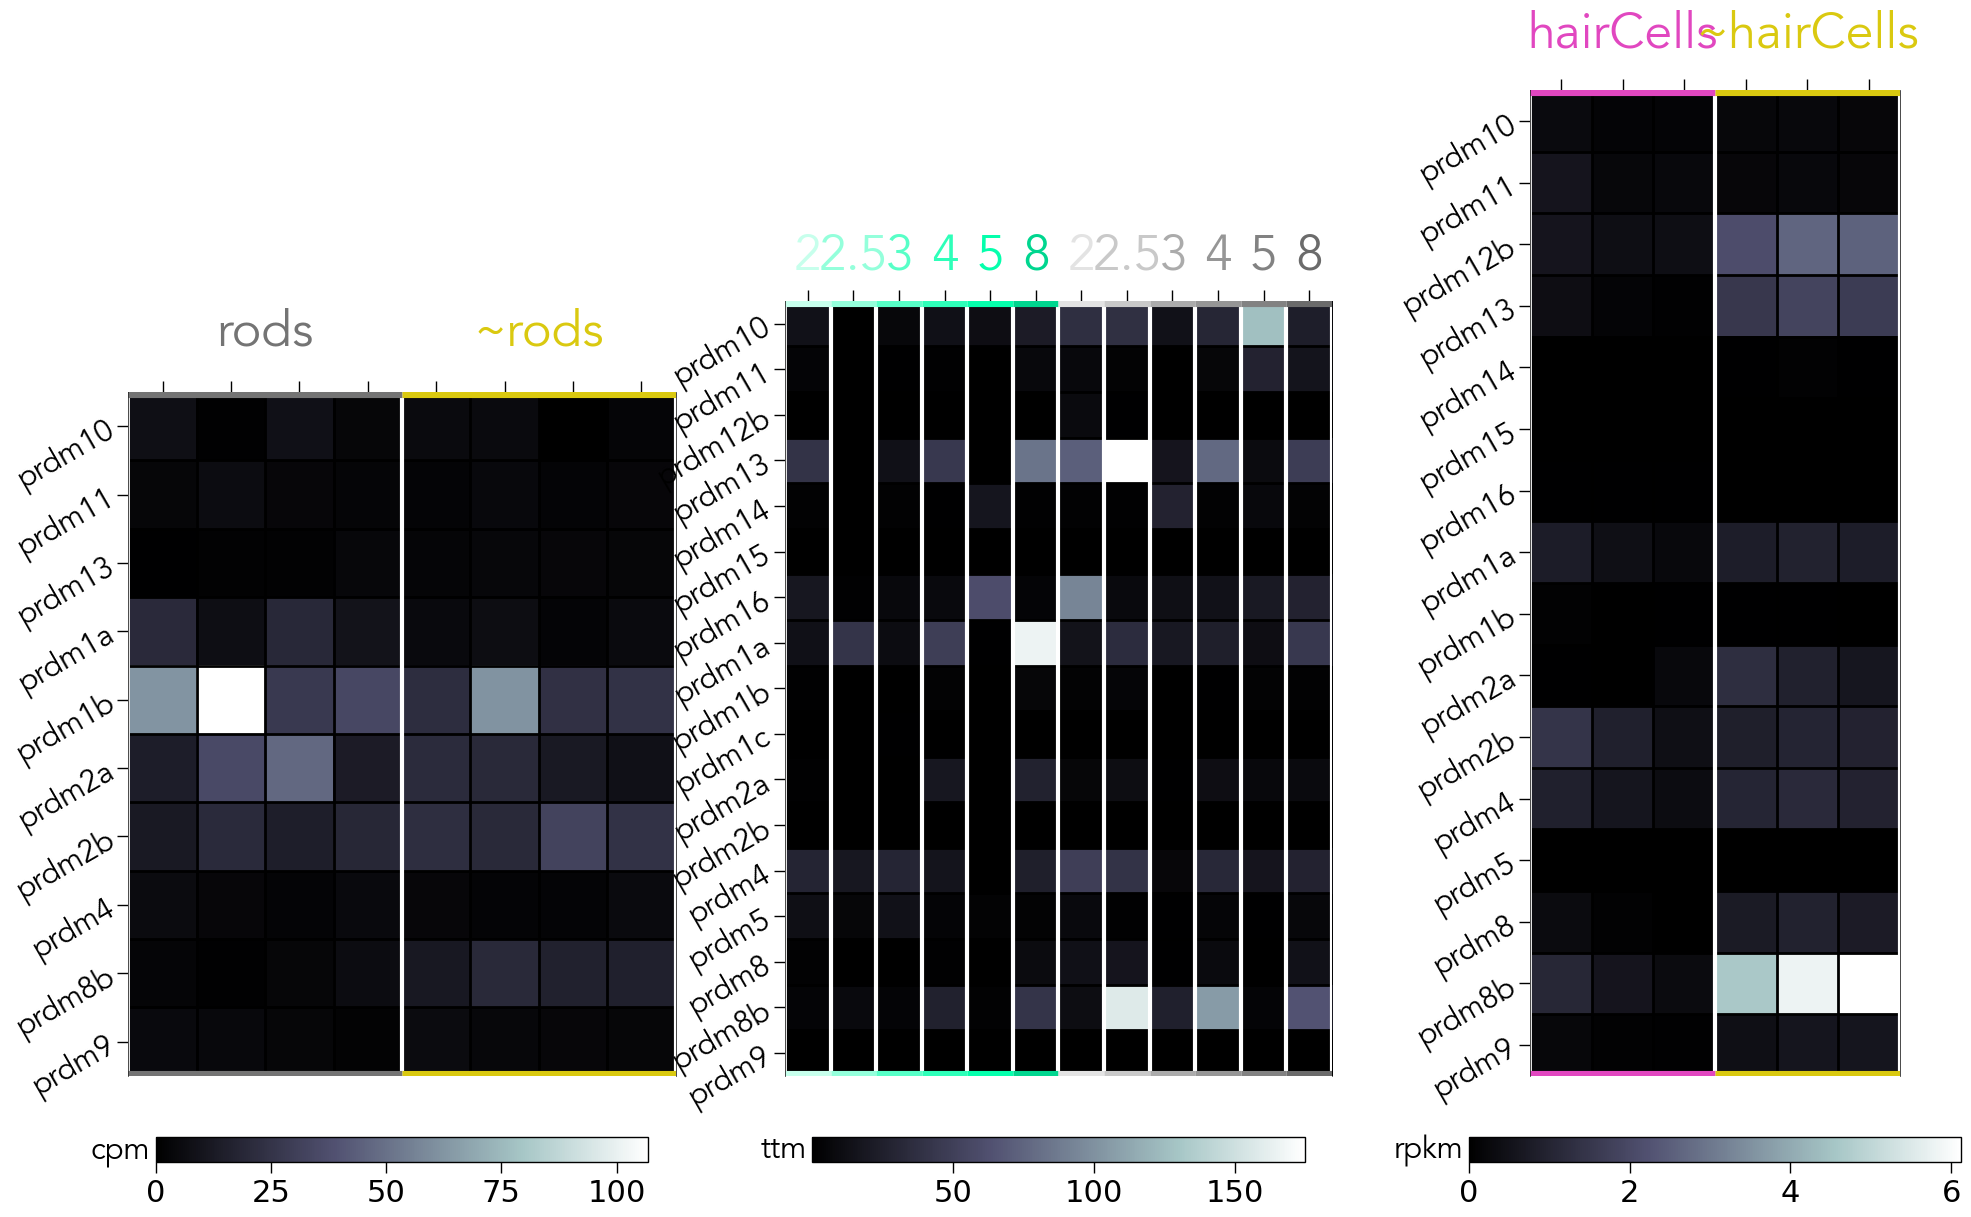

In [7]:
plotName = 'test'
# plotName = 'heatMap_vamp'
genenames = gdf['symbol'].values
samplenames = [] #skipping names to replace in intaglio
data = gdf.iloc[0:,7:37].values
fig, ax = plt.subplots(figsize=[16,16])
im, cbar = heatmap(data, genenames, samplenames, ax=ax)
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")
## plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()

genenameso = odf['symbol'].values
samplenameso = [] #skipping names to replace in intaglio
datao = odf.iloc[0:,2:10].values
figo, axo = plt.subplots(figsize=[8,8])
imo, cbaro = heatmap_zfOgawa2021(datao, genenameso, samplenameso, ax=axo)
### plt.savefig("{0}_Ogawa.svg".format(plotName), transparent=True, format="svg")
plt.show()

# Hoang reanalyzed 10x dataset and Xu reanalyzed 3dpf dataset
# split heatmaps
genenameszflh = zfhdf['symbol'].values
samplenameszflh = [] #skipping names to replace in intaglio
datazflh = zfhdf.iloc[0:,2:8] #avg. expression
# datazflh = zfhdf.iloc[0:,2+12:8+12] # % expression
genenameszfah = zfhdf['symbol'].values
samplenameszfah = [] #skipping names to replace in intaglio
datazfah = zfhdf.iloc[0:,8:13] # avg expression
# datazfah = zfhdf.iloc[0:,8+12:13+12] # % expression

genenameszfx = zfxdf['symbol'].values
samplenameszfx = [] #skipping names to replace in intaglio
datazfx = zfxdf.iloc[0:,2:8]

figr, (axzflh,axzfah,axzfx) = plt.subplots(1,3,figsize=[20,36])
imzflh, cbarzflh = heatmap_zflarvaHoang2020(datazflh, genenameszflh, samplenameszflh, ax=axzflh)
imzfah, cbarzfah = heatmap_zfadultHoang2020(datazfah, genenameszfah, samplenameszfah, ax=axzfah)
imzfx, cbarzfx = heatmap_zfXu2020(datazfx, genenameszfx, samplenameszfx, ax=axzfx)
### plt.savefig("{0}_10x.svg".format(plotName), transparent=True, format="svg")
plt.show()
#single heatmap
# genenameszfh = zfhdf['symbol'].values
# samplenameszfh = [] #skipping names to replace in intaglio
# datazfh = zfhdf.iloc[0:,2:13] #avg. expression
# # datazfh = zfhdf.iloc[0:,2+11:13+11] #% expression
# figzfh, axzfh = plt.subplots(figsize=[16,16])
# imzfh, cbarzfh = heatmap_zfHoang2020(datazfh, genenameszfh, samplenameszfh, ax=axzfh)
# plt.show()

genenamessq = sqdf['symbol'].values
samplenamessq = [] #skipping names to replace in intaglio
datasq = sqdf.iloc[0:,8:21]
figsq, axsq = plt.subplots(figsize=[16,16])
imsq, cbarsq = heatmap_sqcones(datasq, genenamessq, samplenamessq, ax=axsq)
### plt.savefig("{0}_sq.svg".format(plotName), transparent=True, format="svg")
plt.show()

genenamesr = rdf['symbol'].values
samplenamesr = [] #skipping names to replace in intaglio
datar = rdf.iloc[0:,7:16]
genenamesm = mdf['symbol'].values
samplenamesm = [] #skipping names to replace in intaglio
datam = mdf.iloc[0:,5:41]
genenameshc = hcdf['symbol'].values
samplenameshc = [] #skipping names to replace in intaglio
datahc = hcdf.iloc[0:,2:8]

figr, (axr,axm, axhc) = plt.subplots(1,3,figsize=[24,16])
# figr = plt.figure(figsize=[16,2],constrained_layout=True)
# fig_grid = figr.add_gridspec(1,28)
# axr = figr.add_subplot(fig_grid[0,0:8])
# axm = figr.add_subplot(fig_grid[0,9:])
imr, cbarr = heatmap_rods(datar, genenamesr, samplenamesr, ax=axr)
imm, cbarm = heatmap_glia(datam, genenamesm, samplenamesm, ax=axm)
imhc, cbarhc = heatmap_haircell(datahc, genenameshc, samplenameshc, ax=axhc)
plt.show()

In [ ]:
# now plot a single gene
genename = 'lrrfip1a'
# genename = 'ncdn'
# genename = 'chn2'
# genename = 'grin1b'
# genename = 'cdhr1a'
# genename = 'lrit1a'
n,h = plotBars(genename)
# fH, ax = plt.subplots(figsize= [10,6.6666])
# fH, ax = plt.subplots(figsize= [5,3.3333])
fH, ax = plt.subplots(figsize= [8,5]) # for paper
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None, color=pC['plt'])
formatFigure(genename, fH, ax, pH)
ax.set_ylim([0,40]);
ax.set_yticklabels(['{:,.0f}'.format(x) for x in ax.get_yticks()])
dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Manuscripts/2021_zfConeRNAseq/newGeneFigures/"
# dPath = "/Users/angueyraaristjm/OneDrive - National Institutes of Health/zf/Manuscripts/2021_zfConeRNAseq/resources/"
plt.savefig(dPath + genename + ".svg", transparent=True, format="svg")
plt.savefig(dPath + genename + ".png", transparent=False, format="png")

In [ ]:
# sparkline
genename = 'auts2b'
scalar= 3;
n,h = plotBars(genename)
fH, ax = plt.subplots(figsize=[2.25*scalar,0.5*scalar])
ax.axhline(y = np.mean(h), color = 'white', linewidth = .2, alpha = 1, solid_capstyle='butt', zorder = 0)
pH = ax.bar(n, h, width=.8, bottom=None, align='center', data=None, color=pC['plt'], zorder = 1)
ax.text(.90, 1, genename,horizontalalignment='left',verticalalignment='top',transform=ax.transAxes, fontsize=14, zorder = 0)
ax.text(.97, 0.2, (np.around(np.mean(h),decimals=0)),horizontalalignment='left',verticalalignment='top',transform=ax.transAxes, fontsize=8, zorder = 0)
ax.set_axis_off()
dPath = "/Users/angueyraaristjm/Documents/LiLab/Applications/2021_FacultyApps/2021_06_CIBR/resources/"
plt.savefig(dPath + genename + ".svg", transparent=True, format="svg")

In [ ]:
8/(12/10)

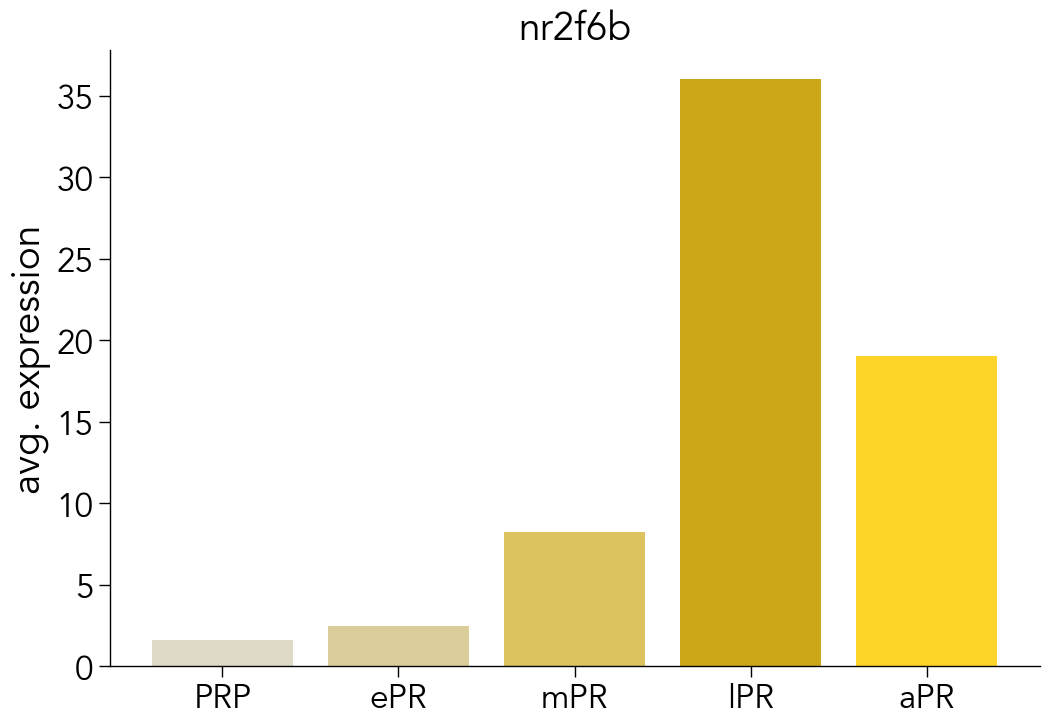

In [9]:
genename='nr2f6b'
# plot developmental course
def plotDevCourse(genename):
    gdf = findgene_zfHoang2020(genename)
    n = np.arange(0,5) #PRP, ePR, mPR, lPR, aPR, lR
    a = 0; #for avg. expression
    a = 12; #for pct. expression
    h_start = 2 + a
    h_end = 7 + a
    h = gdf.iloc[0,h_start:h_end]
    return n, h

def formatFigureDevCourse(genename, figH, axH, plotH):
    [font_path, fontTicks, fontLabels, fontTitle] = defaultFonts();
    axH.set_xticks([0,1,2,3,4])
    axH.set_xticklabels(['PRP','ePR','mPR','lPR','aPR']);
    axH.ticklabel_format(style='sci',axis='y',scilimits=(0,2))
#     axH.set_ylabel('norm. counts', fontproperties=fontLabels)
    axH.set_ylabel('avg. expression', fontproperties=fontLabels)
    axH.set_title(genename, fontproperties=fontTitle)
    axH.spines['top'].set_visible(False)
    axH.spines['right'].set_visible(False)

    for label in (axH.get_xticklabels() + axH.get_yticklabels()):
        label.set_fontproperties(fontTicks)
    axH.tick_params(axis = 'both', which = 'major', labelsize = 24)
    axH.yaxis.offsetText.set_fontsize(24)

n,h = plotDevCourse(genename)
fH, ax = plt.subplots(figsize= [12,8])
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None, color=zfHC['plt'])
formatFigureDevCourse(genename, fH, ax, pH)

dPath = "/Users/angueyraaristjm/Desktop/temp/"
# plt.savefig(dPath + genename + "_dev.svg", transparent=True, format="svg")
plt.savefig(dPath + genename + "_dev.png", transparent=True, format="png")

In [ ]:
a=12
gdf = findgene_zfHoang2020(genename)
gdf.iloc[0,2+a:7+a]

In [ ]:
# genenames = gdf['symbol'].values
# samplenames = [] #skipping names to replace in intaglio
# data = gdf.iloc[0:,7:37].values

# genenamesr = rdf['symbol'].values
# samplenamesr = [] #skipping names to replace in intaglio
# datar = rdf.iloc[0:,7:16]
# genenamesm = mdf['symbol'].values
# samplenamesm = [] #skipping names to replace in intaglio
# datam = mdf.iloc[0:,5:41]

# genenamessq = sqdf['symbol'].values
# samplenamessq = [] #skipping names to replace in intaglio
# datasq = sqdf.iloc[0:,8:21]

# figr = plt.figure(figsize=[8,24],constrained_layout=True)
# fig_grid = figr.add_gridspec(3,2)
# ax = figr.add_subplot(fig_grid[0,:])
# axr = figr.add_subplot(fig_grid[1,0])
# axm = figr.add_subplot(fig_grid[1,1])
# axsq = figr.add_subplot(fig_grid[2,:])
# # axm = plt.subplot(2,2,2)
# im, cbar = heatmap(data, genenames, samplenames, ax=ax,cmap="inferno", cbarlabel="fpkm")
# imr, cbarr = heatmap_rods(datar, genenamesr, samplenamesr, ax=axr, cmap="inferno", cbarlabel="cpm")
# imm, cbarm = heatmap_glia(datam, genenamesm, samplenamesm, ax=axm, cmap="inferno", cbarlabel="tmm")
# imsq, cbarsq = heatmap_sqcones(datasq, genenamessq, samplenamessq, ax=axsq, cmap="inferno", cbarlabel="counts")

# plt.show()

#### Saving heatmaps for Hoang adult photoreceptors

In [10]:
geneTag = 'xbp1'
gdf = findgenelist(geneTag)

zfahdf = findgenelist_zfAdultHoang2020(geneTag)
zfahdf = zfahdf.sort_values(by=["symbol"])

# zfahdf = zfahdf.drop([2])
zfahdf

NameError: name 'findgenelist_zfAdultHoang2020' is not defined

In [ ]:
plotName = 'heatMapHoang_' + geneTag

genenameszfah = zfahdf['symbol'].values
samplenameszfah = [] #skipping names to replace in intaglio
datazfah = zfahdf.iloc[0:,2+8:9+8]

fig, ax = plt.subplots(figsize=[8,18])
imzfah, cbarzfah = heatmap2_zfadultHoang2020(datazfah, genenameszfah, samplenameszfah, ax=ax)
# plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()


#### Saving heatmaps for Ogawa adult photoreceptors

In [11]:
geneTag = 'xbp1'
gdf = findgenelist(geneTag)

odf = findgenelist_zfOgawa2021(geneTag)
odf = odf.sort_values(by=["symbol"])

# zfahdf = zfahdf.drop([2])
odf

,symbol,avgMean,avgR,avgUV,avgS,avgM,avgL,avgM4/L1,avgonBC,avgoffBC,pctMean,pctR,pctUV,pctS,pctM,pctL,pctM4/L1,pctonBC,pctoffBC
0,xbp1,2.968877,2.295181,7,4.631229,2.399209,2.093878,3.861538,0.808824,0.661157,88.396551,96.987952,97.142857,85.714286,73.517787,67.142857,86.666667,100,100


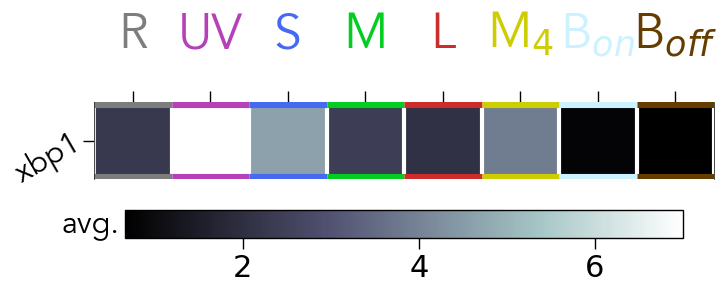

In [12]:
plotName = 'heatMapOgawa_' + geneTag

genenameso = odf['symbol'].values
samplenameso = [] #skipping names to replace in intaglio
datao = odf.iloc[0:,2:10].values
figo, axo = plt.subplots(figsize=[8,8])
imo, cbaro = heatmap_zfOgawa2021(datao, genenameso, samplenameso, ax=axo)
# plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()


In [ ]:
!pwd

***
## sparkline plot for markdown file<a id='sparkline'>∮</a>
***
[Back to Index](#Index)

In [ ]:
genename = 'xbp1'
scalar= 3;
n,h = plotBars(genename)
fH, ax = plt.subplots(figsize=[2.25*scalar,.25*scalar])
ax.axhline(y = np.mean(h), color = 'white', linewidth = .2, alpha = 1, solid_capstyle='butt', zorder = 0)
pH = ax.bar(n, h, width=.8, bottom=None, align='center', data=None, color=pC['plt'], zorder = 1)
ax.text(.90, 1, genename,horizontalalignment='left',verticalalignment='top',transform=ax.transAxes, fontsize=7, zorder = 0)
ax.text(.97, 0.2, (np.around(np.mean(h),decimals=0)),horizontalalignment='left',verticalalignment='top',transform=ax.transAxes, fontsize=6, zorder = 0)
ax.set_axis_off()
# plt.savefig("/Users/angueyraaristjm/Documents/LiMolec/zfGenotyping/targetGenes/202001_zfDEGs/resources/{0}.svg".format(genename), transparent=True, format="svg")

In [ ]:
'{0}fpkm'.format(np.around(np.mean(h),decimals=0))

In [ ]:
# genename = 'kcnk1'
# n,h = plotBars_sqcones(genename)
# fH, ax = plt.subplots(figsize=[2.2,.25])
# ax.axhline(y = np.mean(h), color = 'white', linewidth = .2, alpha = 1, solid_capstyle='butt')
# pH = ax.bar(n, h, width=.8, bottom=None, align='center', data=None, color=sqC['plt'])
# ax.text(.92, 1, genename,horizontalalignment='left',verticalalignment='top',transform=ax.transAxes, fontsize=6)
# ax.text(.97, 0.2, (np.around(np.mean(h),decimals=0)),horizontalalignment='left',verticalalignment='top',transform=ax.transAxes, fontsize=4)
# ax.set_axis_off()
# plt.savefig("/Users/angueyraaristjm/Documents/LiMolec/zfGenotyping/targetGenes/202001_zfDEGs/resources/{0}sq.svg".format(genename), transparent=True, format="svg")

***
## PCA <a id='pca'>∮</a>
***
[Back to Index](#Index)

### This is supposed to run only once. Creates sparklines and a markdown file with entries for these genes

In [ ]:
# deseqdir= "~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/00_rodsVcones/"
# fname = "fromPython_PCgenes_RvC_fromPython.md"

# deseqdir= "~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/00_USvsLM/"
# fname = "fromPython_PCgenes_USvLM.md"

deseqdir= "~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/00_LvsM/"
fname = "fromPython_PCgenes_LvM.md"

# deseqdir= "~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/00_UvsS/"
# fname = "fromPython_PCgenes_UvS.md"



pcadir= "~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/PCA_genes/"
%cd {pcadir}
pcr = pd.read_csv(deseqdir + "pcaWeights.csv")
pcr.sort_values(by=['PC1'])
pcr

In [ ]:
# Sparkline plots
genename = 'spock3'
n,h = plotBars(genename)
fH, ax = plt.subplots(figsize=[2.25,.25])
ax.axhline(y = np.mean(h), color = 'white', linewidth = .2, alpha = 1, solid_capstyle='butt', zorder = 0)
pH = ax.bar(n, h, width=.8, bottom=None, align='center', data=None, color=pC['plt'], zorder = 1)
ax.text(.90, 1, genename,horizontalalignment='left',verticalalignment='top',transform=ax.transAxes, fontsize=7, zorder = 0)
ax.text(.97, 0.2, (np.around(np.mean(h),decimals=0)),horizontalalignment='left',verticalalignment='top',transform=ax.transAxes, fontsize=6, zorder = 0)
ax.set_axis_off()
plt.savefig("./resources/{0}.svg".format(genename), transparent=True, format="svg")

In [ ]:

# nTop = 100;
# print("Started...")
# for i in range(nTop):
#     genename = pcr['symbol'].iloc[i]
#     if os.path.isfile("./resources/{0}.svg".format(genename)) == False:
#         n,h = plotBars(genename)
#         fH, ax = plt.subplots(figsize=[2.25,.25])
#         ax.axhline(y = np.mean(h), color = 'white', linewidth = .2, alpha = 1, solid_capstyle='butt', zorder = 0)
#         pH = ax.bar(n, h, width=.8, bottom=None, align='center', data=None, color=pC['plt'], zorder = 1)
#         ax.text(.90, 1, genename,horizontalalignment='left',verticalalignment='top',transform=ax.transAxes, fontsize=7, zorder = 0)
#         ax.text(.97, 0.2, (np.around(np.mean(h),decimals=0)),horizontalalignment='left',verticalalignment='top',transform=ax.transAxes, fontsize=6, zorder = 0)
#         ax.set_axis_off()
#         plt.savefig("./resources/{0}.svg".format(genename), transparent=True, format="svg")
#         plt.close(fH)
# print("Up plots created...")

# for i in -np.add(range(nTop),1):
#     genename = pcr['symbol'].iloc[i]
#     if os.path.isfile("./resources/{0}.svg".format(genename)) == False:
#         n,h = plotBars(genename)
#         fH, ax = plt.subplots(figsize=[2.25,.25])
#         ax.axhline(y = np.mean(h), color = 'white', linewidth = .2, alpha = 1, solid_capstyle='butt', zorder = 0)
#         pH = ax.bar(n, h, width=.8, bottom=None, align='center', data=None, color=pC['plt'], zorder = 1)
#         ax.text(.90, 1, genename,horizontalalignment='left',verticalalignment='top',transform=ax.transAxes, fontsize=7, zorder = 0)
#         ax.text(.97, 0.2, (np.around(np.mean(h),decimals=0)),horizontalalignment='left',verticalalignment='top',transform=ax.transAxes, fontsize=6, zorder = 0)
#         ax.set_axis_off()
#         plt.savefig("./resources/{0}.svg".format(genename), transparent=True, format="svg")
#         plt.close(fH)
# print("Down plots created...")
        
# fid = open(fname, 'w+t') 
# fid.write("_________________________________________________________\n")
# fid.write("## Top " + str(nTop) + " genes enriched in rods \n\n\n")
# for i in range(nTop):
#     fid.write("#### _" + pcr['symbol'].iloc[i] + "_ ![" + pcr['symbol'].iloc[i] + "](./resources/" + pcr['symbol'].iloc[i] + ".svg)\n")
#     fid.write("- _" + str(pcr['genename'].iloc[i]) + "_\n")
#     fid.write("- [ ] &#10060;?&#9989;?&#8505;?&#9770;? RANK = " + str(i+1) + " ![R](./resources/R.svg)\n")
#     fid.write("- [ZFIN link]()" + "\n")
#     fid.write("- NOTESHERE" + "\n")
#     fid.write("\n")


# fid.write("_________________________________________________________\n")
# fid.write("## Top " + str(nTop) + " genes enriched in cones \n\n\n")
# for i in -np.add(range(nTop),1):
#     fid.write("#### _" + pcr['symbol'].iloc[i] + "_ ![" + pcr['symbol'].iloc[i] + "](./resources/" + pcr['symbol'].iloc[i] + ".svg)\n")
#     fid.write("- _" + str(pcr['genename'].iloc[i]) + "_\n")
#     fid.write("- [ ] &#10060;?&#9989;?&#8505;?&#9770;? RANK = " + str(-i) + " ![Cs](./resources/Cs.svg)\n")
#     fid.write("- [ZFIN link]()" + "\n")
#     fid.write("- NOTESHERE" + "\n")
#     fid.write("\n")

# fid.close()


# print("MD file created. ")

In [ ]:
help(plt.subplots_adjust)

In [ ]:
# histogram of PC weights
pcr.sort_values(by=['PC1'])
a = pcr['PC1']
# a = np.divide(a,pcr['PC1'].sum())
a = a[a != 0] #there are too many nil-values
fH, ax = plt.subplots(figsize=[12,6])
n, h, patches = ax.hist(np.multiply(a,100), bins=100, log=True) #use bins='fd' for optimal binning

***
## Quantification<a id='quant'>∮</a>
***
[Back to Index](#Index)

#### DEGs by PCA groups
> noteshere

``` bash
# code to add symbol to first column header
echo -e "symbol$(cat LvsM_shrinkFC.csv)" > LvsM_shrinkFC.csv
```

In [ ]:
%cd ~/Documents/eelMolec/zfRNAseq/20190827/20190827_DESeq2/

pLim = 0.1 # false-positive rate < 10% given p-value < 0.01
fcLim = 0.58 # FC > 1.5 (in log2 = 0.58)
pctLim = 50 # percent of relevant cells expression this gene
gdf = pd.read_csv("00_rodsVcones/rodVCones_fpkm.csv")
gdf = gdf[~gdf['symbol'].str.contains('mt-', na=False)] # removing mitochondrial genes for figure
gdf

In [ ]:
# for figures


# thresholdCol = 'log2FoldChange'
thresholdCol = 'baseMean'
# thresholdCol = 'padj'
# thresholdCol = 'pvalue'


sortCol = 'log2FoldChange'

topG = 25

DS = pd.read_csv("00_bySubtype/RvsC_rawFC.csv")
Rup = DS[(DS['padj']<pLim) & (DS['log2FoldChange']>fcLim)].sort_values(by=thresholdCol, ascending=False)
Rup = Rup.drop(['stat'], axis = 1)
Rup = Rup.set_index('symbol')
Rup = Rup.reset_index()
Rup = Rup.iloc[0:topG,:]

tempdf = gdf[gdf["symbol"].isin(Rup["symbol"])]
tempdf = tempdf.set_index('symbol')
tempdf = tempdf.reindex(index=Rup['symbol'])
tempdf = tempdf.reset_index()

Rup = pd.concat([Rup, tempdf.iloc[0:,7:37]], axis=1)
nanrows = np.isnan(Rup.iloc[0:,7:37].sum(axis=1, skipna=False))
Rup = Rup[~nanrows]
Rup = Rup.sort_values(by=sortCol, ascending = False)


Cup = DS[(DS['padj']<pLim) & (DS['log2FoldChange']<-fcLim)].sort_values(by=thresholdCol, ascending=False)
Cup = Cup.drop(['stat'], axis = 1)
Cup = Cup.set_index('symbol')
Cup = Cup.reset_index()
Cup = Cup.iloc[0:topG+9,:]

tempdf = gdf[gdf["symbol"].isin(Cup["symbol"])]
tempdf = tempdf.set_index('symbol')
tempdf = tempdf.reindex(index=Cup['symbol'])
tempdf = tempdf.reset_index()

Cup = pd.concat([Cup, tempdf.iloc[0:,7:37]], axis=1)
nanrows = np.isnan(Cup.iloc[0:,7:37].sum(axis=1, skipna=False))
Cup = Cup[~nanrows]
Cup = Cup.sort_values(by=sortCol, ascending = True)

DS = pd.read_csv("00_bySubtype/USvsML_rawFC.csv")
MLup = DS[(DS['padj']<pLim) & (DS['log2FoldChange']<-fcLim)].sort_values(by=thresholdCol, ascending=False)
MLup = MLup.drop(['stat'], axis = 1)
MLup = MLup.set_index('symbol')
MLup = MLup.reset_index()
MLup = MLup.iloc[0:topG,:]

tempdf = gdf[gdf["symbol"].isin(MLup["symbol"])]
tempdf = tempdf.set_index('symbol')
tempdf = tempdf.reindex(index=MLup['symbol'])
tempdf = tempdf.reset_index()

MLup = pd.concat([MLup, tempdf.iloc[0:,7:37]], axis=1)
nanrows = np.isnan(MLup.iloc[0:,7:37].sum(axis=1, skipna=False))
MLup = MLup[~nanrows]
MLup = MLup.sort_values(by=sortCol, ascending = True)

USup = DS[(DS['padj']<pLim) & (DS['log2FoldChange']>fcLim)].sort_values(by=thresholdCol, ascending=False)
USup = USup.drop(['stat'], axis = 1)
USup = USup.set_index('symbol')
USup = USup.reset_index()
USup = USup.iloc[0:topG,:]

tempdf = gdf[gdf["symbol"].isin(USup["symbol"])]
tempdf = tempdf.set_index('symbol')
tempdf = tempdf.reindex(index=USup['symbol'])
tempdf = tempdf.reset_index()

USup = pd.concat([USup, tempdf.iloc[0:,7:37]], axis=1)
nanrows = np.isnan(USup.iloc[0:,7:37].sum(axis=1, skipna=False))
USup = USup[~nanrows]
USup = USup.sort_values(by=sortCol, ascending = False)

DS = pd.read_csv("00_bySubtype/UvsS_rawFC.csv")
Uup = DS[(DS['padj']<pLim) & (DS['log2FoldChange']>fcLim)].sort_values(by=thresholdCol, ascending=False)
Uup = Uup.drop(['stat'], axis = 1)
Uup = Uup.set_index('symbol')
Uup = Uup.reset_index()
Uup = Uup.iloc[0:topG,:]

tempdf = gdf[gdf["symbol"].isin(Uup["symbol"])]
tempdf = tempdf.set_index('symbol')
tempdf = tempdf.reindex(index=Uup['symbol'])
tempdf = tempdf.reset_index()

Uup = pd.concat([Uup, tempdf.iloc[0:,7:37]], axis=1)
nanrows = np.isnan(Uup.iloc[0:,7:37].sum(axis=1, skipna=False))
Uup = Uup[~nanrows]
Uup = Uup.sort_values(by=sortCol, ascending = False)

Sup = DS[(DS['padj']<pLim) & (DS['log2FoldChange']<-fcLim)].sort_values(by=thresholdCol, ascending=False)
Sup = Sup.drop(['stat'], axis = 1)
Sup = Sup.set_index('symbol')
Sup = Sup.reset_index()
Sup = Sup.iloc[0:topG,:]

tempdf = gdf[gdf["symbol"].isin(Sup["symbol"])]
tempdf = tempdf.set_index('symbol')
tempdf = tempdf.reindex(index=Sup['symbol'])
tempdf = tempdf.reset_index()

Sup = pd.concat([Sup, tempdf.iloc[0:,7:37]], axis=1)
nanrows = np.isnan(Sup.iloc[0:,7:37].sum(axis=1, skipna=False))
Sup = Sup[~nanrows]
Sup = Sup.sort_values(by=sortCol, ascending = True)

DS = pd.read_csv("00_bySubtype/LvsM_rawFC.csv")
Mup = DS[(DS['padj']<pLim) & (DS['log2FoldChange']>fcLim)].sort_values(by=thresholdCol, ascending=False)
Mup = Mup.drop(['stat'], axis = 1)
Mup = Mup.set_index('symbol')
Mup = Mup.reset_index()
Mup = Mup.iloc[0:topG,:]

tempdf = gdf[gdf["symbol"].isin(Mup["symbol"])]
tempdf = tempdf.set_index('symbol')
tempdf = tempdf.reindex(index=Mup['symbol'])
tempdf = tempdf.reset_index()

Mup = pd.concat([Mup, tempdf.iloc[0:,7:37]], axis=1)
nanrows = np.isnan(Mup.iloc[0:,7:37].sum(axis=1, skipna=False))
Mup = Mup[~nanrows]
Mup = Mup.sort_values(by=sortCol, ascending = False)

Lup = DS[(DS['padj']<pLim) & (DS['log2FoldChange']<-fcLim)].sort_values(by=thresholdCol, ascending=False)
Lup = Lup.drop(['stat'], axis = 1)
Lup = Lup.set_index('symbol')
Lup = Lup.reset_index()
Lup = Lup.iloc[0:topG,:]

tempdf = gdf[gdf["symbol"].isin(Lup["symbol"])]
tempdf = tempdf.set_index('symbol')
tempdf = tempdf.reindex(index=Lup['symbol'])
tempdf = tempdf.reset_index()

Lup = pd.concat([Lup, tempdf.iloc[0:,7:37]], axis=1)
nanrows = np.isnan(Lup.iloc[0:,7:37].sum(axis=1, skipna=False))
Lup = Lup[~nanrows]
Lup = Lup.sort_values(by=sortCol, ascending = True)


print('Imported all data frames')

In [ ]:
Cup

# trying to estimate # of DEGs for commparison with Ogawa and Corbo

In [ ]:


%cd ~/Documents/eelMolec/zfRNAseq/20190827/20190827_DESeq2/

pLim = 0.1 # false-positive rate < 10% given p-value < 0.01
pvalueLim = 0.01 # p-value < 0.01
fcLim = 0.58 # FC > 1.5 (in log2 = 0.58)
pctLim = 50 # percent of relevant cells expression this gene
gdf = pd.read_csv("00_rodsVcones/rodVCones_fpkm.csv")
gdf = gdf[~gdf['symbol'].str.contains('mt-', na=False)] # removing mitochondrial genes for figure

# thresholdCol = 'log2FoldChange'
thresholdCol = 'baseMean'
# thresholdCol = 'padj'
# thresholdCol = 'pvalue'


sortCol = 'log2FoldChange'


DS = pd.read_csv("00_bySubtype/RvsC_rawFC.csv")
Rup = DS[(DS['pvalue']<pvalueLim) & (DS['padj']<pLim) & (DS['log2FoldChange']>fcLim)].sort_values(by=thresholdCol, ascending=False)
Rup = Rup.drop(['stat'], axis = 1)
Rup = Rup.set_index('symbol')
Rup = Rup.reset_index()
Rup = Rup.iloc[0:,:]

tempdf = gdf[gdf["symbol"].isin(Rup["symbol"])]
tempdf = tempdf.set_index('symbol')
tempdf = tempdf.loc[~tempdf.index.duplicated(), :] #remove duplicated values
tempdf = tempdf.reindex(Rup['symbol'])
tempdf = tempdf.reset_index()

Rup = pd.concat([Rup, tempdf.iloc[0:,7:37]], axis=1)
nanrows = np.isnan(Rup.iloc[0:,7:37].sum(axis=1, skipna=False))
Rup = Rup[~nanrows]
Rup = Rup.sort_values(by=sortCol, ascending = False)


Cup = DS[(DS['padj']<pLim) & (DS['log2FoldChange']<-fcLim)].sort_values(by=thresholdCol, ascending=False)
Cup = Cup.drop(['stat'], axis = 1)
Cup = Cup.set_index('symbol')
Cup = Cup.reset_index()
Cup = Cup.iloc[0:,:]

tempdf = gdf[gdf["symbol"].isin(Cup["symbol"])]
tempdf = tempdf.set_index('symbol')
tempdf = tempdf.loc[~tempdf.index.duplicated(), :] #remove duplicated values
tempdf = tempdf.reindex(index=Cup['symbol'])
tempdf = tempdf.reset_index()

Cup = pd.concat([Cup, tempdf.iloc[0:,7:37]], axis=1)
nanrows = np.isnan(Cup.iloc[0:,7:37].sum(axis=1, skipna=False))
Cup = Cup[~nanrows]
Cup = Cup.sort_values(by=sortCol, ascending = True)

DS = pd.read_csv("00_bySubtype/USvsML_rawFC.csv")
MLup = DS[(DS['padj']<pLim) & (DS['log2FoldChange']<-fcLim)].sort_values(by=thresholdCol, ascending=False)
MLup = MLup.drop(['stat'], axis = 1)
MLup = MLup.set_index('symbol')
MLup = MLup.reset_index()
MLup = MLup.iloc[0:,:]

tempdf = gdf[gdf["symbol"].isin(MLup["symbol"])]
tempdf = tempdf.set_index('symbol')
tempdf = tempdf.loc[~tempdf.index.duplicated(), :] #remove duplicated values
tempdf = tempdf.reindex(index=MLup['symbol'])
tempdf = tempdf.reset_index()

MLup = pd.concat([MLup, tempdf.iloc[0:,7:37]], axis=1)
nanrows = np.isnan(MLup.iloc[0:,7:37].sum(axis=1, skipna=False))
MLup = MLup[~nanrows]
MLup = MLup.sort_values(by=sortCol, ascending = True)

USup = DS[(DS['padj']<pLim) & (DS['log2FoldChange']>fcLim)].sort_values(by=thresholdCol, ascending=False)
USup = USup.drop(['stat'], axis = 1)
USup = USup.set_index('symbol')
USup = USup.reset_index()
USup = USup.iloc[0:,:]

tempdf = gdf[gdf["symbol"].isin(USup["symbol"])]
tempdf = tempdf.set_index('symbol')
tempdf = tempdf.loc[~tempdf.index.duplicated(), :] #remove duplicated values
tempdf = tempdf.reindex(index=USup['symbol'])
tempdf = tempdf.reset_index()

USup = pd.concat([USup, tempdf.iloc[0:,7:37]], axis=1)
nanrows = np.isnan(USup.iloc[0:,7:37].sum(axis=1, skipna=False))
USup = USup[~nanrows]
USup = USup.sort_values(by=sortCol, ascending = False)

DS = pd.read_csv("00_bySubtype/UvsS_rawFC.csv")
Uup = DS[(DS['padj']<pLim) & (DS['log2FoldChange']>fcLim)].sort_values(by=thresholdCol, ascending=False)
Uup = Uup.drop(['stat'], axis = 1)
Uup = Uup.set_index('symbol')
Uup = Uup.reset_index()
Uup = Uup.iloc[0:,:]

tempdf = gdf[gdf["symbol"].isin(Uup["symbol"])]
tempdf = tempdf.set_index('symbol')
tempdf = tempdf.loc[~tempdf.index.duplicated(), :] #remove duplicated values
tempdf = tempdf.reindex(index=Uup['symbol'])
tempdf = tempdf.reset_index()

Uup = pd.concat([Uup, tempdf.iloc[0:,7:37]], axis=1)
nanrows = np.isnan(Uup.iloc[0:,7:37].sum(axis=1, skipna=False))
Uup = Uup[~nanrows]
Uup = Uup.sort_values(by=sortCol, ascending = False)

Sup = DS[(DS['padj']<pLim) & (DS['log2FoldChange']<-fcLim)].sort_values(by=thresholdCol, ascending=False)
Sup = Sup.drop(['stat'], axis = 1)
Sup = Sup.set_index('symbol')
Sup = Sup.reset_index()
Sup = Sup.iloc[0:,:]

tempdf = gdf[gdf["symbol"].isin(Sup["symbol"])]
tempdf = tempdf.set_index('symbol')
tempdf = tempdf.loc[~tempdf.index.duplicated(), :] #remove duplicated values
tempdf = tempdf.reindex(index=Sup['symbol'])
tempdf = tempdf.reset_index()

Sup = pd.concat([Sup, tempdf.iloc[0:,7:37]], axis=1)
nanrows = np.isnan(Sup.iloc[0:,7:37].sum(axis=1, skipna=False))
Sup = Sup[~nanrows]
Sup = Sup.sort_values(by=sortCol, ascending = True)

DS = pd.read_csv("00_bySubtype/LvsM_rawFC.csv")
Mup = DS[(DS['padj']<pLim) & (DS['log2FoldChange']>fcLim)].sort_values(by=thresholdCol, ascending=False)
Mup = Mup.drop(['stat'], axis = 1)
Mup = Mup.set_index('symbol')
Mup = Mup.reset_index()
Mup = Mup.iloc[0:,:]

tempdf = gdf[gdf["symbol"].isin(Mup["symbol"])]
tempdf = tempdf.set_index('symbol')
tempdf = tempdf.loc[~tempdf.index.duplicated(), :] #remove duplicated values
tempdf = tempdf.reindex(index=Mup['symbol'])
tempdf = tempdf.reset_index()

Mup = pd.concat([Mup, tempdf.iloc[0:,7:37]], axis=1)
nanrows = np.isnan(Mup.iloc[0:,7:37].sum(axis=1, skipna=False))
Mup = Mup[~nanrows]
Mup = Mup.sort_values(by=sortCol, ascending = False)

Lup = DS[(DS['padj']<pLim) & (DS['log2FoldChange']<-fcLim)].sort_values(by=thresholdCol, ascending=False)
Lup = Lup.drop(['stat'], axis = 1)
Lup = Lup.set_index('symbol')
Lup = Lup.reset_index()
Lup = Lup.iloc[0:,:]

tempdf = gdf[gdf["symbol"].isin(Lup["symbol"])]
tempdf = tempdf.set_index('symbol')
tempdf = tempdf.loc[~tempdf.index.duplicated(), :] #remove duplicated values
tempdf = tempdf.reindex(index=Lup['symbol'])
tempdf = tempdf.reset_index()

Lup = pd.concat([Lup, tempdf.iloc[0:,7:37]], axis=1)
nanrows = np.isnan(Lup.iloc[0:,7:37].sum(axis=1, skipna=False))
Lup = Lup[~nanrows]
Lup = Lup.sort_values(by=sortCol, ascending = True)



print('Imported all data frames')




In [ ]:
print('Angueyra et al., 2022')
print('\tnDEGs Rods: {0} genes'.format(len(Rup)))
print('\tnDEGs Cones: {0} genes'.format(len(Cup)))
print('\tnDEGs US: {0} genes'.format(len(USup)))
print('\tnDEGs ML: {0} genes'.format(len(MLup)))
print('\tnDEGs U: {0} genes'.format(len(Uup)))
print('\tnDEGs S: {0} genes'.format(len(Sup)))
print('\tnDEGs M: {0} genes'.format(len(Mup)))
print('\tnDEGs L: {0} genes'.format(len(Lup)))
print('\t----------------------')
print('\tnDEGs Total: {0} genes'.format(len(Lup)+len(Rup)+len(Cup)+len(USup)+len(MLup)+len(Uup)+len(Sup)+len(Mup)+len(Lup)))

In [ ]:
temp = Rup.iloc[:,7:7+6]>0
print('nDEGs Rods (>20% expressing): {0} genes'.format(len(temp[temp.sum(axis='columns')>1])))
Rup2 = Rup[temp.sum(axis='columns')>1]

temp = Cup.iloc[:,7+6:]>0
print('nDEGs Cones (>20% expressing): {0} genes'.format(len(temp[temp.sum(axis='columns')>4])))
Cup2 = Cup[temp.sum(axis='columns')>4]

temp = USup.iloc[:,7+6:7+6+11]>0
print('nDEGs US (>20% expressing): {0} genes'.format(len(temp[temp.sum(axis='columns')>2])))
USup2 = USup[temp.sum(axis='columns')>2]

temp = MLup.iloc[:,7+6:]>0
print('nDEGs ML (>20% expressing): {0} genes'.format(len(temp[temp.sum(axis='columns')>2])))
MLup2 = MLup[temp.sum(axis='columns')>2]

temp = Uup.iloc[:,7+6:7+6+5]>0
print('nDEGs U (>20% expressing): {0} genes'.format(len(temp[temp.sum(axis='columns')>1])))
Uup2 = Uup[temp.sum(axis='columns')>1]

temp = Sup.iloc[:,7+6+5:7+6+5+6]>0
print('nDEGs S (>20% expressing): {0} genes'.format(len(temp[temp.sum(axis='columns')>1])))
Sup2 = Sup[temp.sum(axis='columns')>1]

temp = Mup.iloc[:,7+6+5+6:7+6+5+6+7]>0
print('nDEGs M (>20% expressing): {0} genes'.format(len(temp[temp.sum(axis='columns')>1])))
Mup2 = Mup[temp.sum(axis='columns')>1]

temp = Lup.iloc[:,7+6+5+6+7:7+6+5+6+7+6]>0
print('nDEGs L (>20% expressing): {0} genes'.format(len(temp[temp.sum(axis='columns')>1])))
Lup2 = Lup[temp.sum(axis='columns')>1]

allDEG2 = pd.concat([Rup2,Cup2,USup2,MLup2,Uup2,Sup2,Mup2,Lup2])
print('nDEGs unique total (>20% expressing): {0} genes'.format(len(np.unique(allDEG2['symbol']))))
 # how many?
# Rup.tail(5)
# temp

temp = []
print('Unique genes with >0 expression in each sample')
for i in range(7,37):
    temp = np.append(temp, len(np.unique(gdf[gdf.iloc[:,i]>0]['symbol'])))
    print('\t {0}: {1} genes expressed'.format(gdf.iloc[:,i].name,len(np.unique(gdf[gdf.iloc[:,i]>0]['symbol']))))
print('Average = {0}, std = {1}, range = {2} - {3}'.format(np.mean(temp),np.std(temp),np.min(temp),np.max(temp)))


### DEG comparison with Ogawa and Corbo, 2021

In [ ]:
odf = pd.read_csv("/Users/angueyraaristjm/Documents/eelMolec/zfRNAseq/2021_Ogawa_zfPR10x/2021_Ogawa_SI01_DEGs.csv") #load SuppInfo01
odf = odf[~odf['cluster'].isin(['ON_bipolar','OFF_bipolar'])] #exclude BCs
odf #check data frame
oDEGs = odf["original_name"] # extract gene names
len(np.unique(oDEGs)) # how many?
odf

In [ ]:
odfR = odf[odf['cluster'].isin(['rod'])]
oDEGR = odfR["original_name"]

RCup = pd.concat([Rup,Cup])
print('DEG overlap between Angueyra et al., 2022 and Ogawa and Corbo, 2021')
print('RODS: {0} vs. {1}: {2} in common'.format(len(oDEGR),len(RCup),len(RCup[RCup['symbol'].isin(oDEGR)])))
print('Rod enriched: {0} vs. Cone enriched {1} in our dataset'.format(len(Rup),len(Cup)))

allDEG = pd.concat([Rup,Cup,USup,MLup,Uup,Sup,Mup,Lup])
print('allPhoto: {0} vs. {1}: {2} in common'.format(len(np.unique(oDEGs)),len(np.unique(allDEG['symbol'])),len(allDEG[allDEG['symbol'].isin(oDEGs)])))

In [ ]:
598/805

In [ ]:
# # # trying to sort by baseMean but only for relevant comparison
# DS = pd.read_csv("00_bySubtype/UvsS_rawFC.csv")
# Uup = DS[(DS['padj']<pLim) & (DS['log2FoldChange']>fcLim)] #.sort_values(by=thresholdCol, ascending=False)
# Uup = Uup.drop(['stat'], axis = 1)
# Uup = Uup.set_index('symbol')
# Uup = Uup.reset_index()

# tempdf = gdf[gdf["symbol"].isin(Uup["symbol"])]
# tempdf = tempdf.set_index('symbol')
# tempdf = tempdf.loc[~tempdf.index.duplicated()] #removing some of the duplicated genes
# tempdf = tempdf.reindex(index=Uup['symbol'])
# tempdf = tempdf.reset_index()

# Uup = pd.concat([Uup, tempdf.iloc[0:,7:37]], axis=1)
# nanrows = np.isnan(Uup.iloc[0:,7:37].sum(axis=1, skipna=False))
# Uup = Uup[~nanrows]
# Uup['sortingColumn']=Uup.iloc[0:,13:18].sum(axis=1)
# Uup = Uup.sort_values(by='sortingColumn', ascending = False)
# Uup = Uup.iloc[0:topG,:]
# # Uup = Uup.sort_values(by=sortCol, ascending = False)

# Sup = DS[(DS['padj']<pLim) & (DS['log2FoldChange']<-fcLim)] #.sort_values(by=thresholdCol, ascending=False)
# Sup = Sup.drop(['stat'], axis = 1)
# Sup = Sup.set_index('symbol')
# Sup = Sup.reset_index()


# tempdf = gdf[gdf["symbol"].isin(Sup["symbol"])]
# tempdf = tempdf.set_index('symbol')
# tempdf = tempdf.loc[~tempdf.index.duplicated()] #removing some of the duplicated genes
# tempdf = tempdf.reindex(index=Sup['symbol'])
# tempdf = tempdf.reset_index()

# Sup = pd.concat([Sup, tempdf.iloc[0:,7:37]], axis=1)
# nanrows = np.isnan(Sup.iloc[0:,7:37].sum(axis=1, skipna=False))
# Sup = Sup[~nanrows]
# Sup['sortingColumn']=Sup.iloc[0:,18:24].sum(axis=1)
# Sup = Sup.sort_values(by='sortingColumn', ascending = False)
# Sup = Sup.iloc[0:topG,:]
# # Sup = Sup.sort_values(by=sortCol, ascending = True)

# Supsize

## Using row normalization (and greys color map)

In [ ]:
!pwd

In [ ]:
plotName = 'top' + str(topG) + "RvC" + "_norm"
samplenames = [] #skipping names
genenames = np.concatenate([Rup['symbol'].values,
                            Cup['symbol'].values,])

#normalized data to max
data = np.concatenate([Rup.iloc[0:25,7:37].apply(lambda x: x/x.max(), axis=1).values,
                       Cup.iloc[0:25,7:37].apply(lambda x: x/x.max(), axis=1).values,])


fig, ax = plt.subplots(figsize=[16,36])
im, cbar = heatmap(data, genenames, samplenames, ax=ax, cbarlabel="fpkm (normalized)")
plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()


plotName = 'top' + str(topG) + "LMvSU" + "_norm"
samplenames = [] #skipping names
genenames = np.concatenate([MLup['symbol'].values,
                            USup['symbol'].values,])

data = np.concatenate([MLup.iloc[0:25,7:37].apply(lambda x: x/x.max(), axis=1).values,
                      USup.iloc[0:25,7:37].apply(lambda x: x/x.max(), axis=1).values,])

fig, ax = plt.subplots(figsize=[16,36])
im, cbar = heatmap(data, genenames, samplenames, ax=ax, cbarlabel="fpkm (normalized)")
plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()

plotName = 'top' + str(topG) + "LvM" + "_norm"
samplenames = [] #skipping names
genenames = np.concatenate([Lup['symbol'].values,
                            Mup['symbol'].values,])

data = np.concatenate([Lup.iloc[0:25,7:37].apply(lambda x: x/x.max(), axis=1).values,
                       Mup.iloc[0:25,7:37].apply(lambda x: x/x.max(), axis=1).values,])

fig, ax = plt.subplots(figsize=[16,36])
im, cbar = heatmap(data, genenames, samplenames, ax=ax, cbarlabel="fpkm (normalized)")
plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()


plotName = 'top' + str(topG) + "SvU" + "_norm"
samplenames = [] #skipping names
genenames = np.concatenate([Sup['symbol'].values,
                            Uup['symbol'].values,])

data = np.concatenate([Sup.iloc[0:25,7:37].apply(lambda x: x/x.max(), axis=1).values,
                       Uup.iloc[0:25,7:37].apply(lambda x: x/x.max(), axis=1).values,])

fig, ax = plt.subplots(figsize=[16,36])
im, cbar = heatmap(data, genenames, samplenames, ax=ax, cbarlabel="fpkm (normalized)")
plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()

## using z-score mapping

In [ ]:
plotName = 'top' + str(topG) + "RvC"
# plotName = 'heatMap_vamp'
samplenames = [] #skipping names to replace in intaglio
genenames = np.concatenate([Rup['symbol'].values,
                            Cup['symbol'].values,])

data = np.concatenate([Rup.iloc[0:25,7:37].values,
                       Cup.iloc[0:25,7:37].values,])

fig, ax = plt.subplots(figsize=[16,36])
im, cbar = heatmap_z(data, genenames, samplenames, ax=ax)
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")
# plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()


plotName = 'top' + str(topG) + "LMvSU"
# plotName = 'heatMap_vamp'
samplenames = [] #skipping names to replace in intaglio
genenames = np.concatenate([MLup['symbol'].values,
                            USup['symbol'].values,])

data = np.concatenate([MLup.iloc[0:25,7:37].values,
                      USup.iloc[0:25,7:37].values,])

fig, ax = plt.subplots(figsize=[16,36])
im, cbar = heatmap_z(data, genenames, samplenames, ax=ax)
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")
# plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()

plotName = 'top' + str(topG) + "LvM"
# plotName = 'heatMap_vamp'
samplenames = [] #skipping names to replace in intaglio
genenames = np.concatenate([Lup['symbol'].values,
                            Mup['symbol'].values,])

data = np.concatenate([Lup.iloc[0:25,7:37].values,
                       Mup.iloc[0:25,7:37].values,])

fig, ax = plt.subplots(figsize=[16,36])
im, cbar = heatmap_z(data, genenames, samplenames, ax=ax)
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")
# plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()


plotName = 'top' + str(topG) + "SvU"
# plotName = 'heatMap_vamp'
samplenames = [] #skipping names to replace in intaglio
genenames = np.concatenate([Sup['symbol'].values,
                            Uup['symbol'].values,])

data = np.concatenate([Sup.iloc[0:25,7:37].values,
                       Uup.iloc[0:25,7:37].values,])

fig, ax = plt.subplots(figsize=[16,36])
im, cbar = heatmap_z(data, genenames, samplenames, ax=ax)
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")
# plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()





## Using vst for heatmaps 

> does make it look better because it mitigates variance between samples...
> but is it the right thing to do?

In [ ]:
vst = pd.read_csv("00_bySubtype/RvsC_vstData.csv")
vst.iloc[0:,1:31]
vst[vst["symbol"].isin(["rho","rhol"])]

In [ ]:
# sortCol = 'log2FoldChange'
sortCol = 'baseMean'
# sortCol = 'padj'
topG = 25

DS = pd.read_csv("00_bySubtype/RvsC_rawFC.csv")
Rup = DS[(DS['padj']<pLim) & (DS['log2FoldChange']>fcLim)].sort_values(by=sortCol, ascending=False)
Rup = Rup.drop(['stat'], axis = 1)
Rup = Rup.set_index('symbol')
Rup = Rup.reset_index()
Rup = Rup.iloc[0:topG,:]

tempdf = vst[vst["symbol"].isin(Rup["symbol"])]
tempdf = tempdf.set_index('symbol')
tempdf = tempdf.reindex(index=Rup['symbol'])
tempdf = tempdf.reset_index()

Rup = pd.concat([Rup, tempdf.iloc[0:,1:31]], axis=1)
nanrows = np.isnan(Rup.iloc[0:,7:37].sum(axis=1, skipna=False))
Rup = Rup[~nanrows]

Cup = DS[(DS['padj']<pLim) & (DS['log2FoldChange']<fcLim)].sort_values(by=sortCol, ascending=False)
Cup = Cup.drop(['stat'], axis = 1)
Cup = Cup.set_index('symbol')
Cup = Cup.reset_index()
Cup = Cup.iloc[0:topG,:]

tempdf = vst[vst["symbol"].isin(Cup["symbol"])]
tempdf = tempdf.set_index('symbol')
tempdf = tempdf.reindex(index=Cup['symbol'])
tempdf = tempdf.reset_index()

Cup = pd.concat([Cup, tempdf.iloc[0:,1:31]], axis=1)
nanrows = np.isnan(Cup.iloc[0:,7:37].sum(axis=1, skipna=False))
Cup = Cup[~nanrows]

DS = pd.read_csv("00_bySubtype/USvsML_rawFC.csv")
MLup = DS[(DS['padj']<pLim) & (DS['log2FoldChange']<fcLim)].sort_values(by=sortCol, ascending=False)
MLup = MLup.drop(['stat'], axis = 1)
MLup = MLup.set_index('symbol')
MLup = MLup.reset_index()
MLup = MLup.iloc[0:topG,:]

tempdf = vst[vst["symbol"].isin(MLup["symbol"])]
tempdf = tempdf.set_index('symbol')
tempdf = tempdf.reindex(index=MLup['symbol'])
tempdf = tempdf.reset_index()

MLup = pd.concat([MLup, tempdf.iloc[0:,1:31]], axis=1)
nanrows = np.isnan(MLup.iloc[0:,7:37].sum(axis=1, skipna=False))
MLup = MLup[~nanrows]

USup = DS[(DS['padj']<pLim) & (DS['log2FoldChange']>fcLim)].sort_values(by=sortCol, ascending=False)
USup = USup.drop(['stat'], axis = 1)
USup = USup.set_index('symbol')
USup = USup.reset_index()
USup = USup.iloc[0:topG,:]

tempdf = vst[vst["symbol"].isin(USup["symbol"])]
tempdf = tempdf.set_index('symbol')
tempdf = tempdf.reindex(index=USup['symbol'])
tempdf = tempdf.reset_index()

USup = pd.concat([USup, tempdf.iloc[0:,1:31]], axis=1)
nanrows = np.isnan(USup.iloc[0:,7:37].sum(axis=1, skipna=False))
USup = USup[~nanrows]

DS = pd.read_csv("00_bySubtype/UvsS_rawFC.csv")
Uup = DS[(DS['padj']<pLim) & (DS['log2FoldChange']>fcLim)].sort_values(by=sortCol, ascending=False)
Uup = Uup.drop(['stat'], axis = 1)
Uup = Uup.set_index('symbol')
Uup = Uup.reset_index()
Uup = Uup.iloc[0:topG,:]

tempdf = vst[vst["symbol"].isin(Uup["symbol"])]
tempdf = tempdf.set_index('symbol')
tempdf = tempdf.reindex(index=Uup['symbol'])
tempdf = tempdf.reset_index()

Uup = pd.concat([Uup, tempdf.iloc[0:,1:31]], axis=1)
nanrows = np.isnan(Uup.iloc[0:,7:37].sum(axis=1, skipna=False))
Uup = Uup[~nanrows]

Sup = DS[(DS['padj']<pLim) & (DS['log2FoldChange']<fcLim)].sort_values(by=sortCol, ascending=False)
Sup = Sup.drop(['stat'], axis = 1)
Sup = Sup.set_index('symbol')
Sup = Sup.reset_index()
Sup = Sup.iloc[0:topG,:]

tempdf = vst[vst["symbol"].isin(Sup["symbol"])]
tempdf = tempdf.set_index('symbol')
tempdf = tempdf.reindex(index=Sup['symbol'])
tempdf = tempdf.reset_index()

Sup = pd.concat([Sup, tempdf.iloc[0:,1:31]], axis=1)
nanrows = np.isnan(Sup.iloc[0:,7:37].sum(axis=1, skipna=False))
Sup = Sup[~nanrows]


DS = pd.read_csv("00_bySubtype/LvsM_rawFC.csv")
Mup = DS[(DS['padj']<pLim) & (DS['log2FoldChange']>fcLim)].sort_values(by=sortCol, ascending=False)
Mup = Mup.drop(['stat'], axis = 1)
Mup = Mup.set_index('symbol')
Mup = Mup.reset_index()
Mup = Mup.iloc[0:topG,:]

tempdf = vst[vst["symbol"].isin(Mup["symbol"])]
tempdf = tempdf.set_index('symbol')
tempdf = tempdf.reindex(index=Mup['symbol'])
tempdf = tempdf.reset_index()

Mup = pd.concat([Mup, tempdf.iloc[0:,1:31]], axis=1)
nanrows = np.isnan(Mup.iloc[0:,7:37].sum(axis=1, skipna=False))
Mup = Mup[~nanrows]

Lup = DS[(DS['padj']<pLim) & (DS['log2FoldChange']<fcLim)].sort_values(by=sortCol, ascending=False)
Lup = Lup.drop(['stat'], axis = 1)
Lup = Lup.set_index('symbol')
Lup = Lup.reset_index()
Lup = Lup.iloc[0:topG,:]

tempdf = vst[vst["symbol"].isin(Lup["symbol"])]
tempdf = tempdf.set_index('symbol')
tempdf = tempdf.reindex(index=Lup['symbol'])
tempdf = tempdf.reset_index()

Lup = pd.concat([Lup, tempdf.iloc[0:,1:31]], axis=1)
nanrows = np.isnan(Lup.iloc[0:,7:37].sum(axis=1, skipna=False))
Lup = Lup[~nanrows]

# Lup

print('Imported all data frames')

In [ ]:
plotName = 'top' + str(topG) + "RvC"
# plotName = 'heatMap_vamp'
samplenames = [] #skipping names to replace in intaglio
genenames = np.concatenate([Rup['symbol'].values,
                            Cup['symbol'].values,])

data = np.concatenate([Rup.iloc[0:25,7:37].values,
                       Cup.iloc[0:25,7:37].values,])

fig, ax = plt.subplots(figsize=[16,36])
im, cbar = heatmap_z(data, genenames, samplenames, ax=ax)
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")
# plt.savefig("{0}_vst.svg".format(plotName), transparent=True, format="svg")
plt.show()

plotName = 'top' + str(topG) + "LMvSU"
# plotName = 'heatMap_vamp'
samplenames = [] #skipping names to replace in intaglio
genenames = np.concatenate([MLup['symbol'].values,
                            USup['symbol'].values,])

data = np.concatenate([MLup.iloc[0:25,7:37].values,
                      USup.iloc[0:25,7:37].values,])

fig, ax = plt.subplots(figsize=[16,36])
im, cbar = heatmap_z(data, genenames, samplenames, ax=ax)
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")
# plt.savefig("{0}_vst.svg".format(plotName), transparent=True, format="svg")
plt.show()

plotName = 'top' + str(topG) + "LvM"
# plotName = 'heatMap_vamp'
samplenames = [] #skipping names to replace in intaglio
genenames = np.concatenate([Lup['symbol'].values,
                            Mup['symbol'].values,])

data = np.concatenate([Lup.iloc[0:25,7:37].values,
                       Mup.iloc[0:25,7:37].values,])

fig, ax = plt.subplots(figsize=[16,36])
im, cbar = heatmap_z(data, genenames, samplenames, ax=ax)
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")
# plt.savefig("{0}_vst.svg".format(plotName), transparent=True, format="svg")
plt.show()


plotName = 'top' + str(topG) + "SvU"
# plotName = 'heatMap_vamp'
samplenames = [] #skipping names to replace in intaglio
genenames = np.concatenate([Sup['symbol'].values,
                            Uup['symbol'].values,])

data = np.concatenate([Sup.iloc[0:25,7:37].values,
                       Uup.iloc[0:25,7:37].values,])

fig, ax = plt.subplots(figsize=[16,36])
im, cbar = heatmap_z(data, genenames, samplenames, ax=ax)
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")
# plt.savefig("{0}_vst.svg".format(plotName), transparent=True, format="svg")
plt.show()


***
## Exploring Phototransduction genes<a id='Phototrans'>∮</a>
***
[Back to Index](#Index)  
[Go to Known TFs](#knownTFs)  
[Go to RNAseq explorer](#heatOther)

### For manual collection dataset

In [ ]:
%cd ~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/

pLim = 0.1 # false-positive rate < 10% given p-value < 0.01
fcLim = 0.25 # FC > 1.5 (in log2 = 0.58)
pctLim = 30 # percent of relevant cells expression this gene


gdf = pd.read_csv("00_rodsVcones/rodVCones_fpkm.csv") # get fpkm data
tflist = pd.read_csv("00_bySubtype/phototransGenes.csv") # get list of all PTG
# tflist = pd.read_csv("00_bySubtype/phototransGenes_RvC.csv") # get list of all PTG reordered by rods vs. cones
tfdf = gdf[gdf["symbol"].isin(tflist["symbol"])] # use as logical to extract PTG data only
# tfdf = tfdf[tfdf["baseMean"]>0] # remove PTGs without reads
# tfdf = tfdf.sort_values(by="baseMean", ascending=False)

tfdf = gdf[gdf["symbol"].isin(tflist["symbol"])] # use as logical to extract PTG data only
print("\n non-zero expression detected in {0}/{1} of phototransduction genes".format(np.size(tfdf["symbol"]),np.size(tflist["symbol"])))

tempdf = tfdf.copy()
# fixing duplication of rgs9bp
tempdf.iloc[2,7:]=tempdf.iloc[2,7:]+tempdf.iloc[46,7:]
tempdf.iloc[2,3] = np.mean(tempdf.iloc[2,7:])
tempdf.iloc[2,1]=tempdf.iloc[46,1]
# tempdf.reindex()
# tempdf = tempdf.drop_duplicates()
tempdf.iloc[46,0]='duplicate'
tempdf = tempdf.set_index('symbol')
tempdf = tempdf.drop(['duplicate'])
tempdf = tempdf.reindex(tflist['symbol'])
tempdf = tempdf.reset_index()
tempdf



# tfdf.sort_values(by="baseMean", ascending=False).head(100)

In [ ]:
plotName = 'heatMap_phototrans'
# plotName = 'heatMap_phototrans_RvC'
samplenames = [] #skipping names to replace in intaglio
genenames = tempdf['symbol'].values

data = tempdf.iloc[0:,7:].apply(lambda x: x/x.max(), axis=1).values
# data = tempdf.iloc[0:,7:].apply(lambda x: zscore(x), axis=1).values
data = np.nan_to_num(data,0)



fig, ax = plt.subplots(figsize=[16,36])
im, cbar = heatmap(data, genenames, samplenames, ax=ax, cbarlabel="norm.")
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")
plt.savefig("/Users/angueyraaristjm/OneDrive - National Institutes of Health/zf/Manuscripts/2021_zfConeRNAseq/resources/{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()

#### Measuring unique genes detected in each study
> Moved this to otherRNAseq_countComparison

#### replicate heatmap for Sun's rod data

In [ ]:
%cd ~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/

pLim = 0.1 # false-positive rate < 10% given p-value < 0.01
fcLim = 0.25 # FC > 1.5 (in log2 = 0.58)
pctLim = 30 # percent of relevant cells expression this gene


rdf = pd.read_csv("~/Documents/eelMolec/zfRNAseq/2018_Sun_facsRods/Sun2018_FACS_Rods.csv") # get fpkm data
# tflist = pd.read_csv("00_bySubtype/phototransGenes.csv") # get list of all PTG
rdf = rdf[rdf["symbol"].isin(tflist["symbol"])] # use as logical to extract PTG data only
# tfdf = tfdf[tfdf["baseMean"]>0] # remove PTGs without reads
# tfdf = tfdf.sort_values(by="baseMean", ascending=False)

print("\n non-zero expression detected in {0}/{1} of phototransduction genes".format(np.size(rdf["symbol"]),np.size(tflist["symbol"])))

temprdf = rdf.copy()
# fixing duplication of rgs9bp
temprdf.iloc[40,7:]=temprdf.iloc[40,7:]+temprdf.iloc[41,7:]
temprdf.iloc[40,3] = np.mean(temprdf.iloc[40,7:])
temprdf.iloc[40,1]=temprdf.iloc[41,1]
temprdf.iloc[41,0]='duplicate'
temprdf = temprdf.set_index('symbol')
temprdf = temprdf.drop(['duplicate'])
temprdf = temprdf.reset_index()
# fixing duplication of gnb1b
temprdf.iloc[9,7:]=temprdf.iloc[9,7:]+temprdf.iloc[10,7:]
temprdf.iloc[9,3] = np.mean(temprdf.iloc[9,7:])
temprdf.iloc[9,1]=temprdf.iloc[10,1]
temprdf.iloc[10,0]='duplicate'
temprdf = temprdf.set_index('symbol')
temprdf = temprdf.drop(['duplicate'])
temprdf = temprdf.reindex(tflist['symbol'])
temprdf = temprdf.reset_index()
temprdf

# tflist['symbol']


# tfdf.sort_values(by="baseMean", ascending=False).head(100)

In [ ]:
plotName = 'heatMap_phototrans_SunRods'
samplenames = [] #skipping names to replace in intaglio
genenames = tempdf['symbol'].values

data = temprdf.iloc[0:,7:].apply(lambda x: x/x.max(), axis=1).values
# data = tempdf.iloc[0:,7:].apply(lambda x: zscore(x), axis=1).values
data = np.nan_to_num(data,0)

fig, ax = plt.subplots(figsize=[16,36])
im, cbar = heatmap_rods(data, genenames, samplenames, ax=ax, cbarlabel="norm.")
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")
plt.savefig("/Users/angueyraaristjm/OneDrive - National Institutes of Health/zf/Manuscripts/2021_zfConeRNAseq/resources/{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()

In [ ]:
temp = tempdf[['symbol','log2FoldChange']].copy()
# temp.set_index('symbol')
temp2 = temprdf[['symbol','log2FoldChange']].copy()
# temp2.set_index('symbol')
temp = temp.merge(temp2, left_on='symbol', right_on='symbol')
temp = temp.fillna(0)
# temp.head(50)

plt.scatter(temp['log2FoldChange_x'], temp['log2FoldChange_y'])
# df1.merge(df2, left_on='lkey', right_on='rkey')

#### replicate heatmap for Hoang's 10x data

In [ ]:
%cd ~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/

hdf = pd.read_csv("~/Documents/LiMolec/otherRNAseq/zfRet_HoangBlackshaw2020/conesDev_Hoang.csv") # get data
# tflist = pd.read_csv("00_bySubtype/phototransGenes.csv") # get list of all PTG
hdf = hdf[hdf["symbol"].isin(tflist["symbol"])] # use as logical to extract PTG data only
# tfdf = tfdf[tfdf["baseMean"]>0] # remove PTGs without reads
# tfdf = tfdf.sort_values(by="baseMean", ascending=False)

print("\n non-zero expression detected in {0}/{1} of phototransduction genes".format(np.size(rdf["symbol"]),np.size(tflist["symbol"])))

temphdf = hdf.copy()
# temphdf.set_index('symbol').index.duplicated()
temphdf = temphdf.set_index('symbol')
temphdf = temphdf.reindex(tflist['symbol'])
temphdf = temphdf.reset_index()
temphdf

# tflist['symbol']


# tfdf.sort_values(by="baseMean", ascending=False).head(100)

In [ ]:
plotName = 'heatMap_phototrans_HoangAdultPhoto'
samplenames = [] #skipping names to replace in intaglio
genenames = tempdf['symbol'].values

data = temphdf.iloc[0:,8:13].apply(lambda x: x/x.max(), axis=1).values
# data = tempdf.iloc[0:,7:].apply(lambda x: zscore(x), axis=1).values
data = np.nan_to_num(data,0)

fig, ax = plt.subplots(figsize=[16,36])
im, cbar = heatmap_zfadultHoang2020(data, genenames, samplenames, ax=ax, cbarlabel="norm.")
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")
plt.savefig("/Users/angueyraaristjm/OneDrive - National Institutes of Health/zf/Manuscripts/2021_zfConeRNAseq/resources/{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()

#### replicate heatmap for Ogawa's FACS+10x data

In [ ]:
%cd ~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/

odf = pd.read_csv("~/Documents/LiMolec/otherRNAseq/zfRet_Ogawa2021/photoreceptors_Ogawa.csv") # get data
# tflist = pd.read_csv("00_bySubtype/phototransGenes.csv") # get list of all PTG
odf = odf[odf["symbol"].isin(tflist["symbol"])] # use as logical to extract PTG data only
# tfdf = tfdf[tfdf["baseMean"]>0] # remove PTGs without reads
# tfdf = tfdf.sort_values(by="baseMean", ascending=False)

print("\n non-zero expression detected in {0}/{1} of phototransduction genes".format(np.size(odf["symbol"]),np.size(tflist["symbol"])))

tempodf = odf.copy()
# tempodf.set_index('symbol').index.duplicated()
tempodf = tempodf.set_index('symbol')
tempodf = tempodf.reindex(tflist['symbol'])
tempodf = tempodf.reset_index()
tempodf

# tflist['symbol']


# tfdf.sort_values(by="baseMean", ascending=False).head(100)

In [ ]:
plotName = 'heatMap_phototrans_Ogawa'
samplenames = [] #skipping names to replace in intaglio
genenames = tempdf['symbol'].values

data = tempodf.iloc[0:,2:10].apply(lambda x: x/x.max(), axis=1).values
# data = tempdf.iloc[0:,7:].apply(lambda x: zscore(x), axis=1).values
data = np.nan_to_num(data,0)

fig, ax = plt.subplots(figsize=[16,36])
im, cbar = heatmap_zfOgawa2021(data, genenames, samplenames, ax=ax, cbarlabel="norm.")
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")
plt.savefig("/Users/angueyraaristjm/OneDrive - National Institutes of Health/zf/Manuscripts/2021_zfConeRNAseq/resources/{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()

In [ ]:
angueyraR = tempdf[tempdf['symbol'] == 'rho'].iloc[:,7:13].values
angueyraC = tempdf[tempdf['symbol'] == 'rho'].iloc[:,14:37].values

sunR = temprdf[temprdf['symbol'] == 'rho'].iloc[:,7:11].values
sunC = temprdf[temprdf['symbol'] == 'rho'].iloc[:,12:].values

hoangR = temprdf[temprdf['symbol'] == 'rho'].iloc[:,8].values
hoangC = temprdf[temprdf['symbol'] == 'rho'].iloc[:,9:13].values

ogawaR = tempodf[tempodf['symbol'] == 'rho'].iloc[:,2].values
ogawaC = tempodf[tempodf['symbol'] == 'rho'].iloc[:,3:10].values

# np.mean(angueyraR)/np.mean(sunR) # relative depth of FACS rods, crappy marker

# plotting relative values
plotName = 'rhoContamination'
fH, axH = plt.subplots(figsize= [8,8])

barW = 0.8; # bar width
barD = barW + .1;
# barP = -np.size(geneList)+1; # position in x-axis
barStep = 1; # distance between photoreceptor groups
barPos = []; #array to save bar positions

i = 0;
i = i+1;
pH = plt.bar([barStep*i], np.mean(angueyraC)/np.mean(angueyraR), width=barW, color='#000000');
i = i+1;
pH = plt.bar([barStep*i], np.mean(sunC)/np.mean(sunR), width=barW, color='#000000');
i = i+1;
pH = plt.bar([barStep*i], np.mean(hoangC)/np.mean(hoangR), width=barW, color='#000000');
i = i+1;
pH = plt.bar([barStep*i], np.mean(ogawaC)/np.mean(ogawaR), width=barW, color='#000000');

fontLabels = formatFigure_General('', fH, axH, pH)
    
axH.set_xticks([1,2,3,4]);
axH.set_xticklabels(['Angueyra et al., 2021','Sun et al., 2017', 'Hoang et al., 2020', 'Ogawa and Corbo, 2021'],rotation=45, ha='right')
axH.set_ylim([0,0.8]); # this was 400

axH.set_ylabel('Relative reads for $\itrho$\n in non-rod samples', fontproperties=fontLabels)

plt.savefig("/Users/angueyraaristjm/OneDrive - National Institutes of Health/zf/Manuscripts/2021_zfConeRNAseq/resources/{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()

In [ ]:
# plotting abolsute values
plotname = ''
fH, axH = plt.subplots(figsize= [12,8])

barW = 0.25; # bar width
barD = barW + .1;
# barP = -np.size(geneList)+1; # position in x-axis
barStep = 1; # distance between photoreceptor groups
barPos = []; #array to save bar positions

i = 0;
i = i+1;
pH = plt.bar([barStep*i], np.mean(angueyraR)/np.mean(angueyraR), width=barW, color='#000000');
pH = plt.bar([barStep*i+barD], np.mean(angueyraC)/np.mean(angueyraR), width=barW, color='#FF0000');
i = i+1;
pH = plt.bar([barStep*i], np.mean(sunR)/np.mean(sunR), width=barW, color='#000000');
pH = plt.bar([barStep*i+barD], np.mean(sunC)/np.mean(sunR), width=barW, color='#FF0000');
i = i+1;
pH = plt.bar([barStep*i], np.mean(hoangR)/np.mean(hoangR), width=barW, color='#000000');
pH = plt.bar([barStep*i+barD], np.mean(hoangC)/np.mean(hoangR), width=barW, color='#FF0000');
i = i+1;
pH = plt.bar([barStep*i], np.mean(ogawaR)/np.mean(ogawaR), width=barW, color='#000000');
pH = plt.bar([barStep*i+barD], np.mean(ogawaC)/np.mean(ogawaR), width=barW, color='#FF0000');

#### make plot with average number of reads for each study

#### repeat this for a few genes

In [ ]:
geneList = pd.DataFrame({'symbol':['tbx2a','tbx2b','foxq2']})

geneList = pd.DataFrame({'symbol':['foxq2','nr2e3','tbx2a','tbx2b','skor1a','sall1a','lrrfip1a','xbp1']})

gdf = pd.read_csv("/Users/angueyraaristjm/Documents/eelMolec/zfRNAseq/20190827/20190827_DESeq2/00_rodsVcones/rodVCones_fpkm.csv") # get fpkm data
gdf = gdf[gdf["symbol"].isin(geneList["symbol"])] # use as logical to extract PTG data only
gdf = gdf.set_index('symbol')
gdf = gdf.reindex(geneList['symbol'])
gdf = gdf.reset_index()


rdf = pd.read_csv("~/Documents/eelMolec/zfRNAseq/2018_Sun_facsRods/Sun2018_FACS_Rods.csv") # get fpkm data
rdf = rdf[rdf["symbol"].isin(geneList["symbol"])] # use as logical to extract PTG data only
rdf = rdf.set_index('symbol')
rdf = rdf.reindex(geneList['symbol'])
rdf = rdf.reset_index()

hdf = pd.read_csv("~/Documents/eelMolec/zfRNAseq/2020_Hoang_zfRet10x/Hoang2020_10x_photoreceptors_oneM.csv") # get data
hdf = hdf[hdf["symbol"].isin(geneList["symbol"])] # use as logical to extract PTG data only
hdf = hdf.set_index('symbol')
hdf = hdf.reindex(geneList['symbol'])
hdf = hdf.reset_index()

odf = pd.read_csv("~/Documents/eelMolec/zfRNAseq/2021_Ogawa_zfPR10x/Ogawa2021_10x_photoreceptors.csv") # get data
odf = odf[odf["symbol"].isin(geneList["symbol"])] # use as logical to extract PTG data only
odf = odf.set_index('symbol')
odf = odf.reindex(geneList['symbol'])
odf = odf.reset_index()

hdf.iloc[0:,2:7]



In [ ]:
samplenames = []
genenames = gdf['symbol'].values

plotName = 'heatMap_F0tfs'
data = gdf.iloc[0:,7:].apply(lambda x: x/x.max(), axis=1).values
# data = tempdf.iloc[0:,7:].apply(lambda x: zscore(x), axis=1).values
data = np.nan_to_num(data,0)
fig, ax = plt.subplots(figsize=[16,4])
im, cbar = heatmap(data, genenames, samplenames, ax=ax, cbarlabel="norm.")
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")
plt.savefig("/Users/angueyraaristjm/OneDrive - National Institutes of Health/zf/Manuscripts/2021_zfConeRNAseq/newGeneFigures/{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()

plotName = 'heatMap_F0tfs_SunRods'
data = rdf.iloc[0:,7:].apply(lambda x: x/x.max(), axis=1).values
# data = tempdf.iloc[0:,7:].apply(lambda x: zscore(x), axis=1).values
data = np.nan_to_num(data,0)
fig, ax = plt.subplots(figsize=[16,4])
im, cbar = heatmap_rods(data, genenames, samplenames, ax=ax, cbarlabel="norm.")
plt.savefig("/Users/angueyraaristjm/OneDrive - National Institutes of Health/zf/Manuscripts/2021_zfConeRNAseq/newGeneFigures/{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()

plotName = 'heatMap_F0tfs_HoangAdultPhoto'
samplenames = [] #skipping names to replace in intaglio
genenames = hdf['symbol'].values
data = hdf.iloc[0:,2:7].apply(lambda x: x/x.max(), axis=1).values
# data = tempdf.iloc[0:,7:].apply(lambda x: zscore(x), axis=1).values
data = np.nan_to_num(data,0)
fig, ax = plt.subplots(figsize=[16,4])
im, cbar = heatmap_zfadultHoang2020(data, genenames, samplenames, ax=ax, cbarlabel="norm.")
plt.savefig("/Users/angueyraaristjm/OneDrive - National Institutes of Health/zf/Manuscripts/2021_zfConeRNAseq/newGeneFigures/{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()

plotName = 'heatMap_F0tfs_Ogawa'
samplenames = [] #skipping names to replace in intaglio
genenames = odf['symbol'].values
data = odf.iloc[0:,2:10].apply(lambda x: x/x.max(), axis=1).values
# data = tempdf.iloc[0:,7:].apply(lambda x: zscore(x), axis=1).values
data = np.nan_to_num(data,0)
fig, ax = plt.subplots(figsize=[16,4])
im, cbar = heatmap_zfOgawa2021(data, genenames, samplenames, ax=ax, cbarlabel="norm.")
plt.savefig("/Users/angueyraaristjm/OneDrive - National Institutes of Health/zf/Manuscripts/2021_zfConeRNAseq/newGeneFigures/{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()

In [ ]:
angueyraR = tempdf[tempdf['symbol'] == 'rho'].iloc[:,7:13].values
angueyraC = tempdf[tempdf['symbol'] == 'rho'].iloc[:,14:37].values

sunR = temprdf[temprdf['symbol'] == 'rho'].iloc[:,7:11].values
sunC = temprdf[temprdf['symbol'] == 'rho'].iloc[:,12:].values

hoangR = temprdf[temprdf['symbol'] == 'rho'].iloc[:,8].values
hoangC = temprdf[temprdf['symbol'] == 'rho'].iloc[:,9:13].values

ogawaR = temprdf[temprdf['symbol'] == 'rho'].iloc[:,2].values
ogawaC = temprdf[temprdf['symbol'] == 'rho'].iloc[:,3:10].values

***
## Exploring TFs<a id='TFs'>∮</a>
***
[Back to Index](#Index)  
[Go to Known TFs](#knownTFs)  
[Go to RNAseq explorer](#heatOther)

### All TFs: ranked by avg. expression

In [ ]:
%cd ~/Documents/eelMolec/zfRNAseq/20190827/20190827_DESeq2/

pLim = 0.1 # false-positive rate < 10% given p-value < 0.01
fcLim = 0.25 # FC > 1.5 (in log2 = 0.58)
pctLim = 20 # percent of relevant cells expression this gene


gdf = pd.read_csv("00_rodsVcones/rodVCones_fpkm.csv") # get fpkm data
tflist = pd.read_csv("00_bySubtype/zfin_TFs.csv") # get list of all TFs
tfdf = gdf[gdf["symbol"].isin(tflist["symbol"])] # use as logical to extract TF data only
tfdf = tfdf[tfdf["baseMean"]>0] # remove TFs without reads
# tfdf = tfdf.sort_values(by="baseMean", ascending=False)
print("\n non-zero expression detected in {0}/{1} of transcription factors".format(np.size(tfdf["symbol"]),np.size(tflist["symbol"])))

temp = tfdf.iloc[:,7:]>0
print('non-zero expression in >20% of samples in {0}/{1} of transcription factors'.format(len(temp[temp.sum(axis='columns')>6]),np.size(tflist["symbol"])))

# tfdf.sort_values(by="baseMean", ascending=False).head(100)

In [ ]:
topG = 100
topExp = tfdf.sort_values(by="baseMean", ascending=False).head(topG)

plotName = 'TF_top' + str(topG) + 'ByExpression'
fH, axH = plt.subplots(figsize=[40,20])

# x_pos = [i for i, _ in enumerate( topExp["symbol"])]
x_pos = np.arange(0,topG,1)

pH = plt.bar(x_pos, topExp["baseMean"], width=.8, log=1, color="#000000");

knownTFs = ['neurod1','crx','rx1','nr2e3','samd7','rx2','otx5','foxq2','six6b','six7','nfia','meis1b','egr1','thrb','rorb']
mask = np.isin(topExp["symbol"],knownTFs)
plt.bar(x_pos[mask], topExp[mask]["baseMean"], color = '#34A5DA')
   
plt.xticks(x_pos, topExp["symbol"], rotation=90)

formatFigure_General("", fH, axH, pH)
plt.ylabel("fpkm")
plt.xlabel("gene")
plt.xlim([-1,topG+1])
plt.ylim([10,1330])
# plt.ylim(bottom = 0, top=topG+1)
# axH.xaxis.set_tick_params(rotation=66)
# plt.savefig("./00_bySubtype/tempTFfigs/{0}.svg".format(plotName), transparent=True, format="svg")
# plt.savefig("/Users/angueyraaristjm/OneDrive - National Institutes of Health/zf/Manuscripts/2021_zfConeRNAseq/resources/{0}.svg".format(plotName), transparent=True, format="svg")


plt.show()
# topExp

In [ ]:
# heatmap after applying initial filters
# sortCol = 'log2FoldChange'
# sortCol = 'baseMean'
sortCol = 'padj'
# sortCol = 'pvalue'
# topG = 25

DS = pd.read_csv("00_bySubtype/RvsC_rawFC.csv") # load DeSEQ2 analysis: rods vs. cones
DS = DS[DS["symbol"].isin(tflist["symbol"])] # use as logical to extract TF data only
Rup = DS[(DS['padj']<pLim) & (DS['log2FoldChange']>fcLim)].sort_values(by=sortCol, ascending=False)
Rup = Rup.drop(['stat'], axis = 1)
Rup = Rup.set_index('symbol')
Rup = Rup.reset_index()
Rup = Rup.iloc[0:topG,:]

tempdf = gdf[gdf["symbol"].isin(Rup["symbol"])]
tempdf = tempdf.set_index('symbol')
tempdf = tempdf.reindex(index=Rup['symbol'])
tempdf = tempdf.reset_index()

Rup = pd.concat([Rup, tempdf.iloc[0:,7:37]], axis=1)

Cup = DS[(DS['padj']<pLim) & (DS['log2FoldChange']<fcLim)].sort_values(by=sortCol, ascending=False)
Cup = Cup.drop(['stat'], axis = 1)
Cup = Cup.set_index('symbol')
Cup = Cup.reset_index()
Cup = Cup.iloc[0:topG,:]

tempdf = gdf[gdf["symbol"].isin(Cup["symbol"])]
tempdf = tempdf.set_index('symbol')
tempdf = tempdf.reindex(index=Cup['symbol'])
tempdf = tempdf.reset_index()

Cup = pd.concat([Cup, tempdf.iloc[0:,7:37]], axis=1)

plotName = 'TF_RvC_top' + str(topG) + "DEGnorm"
# plotName = 'heatMap_vamp'
samplenames = [] #skipping names to replace in intaglio
genenames = np.concatenate([Rup['symbol'].values,
                            Cup['symbol'].values,])

data = np.concatenate([Rup.iloc[0:,7:37].apply(lambda x: x/x.max(), axis=1).values,
                       Cup.iloc[0:,7:37].apply(lambda x: x/x.max(), axis=1).values,])

# data = np.concatenate([Rup.iloc[0:,7:37].values,
#                        Cup.iloc[0:,7:37].values,])


fig, ax = plt.subplots(figsize=[16,36])
im, cbar = heatmap(data, genenames, samplenames, ax=ax)
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")
# plt.savefig("./00_bySubtype/tempTFfigs/{0}_vst.svg".format(plotName), transparent=True, format="svg")
plt.show()

## Loading lists of TFs and producing heatmap

### Rods vs Cones

In [ ]:
%cd ~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/

pLim = 0.1 # false-positive rate < 10% given p-value < 0.01
fcLim = 0.58 # FC > 1.5 (in log2 = 0.58)
pctLim = 30 # percent of relevant cells expression this gene

# tflist = pd.read_csv("00_bySubtype/zfin_TFs.csv") # get list of all TFs
tflist = pd.read_csv("00_bySubtype/manual_TFs_updatedOct2021.csv") # get list of all TFs

gdf = pd.read_csv("00_rodsVcones/rodVCones_fpkm.csv") # get fpkm data
# tflist = pd.read_csv("00_bySubtype/zfin_TFs.csv") # get list of all TFs
# tflist = pd.read_csv("00_bySubtype/manual_TFs.csv") # get list of some TFs
# tflist = pd.read_csv("00_bySubtype/TF_RvC_top20PC1.csv") # get list of some TFs
tfdf = gdf[gdf["symbol"].isin(tflist["symbol"])] # use as logical to extract TF data only
tfdf = tfdf[tfdf["baseMean"]>0] # remove TFs without reads
# tfdf = tfdf.sort_values(by="baseMean", ascending=False)
print("\nNon-zero expression detected in {0}/{1} of transcription factors".format(np.size(tfdf["symbol"]),np.size(tflist["symbol"])))

# keep sorting of loaded list (useful for PCA)
tfdf = tfdf.set_index('symbol')
tfdf = tfdf.reindex(index=tflist['symbol'])
tfdf = tfdf.reset_index()

topG = tfdf.shape[0]
topExp = tfdf.sort_values(by="baseMean", ascending=False).head(topG)
# topExp = tfdf.head(topG)

nG_rods = len(tfdf[ (tfdf["baseMean"]>0) & (tfdf["padj"]<pLim) & (tfdf["log2FoldChange"]<fcLim) ])
nG_cones = len(tfdf[ (tfdf["baseMean"]>0) & (tfdf["padj"]<pLim) & (tfdf["log2FoldChange"]>fcLim) ])
print("Using baseMean>0, padj>{0}, log2FC>{1}".format(pLim,fcLim))
print("\tNumber of rod-enriched genes: {0}".format(nG_rods))
print("\tNumber of cone-enriched genes: {0}".format(nG_cones))
print("\tTotal: {0}".format(nG_rods+nG_cones))

# plotname = ''
# fH, axH = plt.subplots(figsize=[10,20])

# # x_pos = [i for i, _ in enumerate( topExp["symbol"])]
# x_pos = np.arange(topG,0,-1)

# pH = plt.barh(x_pos, topExp["baseMean"], height=.8, log=1);
   
# plt.title("top expressed TFs")
# plt.yticks(x_pos, topExp["symbol"])

# formatFigure_General("top expressed TFs", fH, axH, pH)
# plt.xlabel("avgFPKM")
# plt.ylabel("gene")
# # plt.xlim(right=250)
# plt.ylim(bottom = 0, top=topG+1)
# # axH.xaxis.set_tick_params(rotation=66)

# plt.show()
# topExp
# tfdf.sort_values(by="baseMean", ascending=False).head(100)

In [ ]:
# plotName = 'heatMap_vamp'
samplenames = [] #skipping names to replace in intaglio
genenames = tfdf['symbol'].values

# data = tfdf.iloc[0:,7:37].apply(lambda x: x/x.max(), axis=1).values #normalized data to max
data = tfdf.iloc[0:,7:37].values

plotName = 'TF_RvC_top20PCA'

fig, ax = plt.subplots(figsize=[16,36])
im, cbar = heatmap(data, genenames, samplenames, ax=ax)
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")
# plt.savefig("./00_bySubtype/tempTFfigs/{0}.svg".format(plotName), transparent=True, format="svg")
plt.savefig("/Users/angueyraaristjm/OneDrive - National Institutes of Health/zf/Manuscripts/2021_zfConeRNAseq/resources/{0}.svg".format('TF_R_manual_updated'), transparent=True, format="svg")
plt.show()

#### (UV+S) _vs._ (M+L) Exploring with code; this is incomplete

In [ ]:
%cd ~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/

pLim = 0.1 # false-positive rate < 10% given p-value < 0.01
fcLim = 0.58 # FC > 1.5 (in log2 = 0.58)
pctLim = 30 # percent of relevant cells expression this gene

tflist = pd.read_csv("00_bySubtype/zfin_TFs.csv") # get list of all TFs

# exploring
# tflist = pd.read_csv("00_bySubtype/tempTFs.csv") # get list of all TFs
# tflist = pd.DataFrame({"symbol":["nfe2l1b","ahr1b","sox6","fgf1b","churc1","eloca","taf13","eaf1","six7","smc3","neurod1",]})
# gdf = pd.read_csv("00_USvsLM/USvsLM_raw.csv") # 
# gdf = pd.read_csv("00_bySubtype/USvsML_rawFC.csv") #

# R vs. C
gdf = pd.read_csv("00_rodsVcones/rodVCones_fpkm.csv") # get fpkm data
#(US vs. ML)
# gdf = pd.read_csv("00_bySubtype/TFs_US_rawFC.csv") # This is the one that ended up working best for paper; unsure how I found stat1a, taf13, churc1 and others as LM enriched. Maybe ignoring padj?
# L vs. M
# gdf = pd.read_csv("00_bySubtype/LvsM_rawFC.csv") # This is ok, but missing thrb.
# UV vs. S
# gdf = pd.read_csv("00_bySubtype/UvsS_rawFC.csv") # This is ok, but missing thrb.



# tflist = pd.read_csv("00_bySubtype/zfin_TFs.csv") # get list of all TFs
# gdf = pd.read_csv("00_LvsM/LvsM_raw.csv") # 
# gdf = pd.read_csv("00_bySubtype/LvsUSM.csv") # 
# gdf = pd.read_csv("00_bySubtype/MvsUSL.csv") # 


#custom list
# tflist = pd.read_csv("00_bySubtype/temp.csv") # get list of all TFs
# gdf = pd.read_csv("00_rodsVcones/rodVCones_fpkm.csv") # get fpkm data

# gdf = pd.read_csv("00_bySubtype/TFs_Groups_rawFC.csv") # get fpkm data

# tflist = pd.read_csv("00_bySubtype/zfin_TFs.csv") # get list of all TFs
# tflist = pd.read_csv("00_bySubtype/manual_TFs.csv") # get list of some TFs
# tflist = pd.read_csv("00_bySubtype/TF_RvC_top20PC1.csv") # get list of some TFs
tfdf = gdf[gdf["symbol"].isin(tflist["symbol"])] # use as logical to extract TF data only
tfdf = tfdf[tfdf["baseMean"]>0] # remove TFs without reads
# tfdf = tfdf.dropna(subset=["baseMean"])
# tfdf = tfdf.sort_values(by="baseMean", ascending=False)
print("\nNon-zero expression detected in {0}/{1} of transcription factors".format(np.size(tfdf["symbol"]),np.size(tflist["symbol"])))

# keep sorting of loaded list (useful for PCA)
tfdf = tfdf.set_index('symbol')
tfdf = tfdf.reindex(index=tflist['symbol'])
tfdf = tfdf.reset_index()

topG = tfdf.shape[0]
topExp = tfdf.sort_values(by="baseMean", ascending=False).head(topG)
# topExp = tfdf.head(topG)

nG_us = len(tfdf[ (tfdf["baseMean"]>0) & (tfdf["padj"]<pLim) & (tfdf["log2FoldChange"]>fcLim) ])
nG_ml = len(tfdf[ (tfdf["baseMean"]>0) & (tfdf["padj"]<pLim) & (tfdf["log2FoldChange"]<fcLim) ])
print("Using baseMean>0, padj<{0}, log2FC>{1}".format(pLim,fcLim))
print("\tNumber of US-enriched genes: {0}".format(nG_us))
print("\tNumber of ML-enriched genes: {0}".format(nG_ml))
print("\tTotal: {0}".format(nG_us+nG_ml))

# plotname = ''
# fH, axH = plt.subplots(figsize=[10,20])

# # x_pos = [i for i, _ in enumerate( topExp["symbol"])]
# x_pos = np.arange(topG,0,-1)

# pH = plt.barh(x_pos, topExp["baseMean"], height=.8, log=1);
   
# plt.title("top expressed TFs")
# plt.yticks(x_pos, topExp["symbol"])

# formatFigure_General("top expressed TFs", fH, axH, pH)
# plt.xlabel("avgFPKM")
# plt.ylabel("gene")
# # plt.xlim(right=250)
# plt.ylim(bottom = 0, top=topG+1)
# # axH.xaxis.set_tick_params(rotation=66)

# plt.show()
# topExp
# tfdf.sort_values(by="baseMean", ascending=False).head(100)

tfdf.head(20)
# tfdf[tfdf["symbol"]=='thrb']

In [ ]:
tempdf = tfdf[ (tfdf["baseMean"]>0) & (tfdf["padj"]<pLim) & (tfdf["log2FoldChange"]<-fcLim) ].sort_values(by="log2FoldChange", ascending=False)#.to_csv()
tempdf = tfdf[tfdf["symbol"]=='prdm1b']
tempdf
# tempdf.to_csv()

In [ ]:
tempdf["symbol"].values

In [ ]:
# Now I need to subtract genes that are specific to a single subtype

In [ ]:
# G_ml = tfdf[ (tfdf["baseMean"]>0) & (tfdf["padj"]<pLim) & (tfdf["log2FoldChange"]>fcLim) ]
# G_ml = tfdf[ (tfdf["baseMean"]>0) & (tfdf["padj"]<pLim) & (tfdf["log2FoldChange"]<0) ]
# G_ml = G_ml.sort_values(by="log2FoldChange", ascending=True)
# G_ml
# plotName = ''
# # plotName = 'heatMap_vamp'
# samplenames = [] #skipping names to replace in intaglio
# genenames = G_ml['symbol'].values

# data = G_ml.iloc[0:,7:37].apply(lambda x: x/x.max(), axis=1).values


# fig, ax = plt.subplots(figsize=[16,36])
# im, cbar = heatmap(data, genenames, samplenames, ax=ax)
# # texts = annotate_heatmap(im, valfmt="{x:.1f} t")
# # plt.savefig("./00_bySubtype/tempTFfigs/{0}_vst.svg".format(plotName), transparent=True, format="svg")
# plt.show()

In [ ]:
# tfdf[ (tfdf["baseMean"]>0) & (tfdf["padj"]<pLim) & (tfdf["log2FoldChange"]<fcLim) ]
# G_ml["symbol"].values

In [ ]:
genelist = [
#   'nr2f6b', 'six7', 'arntl1b', 'maff', 'neurod1', 'per3', 'crebzf',
#        'sall1a', 'tgif1', 'rorca', 'homeza', 'si:ch211-198a12.6', 'roraa',
#        'nr2f2', 'ell2', 'supt16h', 'egr1', 'etv5b', 'sox6', 'rx1',
#        'fosab', 'klf11b', 'six6b', 'malt1', 'ppargc1a', 'hnf1a', 'mef2ca',
#        'hic1l', 'sall2', 'mybbp1a', 'thraa', 'si:dkey-111k8.3',
#        'lrrfip1a', 'taf6', 'ell', 'si:dkey-15h8.16', 'nkx2.2a',
#        'si:ch73-120g24.4', 'mef2ab', 'rnf25', 'sox5', 'si:ch73-109d9.2',
#        'si:ch73-138e16.2', 'ncoa1', 'znf1009', 'zgc:110249', 'myf6',
#        'mef2cb', 'si:dkey-18a10.3', 'nr1i2', 'tbx21', 'si:dkey-219c3.2',
#        'zgc:113336', 'znf1152', 'znf1130', 'tbx2b', 'znf740b',
#        'si:ch73-299h12.9', 'zgc:175284', 'si:dkey-20i20.3', 'hif1an',
#        'elk3', 'zgc:174275', 'mlx', 'taf5', 'si:ch211-162i8.5',
#        'si:ch211-245n8.4', 'nr2c2', 'atf3', 'bach1a', 'six6a', 'znf1119',
#        'znf1160', 'si:dkey-20i20.7', 'si:ch73-299h12.8', 'znf970',
#        'si:ch211-255f4.11', 'zic6', 'gbx2', 'taf2', 'aff2', 'znf1122',
#        'si:dkey-172k15.3', 'foxp3a', 'e2f3', 'nr4a3', 'pprc1',
#        'zgc:113220', 'egr3', 'egr4', 'rx3', 'pxna', 'si:cabz01054394.6',
#        'znf1128', 'znf1168', 'paf1', 'znf1181', 'zgc:163077', 'ahr2',
#        'si:dkey-253d23.9', 'si:ch211-79k12.2', 'samd12', 'gtf3c4'
    'cngb1a','cngb1b'
           ]
            
fH, axes = plt.subplots(1,len(genelist),sharey=False,figsize=[6*len(genelist),4])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i])
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=pC['plt'])
#     if  i == 0:
    formatFigure(g, fH, axes[i], pH)
#     else:
#         formatFigure_right(g, fH, axes[i], pH)
# plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")
fH.tight_layout()

### L-specific DEGs

In [ ]:
%cd ~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/

pLim = 0.1 # false-positive rate < 10% given p-value < 0.01
fcLim = 0.25 # FC > 1.5 (in log2 = 0.58)
pctLim = 30 # percent of relevant cells expression this gene


gdf = pd.read_csv("00_rodsVcones/rodVCones_fpkm.csv") # get fpkm data
# tflist = pd.read_csv("00_bySubtype/zfin_TFs.csv") # get list of all TFs
# tflist = pd.read_csv("00_bySubtype/manual_TFs.csv") # get list of some TFs
# tflist = pd.read_csv("00_bySubtype/TF_L_top20PC1.csv") # get list of some TFs
tflist = pd.read_csv("00_bySubtype/conesubtypeTFs_revisedOct2021.csv") # get list of some TFs
tfdf = gdf[gdf["symbol"].isin(tflist["symbol"])] # use as logical to extract TF data only
tfdf = tfdf[tfdf["baseMean"]>0] # remove TFs without reads
# tfdf = tfdf.sort_values(by="baseMean", ascending=False)
# print("\n non-zero expression detected in {0}/{1} of transcription factors".format(np.size(tfdf["symbol"]),np.size(tflist["symbol"])))

# keep sorting of loaded list (useful for PCA)
tfdf = tfdf.set_index('symbol')
tfdf = tfdf.reindex(index=tflist['symbol'])
tfdf = tfdf.reset_index()

topG = tfdf.shape[0]
topExp = tfdf.sort_values(by="baseMean", ascending=False).head(topG)
# topExp = tfdf.head(topG)

# plotname = ''
# fH, axH = plt.subplots(figsize=[10,20])

# # x_pos = [i for i, _ in enumerate( topExp["symbol"])]
# x_pos = np.arange(topG,0,-1)

# pH = plt.barh(x_pos, topExp["baseMean"], height=.8, log=1);
   
# plt.title("top expressed TFs")
# plt.yticks(x_pos, topExp["symbol"])

# formatFigure_General("top expressed TFs", fH, axH, pH)
# plt.xlabel("avgFPKM")
# plt.ylabel("gene")
# # plt.xlim(right=250)
# plt.ylim(bottom = 0, top=topG+1)
# # axH.xaxis.set_tick_params(rotation=66)

# plt.show()


# topExp
# tfdf.sort_values(by="baseMean", ascending=False).head(100)

In [ ]:
plotName = 'TF_C_manual'
samplenames = [] #skipping names to replace in intaglio
genenames = tfdf['symbol'].values

# data = tfdf.iloc[0:,7:37].apply(lambda x: x/x.max(), axis=1).values #normalized data to max
data = tfdf.iloc[0:,7:37].values

# plotName = 'TF_L_top20PCA'

fig, ax = plt.subplots(figsize=[16,36])
im, cbar = heatmap(data, genenames, samplenames, ax=ax)
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")
# plt.savefig("./00_bySubtype/tempTFfigs/{0}.svg".format(plotName), transparent=True, format="svg")
# plt.savefig("/Users/angueyraaristjm/OneDrive - National Institutes of Health/zf/Manuscripts/2021_zfConeRNAseq/resources/{0}.svg".format('TF_C_manual_updated'), transparent=True, format="svg")

plt.show()

### M-specific DEGs

In [ ]:
%cd ~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/

pLim = 0.1 # false-positive rate < 10% given p-value < 0.01
fcLim = 0.25 # FC > 1.5 (in log2 = 0.58)
pctLim = 30 # percent of relevant cells expression this gene


gdf = pd.read_csv("00_rodsVcones/rodVCones_fpkm.csv") # get fpkm data
# tflist = pd.read_csv("00_bySubtype/zfin_TFs.csv") # get list of all TFs
# tflist = pd.read_csv("00_bySubtype/manual_TFs.csv") # get list of some TFs
tflist = pd.read_csv("00_bySubtype/TF_M_top20PC2.csv") # get list of some TFs
tfdf = gdf[gdf["symbol"].isin(tflist["symbol"])] # use as logical to extract TF data only
tfdf = tfdf[tfdf["baseMean"]>0] # remove TFs without reads
# tfdf = tfdf.sort_values(by="baseMean", ascending=False)
# print("\n non-zero expression detected in {0}/{1} of transcription factors".format(np.size(tfdf["symbol"]),np.size(tflist["symbol"])))

# keep sorting of loaded list (useful for PCA)
tfdf = tfdf.set_index('symbol')
tfdf = tfdf.reindex(index=tflist['symbol'])
tfdf = tfdf.reset_index()

topG = tfdf.shape[0]
topExp = tfdf.sort_values(by="baseMean", ascending=False).head(topG)
# topExp = tfdf.head(topG)

plotname = ''
fH, axH = plt.subplots(figsize=[10,20])

# x_pos = [i for i, _ in enumerate( topExp["symbol"])]
x_pos = np.arange(topG,0,-1)

pH = plt.barh(x_pos, topExp["baseMean"], height=.8, log=1);
   
plt.title("top expressed TFs")
plt.yticks(x_pos, topExp["symbol"])

formatFigure_General("top expressed TFs", fH, axH, pH)
plt.xlabel("avgFPKM")
plt.ylabel("gene")
# plt.xlim(right=250)
plt.ylim(bottom = 0, top=topG+1)
# axH.xaxis.set_tick_params(rotation=66)

plt.show()
# topExp
# tfdf.sort_values(by="baseMean", ascending=False).head(100)

In [ ]:
# plotName = 'heatMap_vamp'
samplenames = [] #skipping names to replace in intaglio
genenames = tfdf['symbol'].values

# data = tfdf.iloc[0:,7:37].apply(lambda x: x/x.max(), axis=1).values #normalized data to max
data = tfdf.iloc[0:,7:37].values

plotName = 'TF_M_top20PCA'

fig, ax = plt.subplots(figsize=[16,36])
im, cbar = heatmap(data, genenames, samplenames, ax=ax)
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")
# plt.savefig("./00_bySubtype/tempTFfigs/{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()

## UV and S specific DEGs

In [ ]:
%cd ~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/

pLim = 0.1 # false-positive rate < 10% given p-value < 0.01
fcLim = 0.25 # FC > 1.5 (in log2 = 0.58)
pctLim = 30 # percent of relevant cells expression this gene


gdf = pd.read_csv("00_rodsVcones/rodVCones_fpkm.csv") # get fpkm data
# tflist = pd.read_csv("00_bySubtype/zfin_TFs.csv") # get list of all TFs
# tflist = pd.read_csv("00_bySubtype/manual_TFs.csv") # get list of some TFs
tflist = pd.read_csv("00_bySubtype/TF_US_top20PCs.csv") # get list of some TFs
tfdf = gdf[gdf["symbol"].isin(tflist["symbol"])] # use as logical to extract TF data only
tfdf = tfdf[tfdf["baseMean"]>0] # remove TFs without reads
# tfdf = tfdf.sort_values(by="baseMean", ascending=False)
# print("\n non-zero expression detected in {0}/{1} of transcription factors".format(np.size(tfdf["symbol"]),np.size(tflist["symbol"])))

# keep sorting of loaded list (useful for PCA)
tfdf = tfdf.set_index('symbol')
tfdf = tfdf.reindex(index=tflist['symbol'])
tfdf = tfdf.reset_index()

topG = tfdf.shape[0]
topExp = tfdf.sort_values(by="baseMean", ascending=False).head(topG)
# topExp = tfdf.head(topG)

# plotname = ''
# fH, axH = plt.subplots(figsize=[10,20])

# # x_pos = [i for i, _ in enumerate( topExp["symbol"])]
# x_pos = np.arange(topG,0,-1)

# pH = plt.barh(x_pos, topExp["baseMean"], height=.8, log=1);
   
# plt.title("top expressed TFs")
# plt.yticks(x_pos, topExp["symbol"])

# formatFigure_General("top expressed TFs", fH, axH, pH)
# plt.xlabel("avgFPKM")
# plt.ylabel("gene")
# # plt.xlim(right=250)
# plt.ylim(bottom = 0, top=topG+1)
# # axH.xaxis.set_tick_params(rotation=66)

# plt.show()
# # topExp
# # tfdf.sort_values(by="baseMean", ascending=False).head(100)

In [ ]:
# plotName = 'heatMap_vamp'
samplenames = [] #skipping names to replace in intaglio
genenames = tfdf['symbol'].values

data = tfdf.iloc[0:,7:37].apply(lambda x: x/x.max(), axis=1).values #normalized data to max
# data = tfdf.iloc[0:,7:37].values

plotName = 'TF_US_top20PCA'

fig, ax = plt.subplots(figsize=[16,36])
im, cbar = heatmap(data, genenames, samplenames, ax=ax)
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")
plt.savefig("./00_bySubtype/tempTFfigs/{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()

***
## Known TFs<a id='knownTFs'>∮</a>
***
[Back to Index](#Index)  
[Go to Exploring TFs](#TFs)  
[Go to RNAseq explorer](#heatOther)

In [ ]:
%cd ~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/

pLim = 0.1 # false-positive rate < 10% given p-value < 0.01
fcLim = 0.25 # FC > 1.5 (in log2 = 0.58)
pctLim = 30 # percent of relevant cells expression this gene

gdf = pd.read_csv("00_rodsVcones/rodVCones_fpkm.csv") # get fpkm data
# tflist = pd.read_csv("00_bySubtype/zfin_TFs.csv") # get list of all TFs
# tflist = pd.read_csv("00_bySubtype/manual_TFs.csv") # get list of some TFs
tflist = pd.read_csv("00_bySubtype/manual_TFs_ii.csv") # get list of some TFs
tfdf = gdf[gdf["symbol"].isin(tflist["symbol"])] # use as logical to extract TF data only
tfdf = tfdf[tfdf["baseMean"]>0] # remove TFs without reads
# tfdf = tfdf.sort_values(by="baseMean", ascending=False)
print("\n non-zero expression detected in {0}/{1} of transcription factors".format(np.size(tfdf["symbol"]),np.size(tflist["symbol"])))

# vst = pd.read_csv("00_bySubtype/RvsC_vstData.csv")
# vst.iloc[0:,1:31]
# vst[vst["symbol"].isin(["rho","rhol"])]



In [ ]:
# sortCol = 'log2FoldChange'
# sortCol = 'baseMean'
# sortCol = 'padj'


DS = pd.read_csv("00_bySubtype/RvsC_rawFC.csv") # load DeSEQ2 analysis: rods vs. cones
DS = DS[DS["symbol"].isin(tflist["symbol"])] # use as logical to extract TF data only
Rup = DS[(DS['baseMean']>0)]
Rup = Rup.drop(['stat'], axis = 1)
Rup = Rup.set_index('symbol')
# this is to keep loaded csv order
Rup = Rup.reindex(index=tflist["symbol"])
# this is is manual_TFs was loaded
# Rup = Rup.reindex(index=["crx","otx2a","otx2b","otx5","pax6a","pax6b","onecut1","atoh7","lhx4","pou3f1","neurog1","rx3","nrl","nr2e3","neurod1","ascl1a","ascl1b","samd7","nr1d1","nr2e1","nr2f1a","nr2f1b","nr2f6a","nr2f6b","rorb","gtf2ird1","thrb","rxrga","rxrgb","gdf6a","gdf6b","six6a","six6b","six7","prdm1a","prdm1b","vsx2","tbx2a","tbx2b","foxq2","skor1a"])
Rup = Rup.reset_index()


tempdf = gdf[gdf["symbol"].isin(Rup["symbol"])]
tempdf = tempdf.set_index('symbol')
tempdf = tempdf.reindex(index=Rup['symbol'])
tempdf = tempdf.reset_index()

Rup = pd.concat([Rup, tempdf.iloc[0:,7:37]], axis=1)
Rup = Rup[Rup["baseMean"]>0] # remove TFs without reads

# Rup

In [ ]:
plotName = 'TF_RvC_manual'
# plotName = 'heatMap_vamp'
samplenames = [] #skipping names to replace in intaglio
genenames = np.concatenate([Rup['symbol'].values])

data = Rup.iloc[0:,7:37].values
data = np.concatenate([Rup.iloc[0:,7:37].apply(lambda x: x/x.max(), axis=1).values])


fig, ax = plt.subplots(figsize=[16,36])
im, cbar = heatmap(data, genenames, samplenames, ax=ax)
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")
plt.savefig("./00_bySubtype/tempTFfigs/{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()

In [ ]:
xdf = pd.read_csv("~/Documents/LiMolec/otherRNAseq/zfRetDev10x_Xu2020/ret72hpf/conesXu.csv")
tfxf = xdf[xdf["symbol"].isin(tflist["symbol"])] # use as logical to extract TF data only

tfxf = tfxf.set_index('symbol')
tfxf = tfxf.reindex(index=tflist['symbol'])
tfxf = tfxf.reset_index()
tfxf = tfxf.fillna(value=0)


genenameszfx = tfxf['symbol'].values
samplenameszfx = [] #skipping names to replace in intaglio
# datazfx = tfxf.iloc[0:,2:8]
datazfx = np.concatenate([tfxf.iloc[0:,2:8].apply(lambda x: x/x.max(), axis=1).values])

figr, axzfx = plt.subplots(figsize=[16,36])
imzfx, cbarzfx = heatmap_zfXu2020(datazfx, genenameszfx, samplenameszfx, ax=axzfx)
# plt.savefig("./00_bySubtype/tempTFfigs/Xu2020_{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()

In [ ]:
hdf = pd.read_csv("~/Documents/LiMolec/otherRNAseq/zfRet_HoangBlackshaw2020/conesDev_Hoang.csv")
tfhf = hdf[hdf["symbol"].isin(tflist["symbol"])] # use as logical to extract TF data only
    
tfhf = tfhf.set_index('symbol')
tfhf = tfhf.reindex(index=tflist['symbol'])
tfhf = tfhf.reset_index()
tfhf = tfhf.fillna(value=0)


genenameszfx = tfhf['symbol'].values
samplenameszfx = [] #skipping names to replace in intaglio
# datazfx = tfxf.iloc[0:,2:8]
datazflh = np.concatenate([tfhf.iloc[0:,2:8].apply(lambda x: x/x.max(), axis=1).values])
datazfah = np.concatenate([tfhf.iloc[0:,8:13].apply(lambda x: x/x.max(), axis=1).values])

figr, (axzflh,axzfah) = plt.subplots(1,2,figsize=[20,36])
imzflh, cbarzflh = heatmap_zflarvaHoang2020(datazflh, genenameszfx, samplenameszfx, ax=axzflh)
imzfah, cbarzfah = heatmap_zfadultHoang2020(datazfah, genenameszfx, samplenameszfx, ax=axzfah)

plt.savefig("./00_bySubtype/tempTFfigs/Hoang2021_{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()


#### Subtype-specific DEGs
> Not very pretty; lot of DEG contamination with sparse genes  
> lfcshrink gets rid of some of them but not all and obliterates interesting ones (tbx2 and pcdh10a for example)

In [ ]:
%cd ~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/

pLim = 0.1 # false-positive rate < 10% given p-value < 0.01
fcLim = 0.58 # FC > 1.5 (in log2 = 0.58)
pctLim = 30 # percent of relevant cells expression this gene
gdf = pd.read_csv("00_rodsVcones/rodVCones_fpkm.csv")


In [ ]:
# sortCol = 'log2FoldChange'
sortCol = 'baseMean'
topG = 25

DS = pd.read_csv("00_bySubtype/LvsUSM.csv")
# DSU[DSU['p_val_adj']<0.05].sort_values(by='avg_logFC', ascending=False).head(25)
Lup = DS[(DS['padj']<pLim) & (DS['log2FoldChange']>fcLim)].sort_values(by=sortCol, ascending=False)
# Lup = Lup.drop(['stat'], axis = 1)
Lup = Lup.set_index('symbol')
Lup = Lup.reset_index()
Lup = Lup.iloc[0:topG,:]

tempdf = gdf[gdf["symbol"].isin(Lup["symbol"])]
tempdf = tempdf.set_index('symbol')
tempdf = tempdf.reindex(index=Lup['symbol'])
tempdf = tempdf.reset_index()

Lup = pd.concat([Lup, tempdf.iloc[0:,7:37]], axis=1)
nanrows = np.isnan(Lup.iloc[0:,7:37].sum(axis=1, skipna=False))
Lup = Lup[~nanrows]


DS = pd.read_csv("00_bySubtype/MvsUSL.csv")
# DSU[DSU['p_val_adj']<0.05].sort_values(by='avg_logFC', ascending=False).head(25)
Mup = DS[(DS['padj']<pLim) & (DS['log2FoldChange']>fcLim)].sort_values(by=sortCol, ascending=False)
# # Mup = Mup.drop(['stat'], axis = 1)
Mup = Mup.set_index('symbol')
Mup = Mup.reset_index()
Mup = Mup.iloc[0:topG,:]

tempdf = gdf[gdf["symbol"].isin(Mup["symbol"])]
tempdf = tempdf.set_index('symbol')
tempdf = tempdf.reindex(index=Mup['symbol'])
tempdf = tempdf.reset_index()

Mup = pd.concat([Mup, tempdf.iloc[0:,7:37]], axis=1)
nanrows = np.isnan(Mup.iloc[0:,7:37].sum(axis=1, skipna=False))
Mup = Mup[~nanrows]

DS = pd.read_csv("00_bySubtype/SvsUML.csv")
# DSU[DSU['p_val_adj']<0.05].sort_values(by='avg_logFC', ascending=False).head(25)
Sup = DS[(DS['padj']<pLim) & (DS['log2FoldChange']>fcLim)].sort_values(by=sortCol, ascending=False)
# # Sup = Sup.drop(['stat'], axis = 1)
Sup = Sup.set_index('symbol')
Sup = Sup.reset_index()
Sup = Sup.iloc[0:topG,:]

tempdf = gdf[gdf["symbol"].isin(Sup["symbol"])]
tempdf = tempdf.set_index('symbol')
tempdf = tempdf.reindex(index=Sup['symbol'])
tempdf = tempdf.reset_index()

Sup = pd.concat([Sup, tempdf.iloc[0:,7:37]], axis=1)
nanrows = np.isnan(Sup.iloc[0:,7:37].sum(axis=1, skipna=False))
Sup = Sup[~nanrows]


DS = pd.read_csv("00_bySubtype/UvsSML.csv")
# DSU[DSU['p_val_adj']<0.05].sort_values(by='avg_logFC', ascending=False).head(25)
Uup = DS[(DS['padj']<pLim) & (DS['log2FoldChange']>fcLim)].sort_values(by=sortCol, ascending=False)
# # Uup = Uup.drop(['stat'], axis = 1)
Uup = Uup.set_index('symbol')
Uup = Uup.reset_index()
Uup = Uup.iloc[0:topG,:]

tempdf = gdf[gdf["symbol"].isin(Uup["symbol"])]
tempdf = tempdf.set_index('symbol')
tempdf = tempdf.reindex(index=Uup['symbol'])
tempdf = tempdf.reset_index()

Uup = pd.concat([Uup, tempdf.iloc[0:,7:37]], axis=1)
nanrows = np.isnan(Uup.iloc[0:,7:37].sum(axis=1, skipna=False))
Uup = Uup[~nanrows]

Uup


In [ ]:
plotName = 'top' + str(topG)
# plotName = 'heatMap_vamp'
samplenames = [] #skipping names to replace in intaglio
genenames = np.concatenate([Uup['symbol'].values,Sup['symbol'].values,Mup['symbol'].values,Lup['symbol'].values])
data = np.concatenate([Uup.iloc[0:25,7:37].values, Sup.iloc[0:25,7:37].values,Mup.iloc[0:25,7:37].values,Lup.iloc[0:25,7:37].values])

fig, ax = plt.subplots(figsize=[16,36])
im, cbar = heatmap_z(data, genenames, samplenames, ax=ax)
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")
# plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()


In [ ]:
plotName = 'test'
# plotName = 'heatMap_vamp'
genenames = Lup['symbol'].values
samplenames = [] #skipping names to replace in intaglio
data = Lup.iloc[0:25,7:37].values
fig, ax = plt.subplots(figsize=[16,16])
im, cbar = heatmap_z(data, genenames, samplenames, ax=ax)
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")
#### plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()


plotName = 'test'
# plotName = 'heatMap_vamp'
genenames = Mup['symbol'].values
samplenames = [] #skipping names to replace in intaglio
data = Mup.iloc[0:25,7:37].values
fig, ax = plt.subplots(figsize=[16,16])
im, cbar = heatmap_z(data, genenames, samplenames, ax=ax)
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")
#### plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()

plotName = 'test'
# plotName = 'heatMap_vamp'
genenames = Sup['symbol'].values
samplenames = [] #skipping names to replace in intaglio
data = Sup.iloc[0:25,7:37].values
fig, ax = plt.subplots(figsize=[16,16])
im, cbar = heatmap_z(data, genenames, samplenames, ax=ax)
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")
#### plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()

plotName = 'test'
# plotName = 'heatMap_vamp'
genenames = Uup['symbol'].values
samplenames = [] #skipping names to replace in intaglio
data = Uup.iloc[0:25,7:37].values
fig, ax = plt.subplots(figsize=[16,16])
im, cbar = heatmap_z(data, genenames, samplenames, ax=ax)
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")
#### plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()


In [ ]:
# 


### Bar plots

In [ ]:
genelist = ['opn1sw2','olfm2b','plxnb1a', 'arr3b','si:ch73-221f6.1', 'zgc:109934', 'erfl3', 'unc119.2', 'fkbp1aa'] # 
            
fH, axes = plt.subplots(1,len(genelist),sharey=False,figsize=[6*len(genelist),4])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i])
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=pC['plt'])
#     if  i == 0:
    formatFigure(g, fH, axes[i], pH)
#     else:
#         formatFigure_right(g, fH, axes[i], pH)
# plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")
fH.tight_layout()

## Developmental heatmap of DEG TFs

In [149]:
# Should move this to plotParams.py
def heatmap_general(data, row_labels, col_labels, groupsN, groupsColors, groupsLabels, ax=None,
            cbar_kw={}, cbarlabel="", groupRotation=0, **kwargs):
    """Creates a heatmap for a list of genes
    Arguments:
        data       : A 2D numpy array of shape (N,M)
        row_labels : A list or array of length N with the labels
                     for the rows
        col_labels : A list or array of length M with the labels for the columns (overriding for custom color)
        groupsN    : number of each subtype
        groupsColors: colors for each subtype
        groupsLabels: label for each subtype
    Optional arguments:
        ax         : A matplotlib.axes.Axes instance to which the heatmap
                     is plotted. If not provided, use current axes or
                     create a new one.
        cbar_kw    : A dictionary with arguments to
                     :meth:`matplotlib.Figure.colorbar`.
        cbarlabel  : The label for the colorbar
    All other arguments are directly passed on to the imshow call.
    """
    fontTicks = font_manager.FontProperties(size=36)
    fontLabels = font_manager.FontProperties(size=22)
    fontTitle = font_manager.FontProperties(size=28)

    if data.shape[0]==0:
        data = np.ones([2,data.shape[1]])
        row_labels = np.array(['not found', 'not found'])
    if not ax:
        ax = plt.gca()
    # Plot the heatmap
    # perceptually responsible colormaps are: inferno, viridis, plasma, magma, cividis
    im = ax.imshow(data, cmap = "bone", **kwargs)
#     im = ax.imshow(data, cmap = "inferno", **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, orientation='horizontal', shrink=.75, pad=0.05, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, fontproperties=fontLabels, rotation=0, ha="right", va="center",rotation_mode="anchor")
    cbar.ax.tick_params(labelsize=22)

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels, fontproperties=fontLabels)
    ax.set_yticklabels(row_labels, fontproperties=fontLabels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,labeltop=True, labelbottom=False)
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_yticklabels(), rotation=30, ha="right", va="center",rotation_mode="anchor")
    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_linewidth(.5)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(which="minor", bottom=False, left=False)
    # Custom grid according to photoreceptor subtype
    for h in np.arange(-.5,data.shape[0]+.5):
        ax.axhline(y = h, color = 'black', linewidth = 2, alpha = 1, solid_capstyle='butt')
    for v in np.arange(-.5,data.shape[1]+.5):
        ax.axvline(x = v, color = 'black', linewidth = 2, alpha = 1, solid_capstyle='butt')

    ax.axvline(x = -0.5, color = 'white', linewidth = 2, alpha = 1, solid_capstyle='butt')
    ax.axvline(x = np.sum(groupsN)-.5, color = 'white', linewidth = 2, alpha = 1, solid_capstyle='butt')
    for i in np.arange(groupsN.shape[0]):
        ax.axvline(x = np.sum(groupsN[:i+1])-.5, color = 'white', linewidth = 3, alpha = 1, solid_capstyle='butt')
        ax.plot([np.sum(groupsN[:i])-.5,np.sum(groupsN[:i+1])-.5], [-.5,-.5], '-', lw=8, color = groupsColors[i], solid_capstyle='butt')
        ax.plot([np.sum(groupsN[:i])-.5,np.sum(groupsN[:i+1])-.5], [data.shape[0]-.5,data.shape[0]-.5], '-', lw=8, color = groupsColors[i], solid_capstyle='butt')
        if groupRotation==0:
            ax.text(((np.sum(groupsN[:i])+np.sum(groupsN[:i+1]))/2)-.5, -1.0, groupsLabels[i], color = groupsColors[i], ha='center', fontproperties=fontTicks, rotation=groupRotation)
        else:
            ax.text(((np.sum(groupsN[:i])+np.sum(groupsN[:i+1]))/2)-.5, -1.0, groupsLabels[i], color = groupsColors[i], ha='left', va='bottom', rotation_mode="anchor", fontproperties=fontTicks, rotation=groupRotation)
    return im, cbar

def heatmap(heatmapData, ax=None, pC=None, norm=False):
    """Main call for heatmap for data from Angueyra et al. (2021)
    Arguments:
        heatmapData : pandas dataframe containing expression data to be plotted
        pC : dict with custom photoreceptor colors
        norm : boolean that determines if plotting is raw data or row-normalized
    Returns:
        hmH : heatmap handle
        cbH : colorbar handle
    """
    genenames = heatmapData['symbol'].values
    data = heatmapData.iloc[0:,7:37].values #in FPKM
    cbarlabel = "FPKM"
    if norm:
        data = heatmapData.iloc[0:,7:37].apply(lambda x: x/x.max(), axis=1).values #normalized by max
        cbarlabel = "norm. FPKM"
    groupsN = np.array([6,5,6,7,6])
    if not pC:
        pC = {'r' : '#747474','u' : '#B540B7','s' : '#4669F2','m' : '#04CD22','l' : '#CC2C2A',
        'm4': '#cdcd04','onBC': '#ccf2ff','offBC': '#663d00'}
    groupsColors = np.array([pC['r'],pC['u'],pC['s'],pC['m'],pC['l']])
    groupsLabels = np.array(['Rods','UV','S','M','L'])
    if not ax:
        ax = plt.gca()
    hmH, cbH = heatmap_general(data, genenames, [], groupsN, groupsColors, groupsLabels, ax=ax, cbarlabel=cbarlabel)
    return hmH, cbH

def heatmap_Hoang2020_PhotoDev(heatmapData, ax=None, pC=None, pctPlot=False, norm=False):
    """Main call for heatmap for reanalyzed data from Hoang et al. (2020)
    Arguments:
        heatmapData : pandas dataframe containing expression data to be plotted
        pC : dict with custom photoreceptor colors
        norm : boolean that determines if plotting is raw data or row-normalized
    Returns:
        hmH : heatmap handle
        cbH : colorbar handle
    """
    genenames = heatmapData['symbol'].values
    cbarlabel = "avg."
    delta = 0
    if pctPlot:
        delta = 8
        cbarlabel = "%"
    data = heatmapData.iloc[0:,2+delta:9+delta].values #avg. counts or percent expression
    if norm:
        data = heatmapData.iloc[0:,2+delta:9+delta].apply(lambda x: x/x.max(), axis=1).values #normalized by max
        cbarlabel = "norm. " + cbarlabel
    groupsN = np.array([1,1,1,1,1,1,1])

    if not pC:
        pC = {
            'RPC' : "#DADADA",
            'PRP' : "#dfdac8",
            'Cle' : '#dacd9a',
            'Clm' : '#dcc360',
            'Cll' : '#cca819',
            'C' : '#ffd429',
            'R' : '#7d7d7d',
         }
    groupsColors = np.array([
        pC['RPC'],pC['PRP'],
        pC['Cle'],pC['Clm'],pC['Cll'],
        pC['C'],pC['R']
    ])
    groupsLabels = np.array(['RPC','PRP','Cone$_{larval-early}$','Cone$_{larval-mid}$','Cone$_{larval-late}$','Cone','Rod'])
    if not ax:
        ax = plt.gca()
    hmH, cbH = heatmap_general(data, genenames, [], groupsN, groupsColors, groupsLabels, groupRotation = 45, ax=ax, cbarlabel=cbarlabel)
    return hmH, cbH

def plotBars_Hoang2020_PhotoDev(barData, geneSymbol, ax=None, pC=None, pctPlot=False):
    """Creates a bar plot for a single gene for data from Hoang et al. (2020) (https://doi.org/10.1126/science.abb8598)
    Arguments:
        barData         : a 1D numpy array
        geneSymbol      : gene Symbol for plot title
        ax              : pyplot axis handle
        pC              : photoreceptor colors for plotting
    """
    n = np.arange(1,8)
    delta = 0
    if pctPlot:
        delta = 8
    h_start = 2 + delta
    h_end = 9 + delta
    h = barData.iloc[0,h_start:h_end].to_numpy()
    # color array for bar plot
    if not pC:
        pC = {
            'RPC' : "#DADADA",
            'PRP' : "#dfdac8",
            'Cle' : '#dacd9a',
            'Clm' : '#dcc360',
            'Cll' : '#cca819',
            'C' : '#ffd429',
            'R' : '#7d7d7d',
        }
    barColors = [
        pC['RPC'],pC['PRP'],
        pC['Cle'],pC['Clm'],pC['Cll'],
        pC['C'],pC['R']
    ]
    if not ax:
        ax = plt.gca()
    pH = ax.bar(n, h, width=0.8, bottom=None, align='center', data=None, color=barColors)
    formatBarPlot_Hoang2020_PhotoDev(geneSymbol, ax=ax, pctPlot=pctPlot)
    return pH

def formatBarPlot_Hoang2020_PhotoDev(geneSymbol, ax=None, pctPlot=False):
    if not ax:
        ax = plt.gca()
    [fontTicks, fontLabels, fontTitle] = defaultFonts(ax = ax);
    ax.set_xticks(np.arange(1,8))
    ax.set_xticklabels(['RPC','PRPC','Cone larval$_{early}$','Cone larval$_{mid}$','Cone larval$_{late}$','Cone','Rod']);
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", va="center",rotation_mode="anchor")
    ax.set_ylabel('avg. counts', fontproperties=fontLabels)
    if pctPlot:
        ax.set_ylabel('% expressing', fontproperties=fontLabels)
    ax.set_title(geneSymbol, fontproperties=fontTitle)
        
def defaultFonts(ax=None):
    # standarizes font sizes across plots
    font_path = '/System/Library/Fonts/Avenir.ttc'
    fontTicks = font_manager.FontProperties(size=24)
    fontLabels = font_manager.FontProperties(size=28)
    fontTitle = font_manager.FontProperties(size=28)
    ax.ticklabel_format(style='sci',axis='y',scilimits=(0,2))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontproperties(fontTicks)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
    ax.yaxis.offsetText.set_fontsize(24)
    return fontTicks, fontLabels, fontTitle

In [152]:
URL = 'https://raw.githubusercontent.com/angueyraNIH/drRNAseq/main/content/data/Hoang2020_10x_photoDev.csv'
zfHPhotoDev = pd.read_csv(URL)
print("Successfully loaded dataset!\n\n")

pC_PhotoDev = {
    'RPC' : "#DADADA", # Retinal progenitor cell
    'PRP' : "#dfdac8", # Photoreceptor progenitor cell
    'Cle' : '#dacd9a', # Cone, larval early
    'Clm' : '#dcc360', # Cone, larval mid
    'Cll' : '#cca819', # Cone, larval late
    'C' : '#ffd429', # Cone adult
    'Rll' : '#a3a3a3', # Rod, larval late
    'R' : '#7d7d7d', # Rod adult
}



Successfully loaded dataset!




In [153]:
exportDir = '/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Manuscripts/2021_zfConeRNAseq/resources/revision'

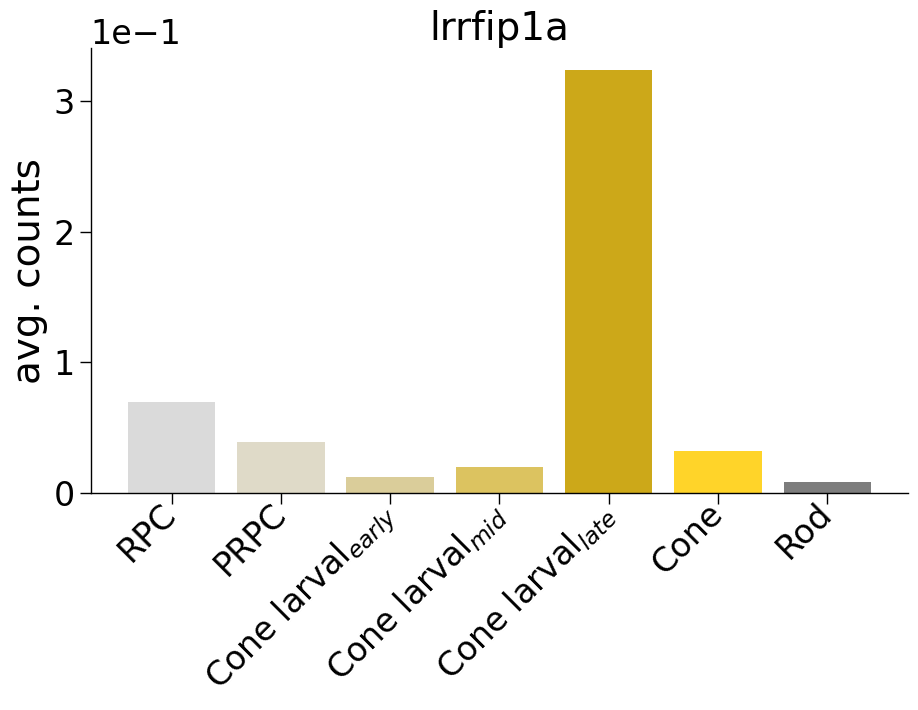

In [311]:
# geneSymbol = 'gnat2' # replace geneSymbol here and rerun cell to replot

# barDataPhotoDev = zfHPhotoDev[zfHPhotoDev['symbol']==geneSymbol] #get data (should add a check here with isin)
# fH, axH = plt.subplots(figsize=(8*1.2,6*1.2))
# pH = plotBars_Hoang2020_PhotoDev(barDataPhotoDev, geneSymbol, ax=axH, pC=pC_PhotoDev)
# plt.subplots_adjust(left=0.15, right=.95, top=0.90, bottom=0.1)
# plt.tight_layout()
# plt.savefig("{0}/{1}.svg".format(exportDir,geneSymbol), transparent=True, format="svg")
# plt.show()



geneSymbols = [
    'tbx2a','tbx2b','foxq2',
    'skor1a','sall1a','xbp1','lrrfip1a'
    'nr2e3','nr2f1b','nr2f6b',
    'neurod1','gnat2','cnga3a',
    'sox2','pax6a','stmn1a','vsx2','crx','otx5'
             ]
              
for geneSymbol in geneSymbols:
    barDataPhotoDev = zfHPhotoDev[zfHPhotoDev['symbol']==geneSymbol] #get data (should add a check here with isin)
    fH, axH = plt.subplots(figsize=(8*1.2,6*1.2))
    pH = plotBars_Hoang2020_PhotoDev(barDataPhotoDev, geneSymbol, ax=axH, pC=pC_PhotoDev)
    # axH.yaxis.labelpad = 20
    plt.subplots_adjust(left=0.15, right=.95, top=0.90, bottom=0.1)
    plt.tight_layout()
    
    # axH.set_yticklabels(['{:0.2f}'.format(x).zfill(3) for x in axH.get_yticks()])
    plt.savefig("{0}/{1}.svg".format(exportDir,geneSymbol), transparent=True, format="svg")
    # plt.show()

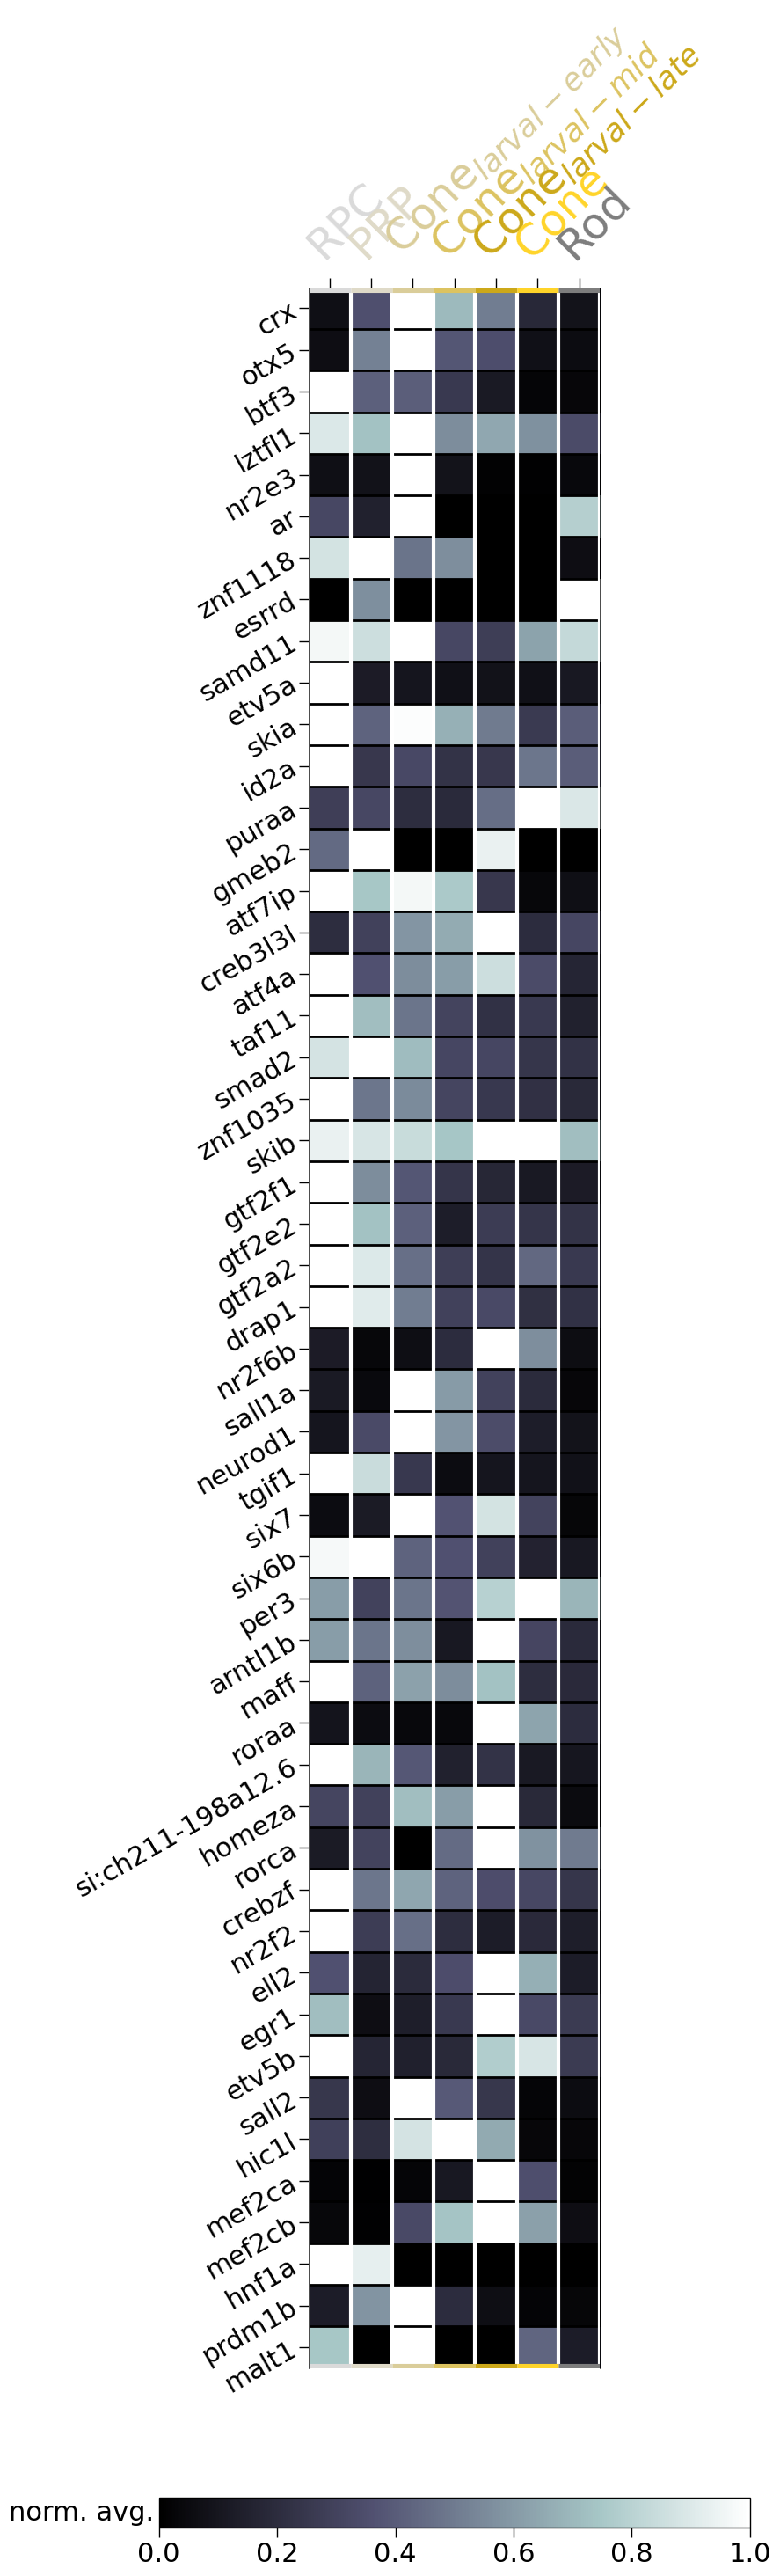

In [114]:
# Transcription factors with differential expression between rods and cones
tf_list = ['crx','otx5','btf3','lztfl1','nr2e3','june','ar','znf1118','esrrd','samd11','etv5a','skia','id2a','puraa','gmeb2','atf7ip','creb3l3l','atf4a','eloa','taf11','smad2','znf1035','skib','gtf2f1','gtf2e2','gtf2a2','drap1','nr2f6b','sall1a','neurod1','tgif1','six7','six6b','per3','arntl1b','maff','roraa','si:ch211-198a12.6','homeza','rorca','crebzf','nr2f2','ell2','egr1','etv5b','sall2','hic1l','mef2ca','mef2cb','hnf1a','prdm1b','malt1']

indices = []
for tf in tf_list:
    indices = np.append(indices,zfHPhotoDev.index[zfHPhotoDev['symbol']==tf].to_numpy(dtype=int))

heatmapDataHPhotoDev = zfHPhotoDev.iloc[indices,:]
fH, axH = plt.subplots(figsize=(10,(0.5*heatmapDataHPhotoDev.shape[0])+8))
hmH, cbH = heatmap_Hoang2020_PhotoDev(heatmapDataHPhotoDev, pC = pC_PhotoDev, norm=True)
plt.tight_layout()
# plt.savefig("{0}/{1}.svg".format(exportDir,'photoDev_TF_RvC'), transparent=True, format="svg")
# plt.show()

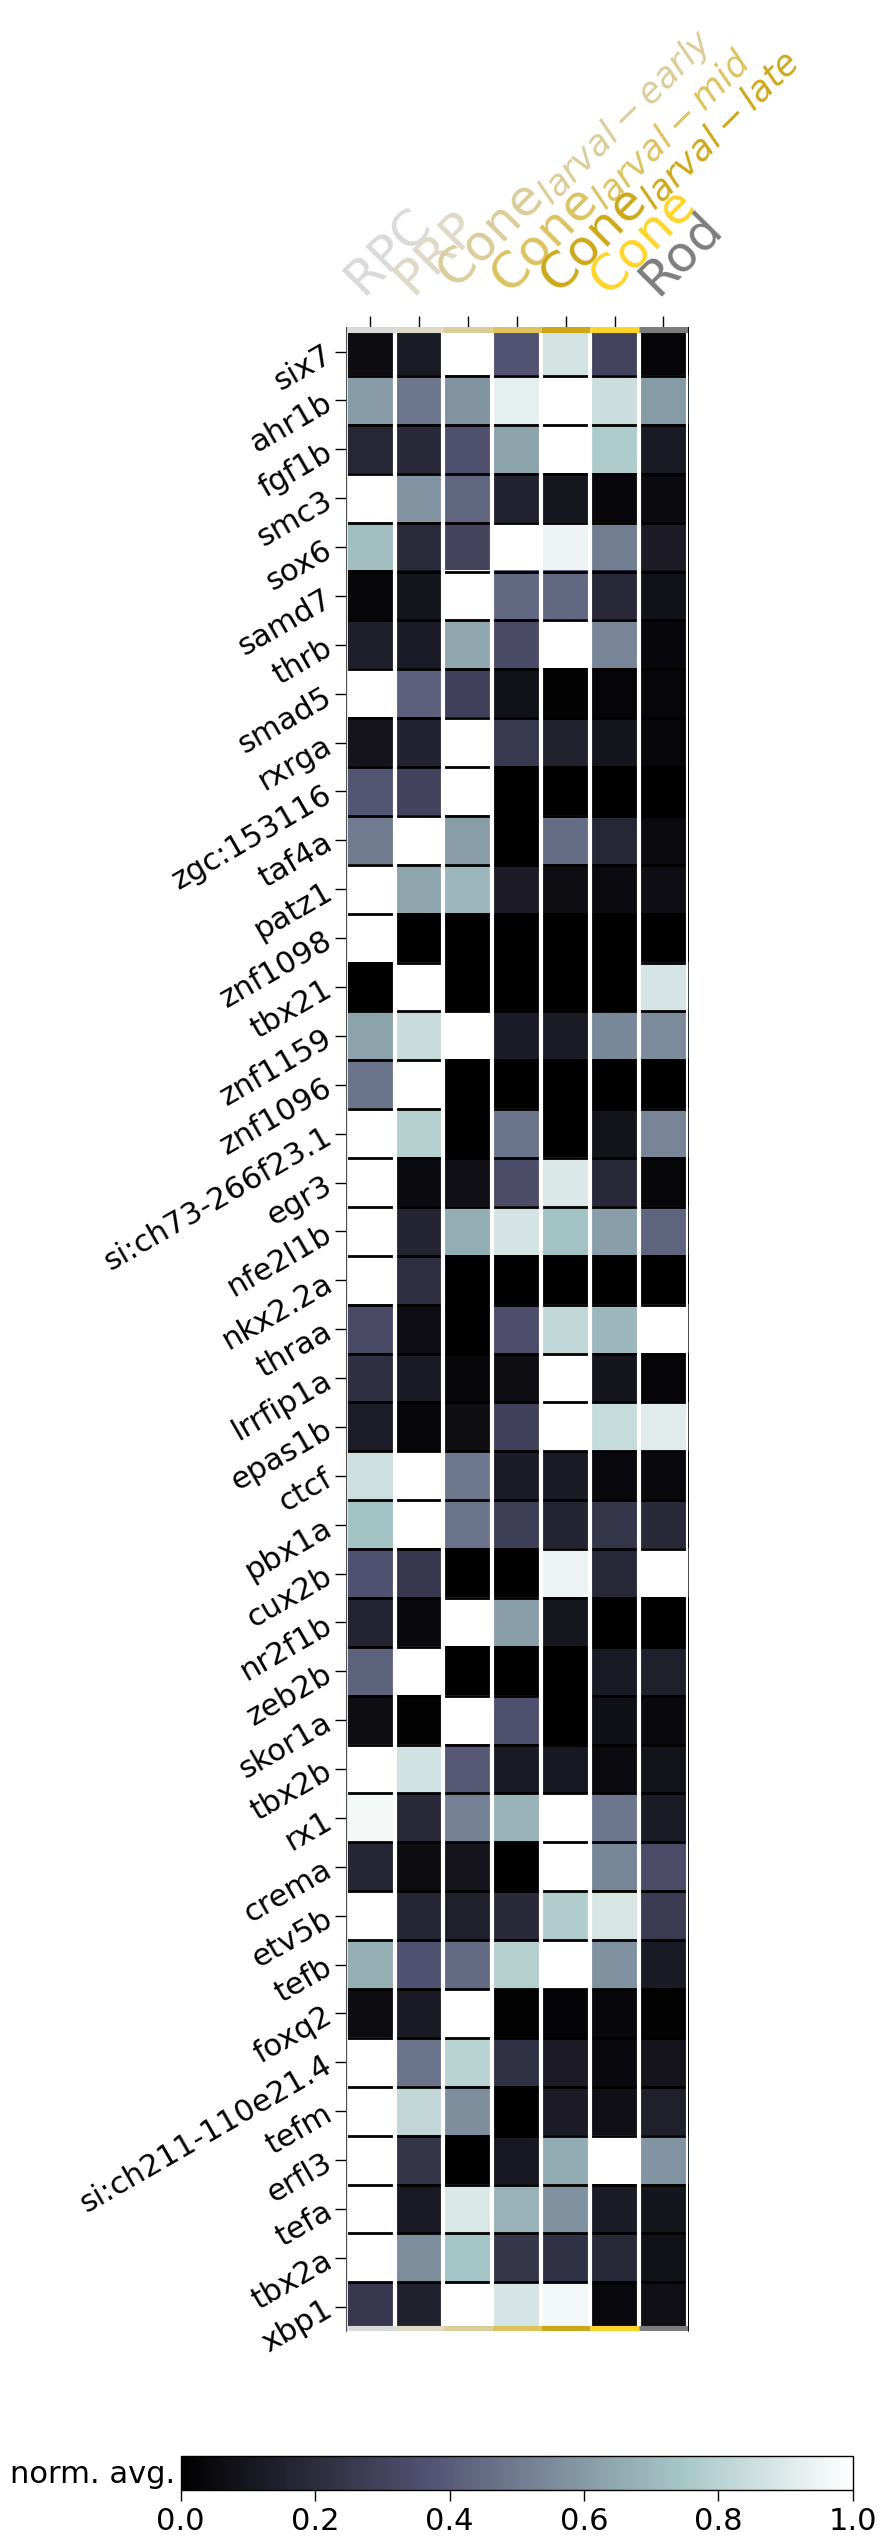

In [148]:
# Transcription factors with differential expression between cone subtypes
tf_list = ['eloca','six7','ahr1b','fgf1b','smc3','sox6','samd7','thrb','smad5','rxrga','zgc:153116','taf4a','patz1','znf1098','tbx21','znf1159','znf1096','si:ch73-266f23.1','egr3','nfe2l1b','nkx2.2a','thraa','lrrfip1a','epas1b','ctcf','pbx1a','cux2b','nr2f1b','zeb2b','skor1a','tbx2b','rx1','crema','etv5b','tefb','foxq2','akna','si:ch211-110e21.4','tefm','erfl3','tefa','tbx2a','xbp1']

indices = []
for tf in tf_list:
    indices = np.append(indices,zfHPhotoDev.index[zfHPhotoDev['symbol']==tf].to_numpy(dtype=int))

heatmapDataHPhotoDev = zfHPhotoDev.iloc[indices,:]
fH, axH = plt.subplots(figsize=(10,(0.5*heatmapDataHPhotoDev.shape[0])+8))
hmH, cbH = heatmap_Hoang2020_PhotoDev(heatmapDataHPhotoDev, pC = pC_PhotoDev, norm=True)
plt.tight_layout()
plt.savefig("{0}/{1}.svg".format(exportDir,'photoDev_TF_Cones'), transparent=True, format="svg")
plt.show()

***
## misc. things<a id='misc'>∮</a>
***
[Back to Index](#Index)

#### Adding genenames to pcaWeights and using opportunity to sort by PC1 value and remove NaN

In [ ]:
deseqdir= "~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2"
# pcr = pd.read_csv(deseqdir + "/00_rodsVcones/pcaWeights_Rout.csv")
# pcr = pd.read_csv(deseqdir + "/00_USvsLM/pcaWeights_Rout.csv")
# pcr = pd.read_csv(deseqdir + "/00_LvsM/pcaWeights_Rout.csv")
pcr = pd.read_csv(deseqdir + "/00_UvsS/pcaWeights_Rout.csv")
# pcr.head
gdf = pd.read_csv(deseqdir + "/00_rodsVcones/rodVCones_fpkm.csv")
pcr = pcr.set_index('symbol')
pcr = pcr.reindex(index=gdf['symbol'])
pcr = pcr.reset_index()
pcr.insert(1,'genename',gdf['genename'],True)
pcr.dropna(subset=['PC1'], inplace=True)
pcr.sort_values(by=['PC1'], inplace=True)
# pcr.to_csv(path_or_buf=deseqdir + "/00_rodsVcones/pcaWeights.csv", index=False)
# pcr.to_csv(path_or_buf=deseqdir + "/00_USvsLM/pcaWeights.csv", index=False)
# pcr.to_csv(path_or_buf=deseqdir + "/00_LvsM/pcaWeights.csv", index=False)
# pcr.to_csv(path_or_buf=deseqdir + "/00_UvsS/pcaWeights.csv", index=False)
pcr

In [ ]:
help(gdf.to_csv)

### Trying to draw counts for single gene by wedges in a circle 
> Prob not worth it, difficult to interpret

In [ ]:
fig, ax = plt.subplots(figsize=[12,12])

n = 30;
r = 0;
wdg_theta = 360/30;

patches = []
circles = []

pM = matplotlib.patches.Wedge(0, np.mean(data[r,0:6]), wdg_theta * (0), (wdg_theta * (6)), edgecolor="none", facecolor = pC['r'], alpha = 0.4)
patches.append(pM)

pM = matplotlib.patches.Wedge(0, np.mean(data[r,7:11]), wdg_theta * (6), (wdg_theta * (11)), edgecolor="none", facecolor = pC['u'], alpha = 0.4)
patches.append(pM)

pM = matplotlib.patches.Wedge(0, np.mean(data[r,12:17]), wdg_theta * (11), (wdg_theta * (17)), edgecolor="none", facecolor = pC['s'], alpha = 0.4)
patches.append(pM)

pM = matplotlib.patches.Wedge(0, np.mean(data[r,18:24]), wdg_theta * (17), (wdg_theta * (24)), edgecolor="none", facecolor = pC['m'], alpha = 0.4)
patches.append(pM)

pM = matplotlib.patches.Wedge(0, np.mean(data[r,25:30]), wdg_theta * (24), (wdg_theta * (30)), edgecolor="none", facecolor = pC['l'], alpha = 0.4)
patches.append(pM)

for i in range(n):
    p = matplotlib.patches.Wedge(0, data[r,i], wdg_theta * (i), (wdg_theta * (i+1)) -2, edgecolor="none", facecolor = pC['plt'][i], alpha = 0.4)
    patches.append(p)

for i in [0.001,.2,.4,.6,.8,1]:
    c = matplotlib.patches.Circle((0,0), np.max(data[r,:])*i, edgecolor = '#000000', facecolor='none', alpha=0.59)
    circles.append(c)

plt.xlim(-np.max(data[r,:])*1, np.max(data[r,:])*1)
plt.ylim(-np.max(data[r,:])*1, np.max(data[r,:])*1)


circleColl = matplotlib.collections.PatchCollection(circles, match_original=True);
ax.add_collection(circleColl)

patchColl = matplotlib.collections.PatchCollection(patches, match_original=True);
ax.add_collection(patchColl)


In [ ]:
np.max(data[r,:])

In [ ]:
np.max(data[4,i])

In [ ]:
data

In [ ]:
range(0,4)

In [ ]:
range?

### From 2019, Whitaker ,..., Swaroop
> genes involved in rod synapse size and localization

> [link to biorXiv](https://www.biorxiv.org/content/biorxiv/early/2019/08/30/753012.full.pdf)

In [ ]:
plotName = "test"

# gdf = findgenelist('dpf') # dpf3 -> not this one but dpf2 in all photoreceptors
# gdf = findgenelist('epb') # epb4.1l2 -> not this one but some interesting patterns in this family
# gdf = findgenelist('grtp') # grtp1 -> this one is interesting!
# gdf = findgenelist('kcnj') # kncj14 -> squirrel too but not zebrafish
# gdf = gdf.sort_values(by=["baseMean"],ascending=False)

# gdf = findgenelist('llgl') # llgl2 -> nope
# gdf = findgenelist('rab') # rab28 -> nope; this family is too big
# gdf = gdf[gdf.baseMean > 2]
# gdf = gdf.sort_values(by=["baseMean"],ascending=False)

# gdf = findgenelist('rom1') #rom1 -> rod-specific; what about outer segments?

# gdf = findgenelist('arl') # arl2bp -> nope but arl3l2 in all photoreceptors, and arl3l1 downregulated in uv and s. Both confirmed eye specific (https://zfin.org/ZDB-GENE-040426-1678; https://zfin.org/ZDB-GENE-040426-1649)
# These genes are supponsed to interact with unc119c (https://www.ncbi.nlm.nih.gov/pubmed/27079236) and act as their GDF
# gdf = gdf[gdf.baseMean > 5]
# # gdf = gdf[gdf.baseMean < 300]
# gdf = gdf.sort_values(by=["baseMean"],ascending=False)

# gdf = findgenelist('unc119') # unc119c is photoreceptor specific (https://www.ncbi.nlm.nih.gov/pubmed/27079236) and CoIPs with arl3l2


gdf = findgenelist('ppar') #ppargc2
# gdf = findgenelist('dpf')
# gdf = findgenelist('dpf')
# gdf = findgenelist('dpf')
# gdf = findgenelist('dpf')
# gdf = findgenelist('dpf')
# gdf = findgenelist('dpf')
# gdf = findgenelist('dpf')
# gdf = findgenelist('dpf')
# gdf = findgenelist('dpf')
# gdf = findgenelist('dpf')
# gdf = findgenelist('dpf')
# gdf = findgenelist('dpf')
# gdf = findgenelist('dpf')

### https://www.sciencedirect.com/science/article/pii/S2211124718303218
# gdf = findgenelist('frmpd') #frmpd2 interacts with lrit1 in cones 
# gdf = findgenelist('sdc') #sdcbp interacts with lrit 1
# gdf = findgenelist('grip') #grip1 interacts with lrit1

# gdf = findgenelist('dpf')
# gdf = gdf.sort_values(by=["baseMean"],ascending=False)
# gdf = gdf.drop(np.arange(20,93))
# gdf = gdf.drop([0])
# gdf = gdf.sort_values(by=["symbol"])
# gdf = gdf[gdf.baseMean > .45]

gdf


In [ ]:
genenames = gdf['symbol'].values
samplenames = [] #skipping names to replace in intaglio
log2matrix = np.vectorize(log2)
# data = log2matrix(gdf.iloc[0:,7:15].values)
data = gdf.iloc[0:,7:37].values


fig, ax = plt.subplots(figsize=[12,12])
im, cbar = heatmap(data, genenames, samplenames, ax=ax,
                   cmap="inferno", cbarlabel="fpkm")
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")

plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()

In [ ]:
# gdf = gdf[gdf.baseMean > .45]